# Графы. Синтез систем. Курсовая работа. Теория.

## Находение оптимального пути и построение на карте

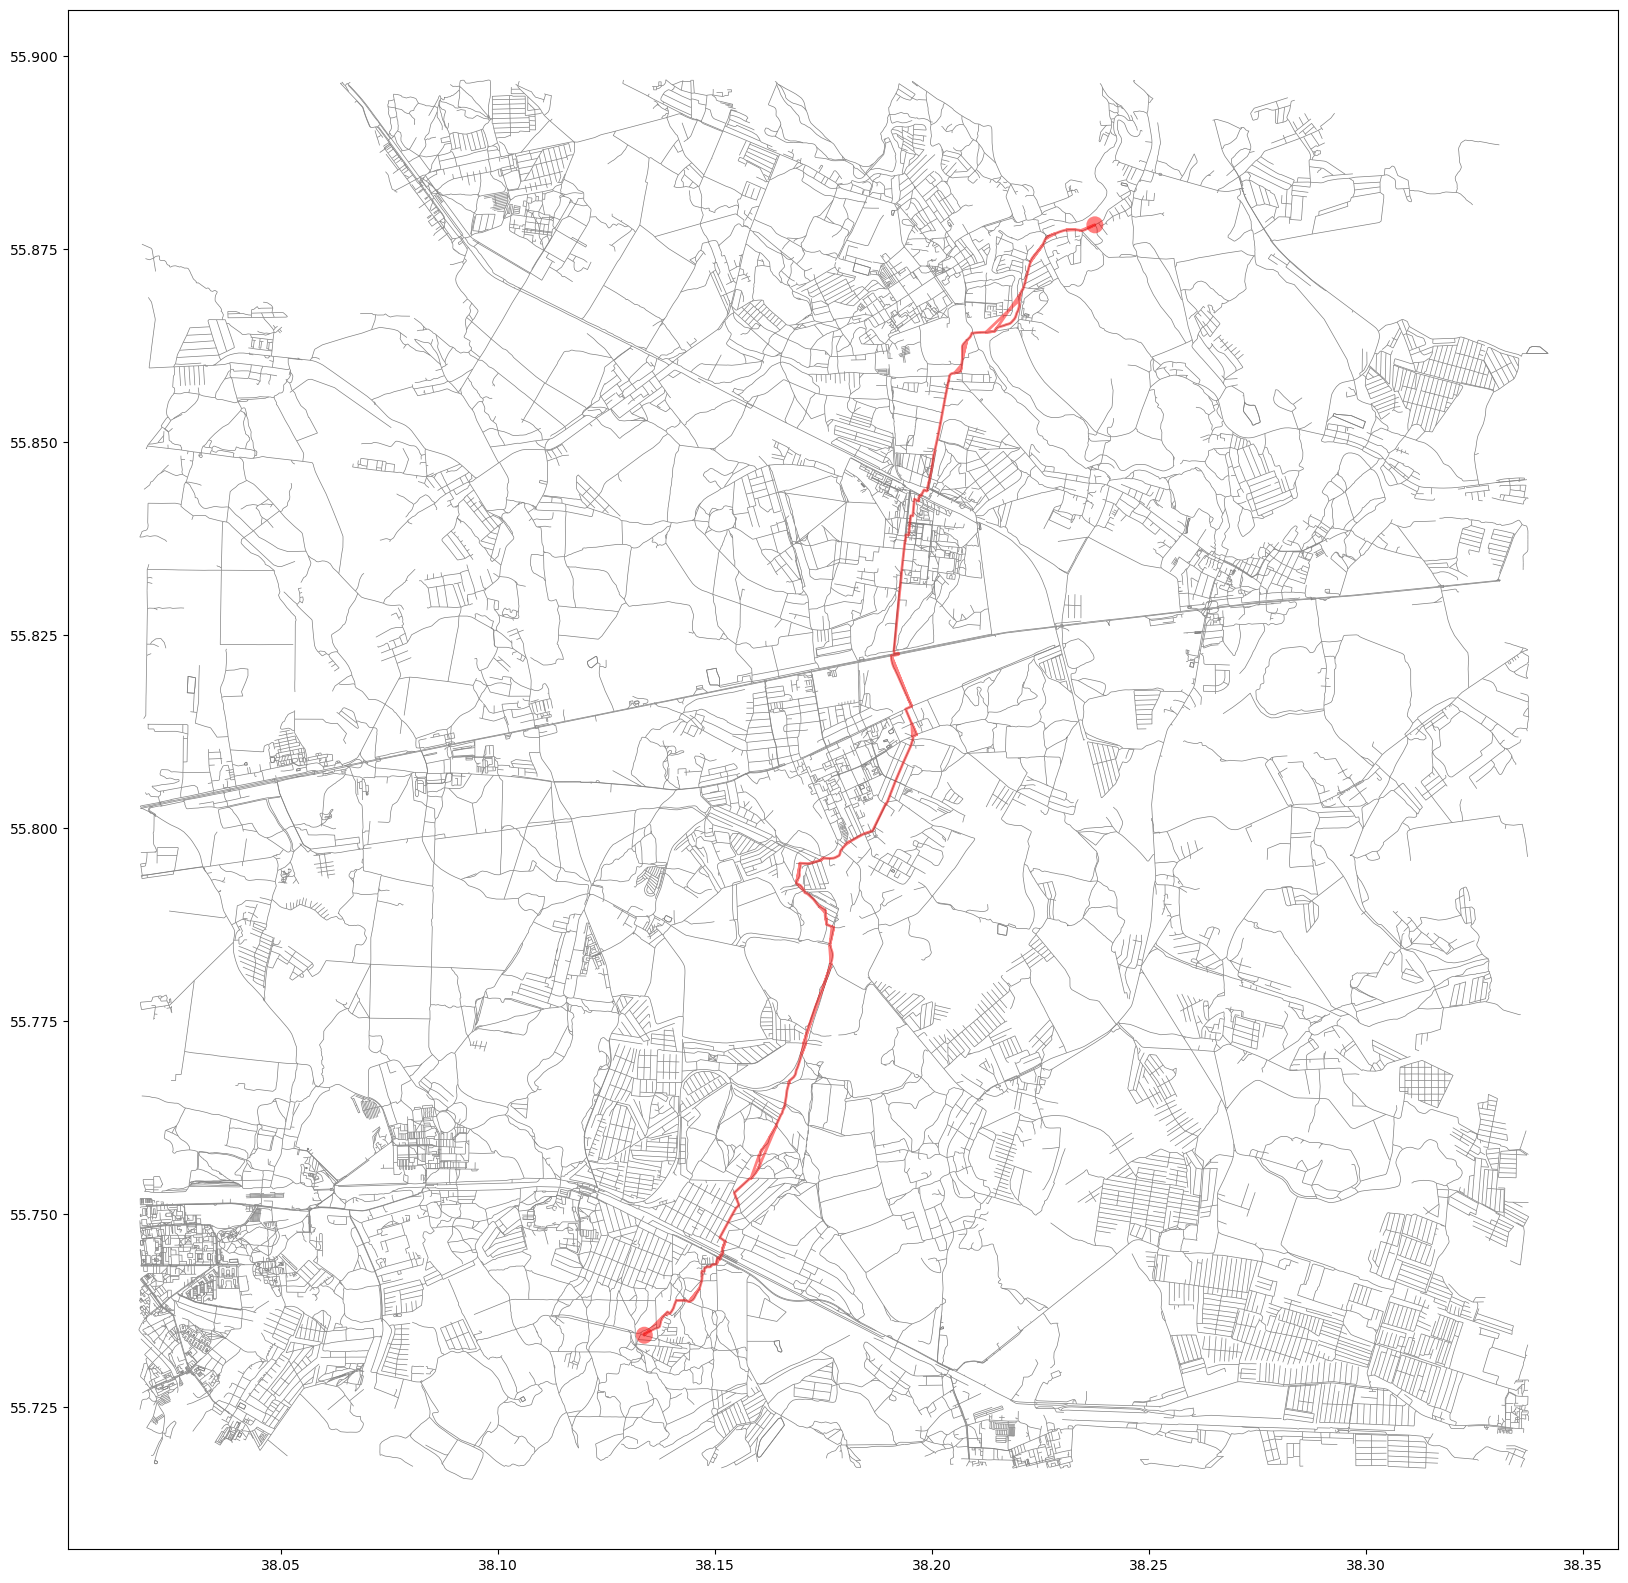

In [39]:
def plot_shortest_route(city):
    from IPython.display import display, HTML
    display(HTML("<style>.container { width:95% !important; }</style>"))

    import osmnx as ox
    import pandas as pd

    import matplotlib.pyplot as plt
    import random

#     from parse_txt import parse
#     from dijkstra import dijkstra

    start_node = 0
    finish_node = 0

    pd.set_option('display.max_columns', None)

    G = ox.graph_from_address(city, dist=10000, network_type='all')

    G = G.to_undirected()

    nodes, roads = ox.graph_to_gdfs(G)

    data = roads.reset_index()[["u", "v", "length"]]

    data = parse(data.values.tolist())

    fig, ax = plt.subplots(figsize=(20, 20))

    roads.plot(ax=ax, linewidth=0.5, edgecolor='gray', facecolor='none', zorder=1)

    while start_node == finish_node:
        start_node = random.choice(list(G))
        finish_node = random.choice(list(G))

    route = dijkstra(start_node, finish_node, data)

    fig, ax = ox.plot.plot_graph_route(
        G,
        route,
        route_color='r',
        route_linewidth=2,
        route_alpha=0.5,
        orig_dest_size=150,
        ax=ax,
        figsize=(20, 20))


if __name__ == '__main__':
    city = "Staraya Kupavna, Russia"
    plot_shortest_route(city)



## Модуль нахождения оптимального пути методом Дейкстры

In [38]:
# from parse_txt import parse
from heapq import *


def dijkstra(start_node, finish_node, graph_node):

    cur_node_finish = finish_node
    path_list = [finish_node]
    queue = []
    heappush(queue, (0, start_node))
    cost_visited = {start_node: 0}
    visited_node = {start_node: None}

    while queue:
        cur_cost, node = heappop(queue)
        if node == finish_node:
            break

        next_nodes = graph_node[node]
        for next_node in next_nodes:
            neigh_cost, neigh_node = next_node
            new_cost = cost_visited[node] + neigh_cost

            if neigh_node not in cost_visited or new_cost < cost_visited[neigh_node]:
                heappush(queue, (new_cost, neigh_node))
                cost_visited[neigh_node] = new_cost
                visited_node[neigh_node] = node

    while cur_node_finish != start_node:
        cur_node_finish = visited_node[cur_node_finish]
        path_list.insert(0, cur_node_finish)

    return path_list


if __name__ == '__main__':
    data = {469710010: [(40, 1420112396), (150, 1420112465), (49, 2108479301)], 1420112396: [(40, 469710010), (65, 1420112409), (155, 1420112419), (50, 2108479301)], 1420112465: [(150, 469710010), (40, 1235159479), (314, 1420112392)], 2108479301: [(49, 469710010), (543, 705538397), (50, 1420112396)], 469710016: [(90, 1420114277), (491, 1420114281), (302, 1420114226), (213, 1235159473)], 1420114277: [(90, 469710016), (222, 1235159473), (379, 2108478929), (215, 1420114288)], 1420114281: [(491, 469710016), (13, 2108404163), (52, 1420114283)], 1420114226: [(302, 469710016), (73, 2108478904), (293, 2108478808)], 1235159473: [(213, 469710016), (17, 1420133446), (222, 1420114277)], 469710020: [(18, 2108479072), (375, 2108478929), (188, 1420114272)], 2108479072: [(18, 469710020), (25, 1420112455), (855, 1420114288)], 2108478929: [(375, 469710020), (379, 1420114277), (168, 2108478904)], 1420114272: [(188, 469710020), (178, 2108479247), (262, 2108478904)], 469710675: [(1513, 2119700327), (1225, 2119700815)], 2119700327: [(1513, 469710675), (1322, 2119700870), (1250, 2119700546)], 2119700815: [(1225, 469710675), (499, 1448672240), (319, 2119699967)], 469710676: [(24, 2119701207), (25, 1448672240)], 2119701207: [(24, 469710676), (847, 2119699883), (637, 2119700888)], 1448672240: [(25, 469710676), (499, 2119700815), (298, 1448672871)], 705538356: [(108, 2441754421), (14, 2119513649), (90, 2108404056)], 2441754421: [(108, 705538356), (67, 2441754329), (117, 2441754422)], 2119513649: [(14, 705538356), (157, 705538397), (274, 1420112398)], 2108404056: [(90, 705538356), (28, 1420112399), (321, 2108404045)], 705538376: [(121, 1204491082), (115, 2108404188), (130, 2108404045)], 1204491082: [(121, 705538376), (24, 705538397), (29, 2108404217)], 2108404188: [(115, 705538376), (11, 2108404177), (167, 2108404217)], 2108404045: [(130, 705538376), (135, 1273243261), (321, 2108404056)], 705538397: [(157, 2119513649), (24, 1204491082), (543, 2108479301)], 763488552: [(25, 1485975643), (204, 3785915021), (687, 763488569)], 1485975643: [(25, 763488552), (495, 1278595946), (79, 1485975526)], 3785915021: [(204, 763488552)], 763488569: [(687, 763488552), (61, 763488574), (177, 2443439645)], 763488574: [(61, 763488569), (35, 4050306116), (660, 4050306131)], 2443439645: [(177, 763488569)], 4050306116: [(35, 763488574), (25, 2919900146), (650, 4050306131)], 4050306131: [(660, 763488574), (182, 1485975114), (650, 4050306116)], 763488617: [(9, 763488619), (1408, 2154990843), (478, 1955280743)], 763488619: [(9, 763488617), (136, 763488625), (391, 2108478770)], 2154990843: [(1408, 763488617), (10, 2154990558), (671, 2440755780)], 1955280743: [(478, 763488617), (915, 1955280743), (915, 1955280743), (915, 1955280743), (915, 1955280743)], 763488625: [(136, 763488619), (140, 763488635), (122, 3700183380)], 2108478770: [(391, 763488619), (117, 2108479016), (206, 3700171501)], 763488635: [(140, 763488625), (365, 1235159502), (119, 3700181806)], 3700183380: [(122, 763488625)], 1235159502: [(365, 763488635), (31, 2441675565), (114, 2108479373)], 3700181806: [(119, 763488635), (284, 3700181792), (116, 3700181809)], 763488649: [(74, 3698366225), (270, 763488657), (261, 3698365921)], 3698366225: [(74, 763488649), (122, 1420133495), (359, 3698365921)], 763488657: [(270, 763488649), (221, 1420194684), (69, 3697363385), (343, 3697363891)], 3698365921: [(261, 763488649), (244, 1420133355), (359, 3698366225)], 1420194684: [(221, 763488657), (58, 763488683), (158, 1420194560)], 3697363385: [(69, 763488657), (126, 1420194525), (235, 2441675337)], 3697363891: [(343, 763488657), (36, 2441675085), (205, 3697363872)], 763488683: [(98, 763488691), (58, 1420194684)], 763488691: [(98, 763488683), (29, 2441675085)], 2441675085: [(29, 763488691), (16, 2441675339), (36, 3697363891)], 1095161961: [(338, 1374869290), (221, 1413974670), (901, 1421414243)], 1374869290: [(338, 1095161961), (96, 1374869267), (2229, 2098888487)], 1413974670: [(221, 1095161961), (243, 1421414212), (319, 1421414211)], 1421414243: [(901, 1095161961), (183, 2152412988), (16, 2421490029), (134, 2152412548)], 1095162127: [(2432, 1420038442), (87, 1235159670), (1140, 2152412807), (204, 2152412633)], 1420038442: [(2432, 1095162127), (1450, 1420037529)], 1235159670: [(87, 1095162127), (188, 1235159672), (382, 1385218443), (177, 9978536016)], 2152412807: [(1140, 1095162127), (34, 2152412944), (62, 2152412962)], 2152412633: [(204, 1095162127), (3162, 1485561973), (1207, 2152413137)], 1096211492: [(30, 3697328057), (59, 3697328047), (88, 3506690531)], 3697328057: [(30, 1096211492), (574, 3697328096)], 3697328047: [(59, 1096211492), (52, 3506690531), (481, 3697328096), (143, 3700116008)], 3506690531: [(88, 1096211492), (190, 2108478944), (52, 3697328047)], 1204490721: [(530, 1420112413), (93, 2108404217), (500, 1204490974)], 1420112413: [(530, 1204490721), (485, 1204490974), (80, 1420112409)], 2108404217: [(93, 1204490721), (29, 1204491082), (167, 2108404188)], 1204490974: [(500, 1204490721), (485, 1420112413)], 1420133446: [(17, 1235159473), (119, 1420114250), (271, 1420133403)], 1235159479: [(11, 1486942787), (40, 1420112465), (337, 1420112419)], 1486942787: [(11, 1235159479), (329, 1235159565), (327, 1420114276)], 1420112419: [(337, 1235159479), (155, 1420112396), (375, 1420114259)], 2441675565: [(31, 1235159502), (9, 1420133355), (477, 2108479141)], 2108479373: [(114, 1235159502), (21, 2108478944), (245, 3700116164)], 1235159549: [(212, 2442386041), (1025, 2129376789), (309, 2154990721), (538, 1483222607)], 2442386041: [(212, 1235159549), (441, 2154991245), (659, 2442386323)], 2129376789: [(1025, 1235159549), (37, 2129377050), (817, 2129377234), (797, 2133760577)], 2154990721: [(309, 1235159549), (39, 2442385792), (164, 2154991310)], 1483222607: [(538, 1235159549), (807, 1483222831), (290, 1483222789)], 1235159565: [(51, 1420133333), (285, 1273243910), (329, 1486942787)], 1420133333: [(51, 1235159565), (196, 1420133344), (98, 1420133357)], 1273243910: [(285, 1235159565), (33, 1420112397), (180, 1420112441)], 1235159569: [(351, 3738834366), (180, 3738765339), (591, 1486962559)], 3738834366: [(351, 1235159569), (552, 1420037646), (298, 3738834380)], 3738765339: [(180, 1235159569), (522, 2133759445), (88, 3738834357)], 1486962559: [(591, 1235159569), (20, 3738765337), (355, 3738834357)], 1235159586: [(682, 3738729468), (845, 1420037646), (1122, 1420070218)], 3738729468: [(682, 1235159586), (1123, 1420037787), (458, 1485039952)], 1420037646: [(845, 1235159586), (820, 1420037496), (552, 3738834366)], 1420070218: [(1122, 1235159586), (325, 1420070212), (530, 1420070332)], 1235159612: [(139, 1420112427), (201, 1420133377), (149, 1420133757), (195, 1420133741)], 1420112427: [(139, 1235159612), (5, 1420112460), (338, 2108393043)], 1420133377: [(201, 1235159612), (112, 1420133371), (356, 2119513827)], 1420133757: [(149, 1235159612), (447, 2448098218), (403, 2119513656)], 1420133741: [(195, 1235159612), (240, 1420133342), (232, 1420133758)], 1235159669: [(195, 2154990999)], 2154990999: [(195, 1235159669), (1082, 1235159746), (1321, 1486957056)], 1235159672: [(188, 1235159670), (345, 1235159846), (141, 2309932103)], 1385218443: [(382, 1235159670)], 9978536016: [(177, 1235159670), (80, 2152254124), (233, 2309932103)], 1235159846: [(345, 1235159672), (658, 1381860369), (121, 1374593260)], 2309932103: [(141, 1235159672), (401, 1385218502), (233, 9978536016)], 1235159732: [(641, 2119513926), (563, 2119513995), (204, 1235159770), (2209, 1420112455)], 2119513926: [(641, 1235159732), (613, 2119513748), (360, 2119513879)], 2119513995: [(563, 1235159732)], 1235159770: [(204, 1235159732), (36, 1235159773), (77, 1235159783)], 1420112455: [(2209, 1235159732), (959, 1279473858), (25, 2108479072)], 1235159735: [(116, 1235159749), (367, 1235159773), (419, 1235159746)], 1235159749: [(116, 1235159735), (326, 1235159783), (1786, 2154990960)], 1235159773: [(367, 1235159735), (136, 1235159746), (36, 1235159770)], 1235159746: [(419, 1235159735), (1082, 2154990999), (136, 1235159773)], 1235159783: [(326, 1235159749), (77, 1235159770), (215, 1235159780), (594, 2119513891)], 2154990960: [(1786, 1235159749), (278, 1486957056), (1386, 2154990558)], 1235159780: [(215, 1235159783), (265, 1235159790), (216, 2108479149)], 1235159790: [(265, 1235159780)], 2108479149: [(216, 1235159780), (805, 2108479285), (186, 2119513891)], 2119513891: [(594, 1235159783), (186, 2108479149), (101, 2119513879)], 1235159792: [(48, 1485038832), (238, 3634410239), (290, 3738656068)], 1485038832: [(48, 1235159792), (146, 3634410425), (130, 3634410292)], 3634410239: [(238, 1235159792), (39, 3634410228), (57, 3634410420), (337, 3738656778)], 3738656068: [(290, 1235159792), (862, 2447391800), (28, 3738656804)], 1381860369: [(658, 1235159846), (164, 2159658363), (311, 2159658446)], 1374593260: [(121, 1235159846), (245, 1374593257), (185, 1385218502)], 1235159862: [(348, 2441675140), (868, 1420099661), (370, 2108478778)], 2441675140: [(348, 1235159862), (22, 2108479409)], 1420099661: [(868, 1235159862), (135, 1420099683), (221, 2441754575)], 2108478778: [(370, 1235159862), (140, 2108479355), (151, 2108479217), (424, 2108479285)], 1235159885: [(396, 3700116164), (204, 2108479016), (129, 3697328096)], 3700116164: [(396, 1235159885), (245, 2108479373), (68, 3700116008)], 2108479016: [(204, 1235159885), (117, 2108478770), (105, 3700171501)], 3697328096: [(129, 1235159885), (481, 3697328047), (574, 3697328057)], 1235163919: [(133, 1235163946), (57, 2119565744), (140, 2119700183)], 1235163946: [(133, 1235163919), (172, 2119699965), (60, 2119700183)], 2119565744: [(57, 1235163919), (165, 2119565928), (284, 2119565782)], 2119700183: [(140, 1235163919), (60, 1235163946), (709, 2119699802)], 1235163931: [(6, 3738668717), (130, 3738686387), (594, 3738591000)], 3738668717: [(6, 1235163931), (502, 3738591557), (177, 3738668709)], 3738686387: [(130, 1235163931), (54, 1485025282), (511, 3738686423)], 3738591000: [(594, 1235163931), (1269, 2119564485), (13, 3738590999), (542, 3738686423)], 1235163932: [(170, 1485024790), (161, 3738591557), (64, 3738729486)], 1485024790: [(170, 1235163932), (62, 3738660574), (666, 1485025282)], 3738591557: [(161, 1235163932), (19, 3738591547), (502, 3738668717)], 3738729486: [(64, 1235163932), (9, 1420037787), (222, 3738729487)], 1235163933: [(33, 3738660574), (251, 3738713865), (127, 3738656759)], 3738660574: [(33, 1235163933), (62, 1485024790), (230, 3738660571)], 3738713865: [(251, 1235163933), (130, 3738713860), (199, 3738715661)], 3738656759: [(127, 1235163933), (47, 3634410228), (88, 3738660571)], 2119699965: [(172, 1235163946), (745, 1235163956), (823, 2119699802)], 1235163956: [(310, 3178893768), (412, 2119565662), (745, 2119699965)], 3178893768: [(310, 1235163956), (1352, 1446891944), (563, 2119565502)], 2119565662: [(412, 1235163956), (246, 3179532500), (321, 2119565782)], 1235163975: [(198, 2119564485), (39, 9375772221), (193, 9375772227), (95, 9375772236)], 2119564485: [(198, 1235163975), (1549, 2119564253), (1269, 3738591000)], 9375772221: [(39, 1235163975), (26, 1486977322), (293, 9375772226)], 9375772227: [(193, 1235163975), (701, 2119564342), (147, 9375772226)], 9375772236: [(95, 1235163975)], 1235164754: [(251, 2119565104), (102, 1486977628), (164, 2119699795)], 2119565104: [(251, 1235164754), (203, 2119564993), (45, 2119565070)], 1486977628: [(102, 1235164754), (236, 2119565282), (469, 2119565216)], 2119699795: [(164, 1235164754), (376, 2119565125)], 1235164801: [(86, 2119564914), (166, 2119564820), (121, 2119564747)], 2119564914: [(86, 1235164801), (90, 1486977470), (126, 2119564808)], 2119564820: [(166, 1235164801), (331, 2119564679), (169, 2119565055)], 2119564747: [(121, 1235164801), (511, 2119564581), (83, 2119564788)], 1270911251: [(2033, 2119700984), (131, 2340859955)], 2119700984: [(2033, 1270911251), (95, 2119700203), (153, 2119700495)], 2340859955: [(131, 1270911251), (1829, 1485025022), (1297, 2340859864)], 1272138158: [(172, 1456764203), (161, 1272138438), (218, 1272138375)], 1456764203: [(172, 1272138158), (88, 1456764490), (86, 3737021575)], 1272138438: [(161, 1272138158), (209, 3737267005), (202, 3737021575)], 1272138375: [(218, 1272138158), (75, 3737269791), (102, 3737270072)], 1272138243: [(67, 3737302502), (216, 3737266968), (26, 3737298440)], 3737302502: [(67, 1272138243), (74, 3737267005), (286, 3737302495)], 3737266968: [(216, 1272138243), (370, 1487002015), (23, 3737266994)], 3737298440: [(26, 1272138243), (71, 3737298440), (71, 3737298440), (71, 3737298440), (71, 3737298440)], 1272138294: [(26, 1456764204), (119, 3737269791), (313, 3737270053), (186, 1456764490)], 1456764204: [(26, 1272138294), (418, 3737021585), (339, 1487001870)], 3737269791: [(119, 1272138294), (75, 1272138375), (344, 3737270049)], 3737270053: [(313, 1272138294), (467, 3737269787), (124, 3737270049)], 1456764490: [(186, 1272138294), (88, 1456764203), (448, 3737021578)], 3737270072: [(102, 1272138375), (207, 1456764196), (348, 3737269798)], 3737267005: [(209, 1272138438), (153, 3737236845), (74, 3737302502)], 3737021575: [(202, 1272138438), (86, 1456764203), (163, 3737021578)], 1273242784: [(248, 2441754543), (206, 2119513634)], 2441754543: [(248, 1273242784), (36, 1273242990), (45, 1273243355)], 2119513634: [(206, 1273242784), (69, 1420112410), (294, 1420112435)], 1273242990: [(49, 1420112460), (58, 1273243355), (36, 2441754543)], 1420112460: [(49, 1273242990), (5, 1420112427), (211, 1420112446)], 1273243355: [(58, 1273242990), (124, 1420112435), (45, 2441754543)], 1273243196: [(33, 1273244045), (256, 1420112422), (464, 1420112408)], 1273244045: [(33, 1273243196), (115, 1273243271), (354, 1420112440)], 1420112422: [(256, 1273243196), (611, 1273243252), (290, 1420112408)], 1420112408: [(464, 1273243196), (55, 1420112410), (863, 2108392964), (290, 1420112422)], 1273243252: [(38, 1273244917), (611, 1420112422), (100, 2108392816)], 1273244917: [(38, 1273243252), (95, 2108392964)], 2108392816: [(100, 1273243252), (460, 1420112387)], 1273243261: [(135, 2108404045), (16, 2108491234), (211, 1273244670)], 2108491234: [(16, 1273243261), (108, 2108491274), (187, 2108491273)], 1273244670: [(211, 1273243261), (120, 1446892292), (305, 2108404177)], 1273243271: [(143, 1420112397), (115, 1273244045), (413, 1273244783), (215, 2441754422)], 1420112397: [(143, 1273243271), (33, 1273243910), (75, 1420112426)], 1273244783: [(413, 1273243271), (143, 1420112435), (122, 2108393043)], 2441754422: [(215, 1273243271), (135, 2441754329), (117, 2441754421)], 1420112435: [(124, 1273243355), (143, 1273244783), (294, 2119513634)], 1420112441: [(180, 1273243910), (51, 1420112443), (122, 2108392794)], 1420112440: [(354, 1273244045), (191, 1420112399), (185, 1420112432)], 1446892292: [(120, 1273244670), (68, 1446892598)], 2108404177: [(305, 1273244670), (11, 2108404188), (169, 2415756444)], 2108393043: [(122, 1273244783), (338, 1420112427), (172, 1420112443)], 2108392964: [(95, 1273244917), (863, 1420112408), (85, 2441754339), (58, 2441754342)], 1278580143: [(140, 1431175958), (376, 1279400492), (737, 1431175656), (1228, 1446353329), (116, 1278616854), (219, 1278580156)], 1431175958: [(140, 1278580143), (237, 1431175861), (372, 1431175985)], 1279400492: [(376, 1278580143), (148, 1279400508), (356, 1279473966)], 1431175656: [(737, 1278580143), (562, 4230185025), (292, 1486956848)], 1446353329: [(1228, 1278580143), (23, 1280217079), (462, 4230185020), (698, 2975757758)], 1278616854: [(116, 1278580143), (418, 1278616860), (414, 1278616860)], 1278580156: [(219, 1278580143), (66, 1431175861), (307, 1278580203)], 1431175861: [(66, 1278580156), (88, 1431175864), (237, 1431175958)], 1278580203: [(307, 1278580156), (20, 1486956848), (105, 1431175770)], 1278580184: [(49, 1279517938), (623, 1278580186), (162, 1750771600)], 1279517938: [(49, 1278580184), (31, 1840904754), (136, 1279517947)], 1278580186: [(623, 1278580184), (191, 1278580262), (746, 1810970045)], 1750771600: [(162, 1278580184), (1401, 1486956848), (310, 1750771604)], 1278580262: [(191, 1278580186), (258, 1278595946), (665, 1279517947)], 1810970045: [(746, 1278580186)], 1486956848: [(20, 1278580203), (292, 1431175656), (1401, 1750771600)], 1431175770: [(105, 1278580203), (261, 1431175864), (89, 1431175779)], 1278595946: [(258, 1278580262), (495, 1485975643), (3171, 3738661581)], 1279517947: [(665, 1278580262), (544, 1279517897), (136, 1279517938)], 3738661581: [(3171, 1278595946), (250, 2447391800), (16, 3738661613)], 1278616860: [(418, 1278616854), (414, 1278616854), (779, 1431176023)], 1431176023: [(779, 1278616860), (336, 1431176011), (942, 1801647015), (267, 1747881298)], 1279400508: [(148, 1279400492), (180, 1279400502), (184, 1279474008)], 1279473966: [(356, 1279400492), (148, 1279473867), (130, 1279474008)], 1279400502: [(180, 1279400508), (618, 1747881298), (134, 1799524796), (223, 1279474008)], 1747881298: [(618, 1279400502), (267, 1431176023), (252, 1432048401)], 1799524796: [(134, 1279400502)], 1279474008: [(223, 1279400502), (184, 1279400508), (130, 1279473966)], 1279473573: [(14, 2119513998), (248, 2450657096), (1392, 1279473996)], 2119513998: [(14, 1279473573), (437, 1279473833), (658, 2119514025)], 2450657096: [(248, 1279473573), (388, 1279473833), (208, 2450656778)], 1279473996: [(1392, 1279473573), (973, 1279473887), (1411, 2450656933)], 1279473576: [(477, 1279473980), (86, 1279473867), (985, 1432048401)], 1279473980: [(477, 1279473576), (44, 1279473967), (700, 1280217043)], 1279473867: [(86, 1279473576), (148, 1279473966), (1265, 1280217079)], 1432048401: [(985, 1279473576), (48, 1747881314), (252, 1747881298)], 1279473739: [(487, 1279473887), (414, 1279473967), (1997, 1801647006)], 1279473887: [(487, 1279473739), (211, 1279473817), (973, 1279473996)], 1279473967: [(414, 1279473739), (398, 1279473817), (44, 1279473980)], 1801647006: [(1997, 1279473739), (575, 1801647015), (435, 2119514153)], 1279473817: [(211, 1279473887), (398, 1279473967), (609, 1280217043)], 1280217043: [(609, 1279473817), (700, 1279473980), (341, 1280217058)], 1279473833: [(388, 2450657096), (78, 1279473853), (437, 2119513998)], 1279473853: [(78, 1279473833), (17, 1279473842), (474, 2450656778)], 1279473842: [(17, 1279473853), (1229, 2119514000), (550, 1279473858)], 2119514000: [(1229, 1279473842), (1035, 2119514025)], 1279473858: [(550, 1279473842), (509, 2450656933), (959, 1420112455)], 2450656778: [(474, 1279473853), (208, 2450657096), (63, 2450656933)], 2450656933: [(509, 1279473858), (1411, 1279473996), (63, 2450656778)], 1280217079: [(1265, 1279473867), (791, 1280217058), (23, 1446353329)], 1279517895: [(41, 1279517897), (276, 1279517915), (856, 2984166865)], 1279517897: [(41, 1279517895), (62, 2962515498), (544, 1279517947)], 1279517915: [(276, 1279517895), (762, 1840904754), (354, 4230185020)], 2984166865: [(856, 1279517895), (69, 2984490764), (61, 2984490765)], 2962515498: [(62, 1279517897), (1340, 2962515483), (299, 2962515501)], 1840904754: [(762, 1279517915), (31, 1279517938), (686, 4230185025)], 4230185020: [(354, 1279517915), (462, 1446353329), (683, 4230185025)], 1280217058: [(341, 1280217043), (791, 1280217079), (1155, 2919900130)], 2919900130: [(1155, 1280217058), (907, 2962515480), (922, 2962515468)], 1354088572: [(16, 1420112409)], 1420112409: [(16, 1354088572), (65, 1420112396), (80, 1420112413)], 1374593257: [(98, 3576402161), (245, 1374593260), (373, 2159658363)], 3576402161: [(98, 1374593257), (685, 1374814534), (99, 1416736907)], 2159658363: [(373, 1374593257), (164, 1381860369), (315, 2159658430)], 1385218502: [(185, 1374593260), (401, 2309932103), (488, 2152254213)], 1374814531: [(85, 2152137653), (308, 2152137398), (204, 2309932116)], 2152137653: [(85, 1374814531), (331, 1390341323), (387, 2159658353)], 2152137398: [(308, 1374814531), (40, 2152137367), (243, 2152137749)], 2309932116: [(204, 1374814531), (493, 1374814534), (120, 2152137363)], 1374814534: [(54, 1374814541), (493, 2309932116), (685, 3576402161)], 1374814541: [(54, 1374814534), (24, 2152254213), (244, 2152254384), (805, 7772031302)], 2152254213: [(24, 1374814541), (488, 1385218502), (126, 2152254155)], 2152254384: [(244, 1374814541), (199, 2152254219), (72, 2152254233)], 7772031302: [(805, 1374814541), (32, 1382336547), (130, 2152254002)], 1374869267: [(96, 1374869290), (186, 2421490015), (2143, 2421489957)], 2421490015: [(186, 1374869267), (420, 1487274747), (295, 2421489848)], 2421489957: [(2143, 1374869267), (198, 1487275145), (1438, 3785914976)], 2098888487: [(2229, 1374869290), (16, 2421489812), (807, 3785914976)], 2159658446: [(311, 1381860369), (12, 2159658430), (26, 3179532468)], 1382336547: [(32, 7772031302), (127, 2346109299), (123, 2152137403)], 2346109299: [(127, 1382336547), (392, 2152254179)], 2152137403: [(123, 1382336547), (276, 2152254233), (277, 2152254088)], 1390341323: [(331, 2152137653)], 1421414212: [(243, 1413974670), (45, 2421489821), (103, 1421414214)], 1421414211: [(319, 1413974670), (174, 1421414221), (25, 1487274807)], 1416736907: [(33, 1416736911), (99, 3576402161), (31, 1416736912)], 1416736911: [(33, 1416736907), (21, 1416736912), (717, 2159658353)], 1416736912: [(31, 1416736907), (21, 1416736911), (513, 1416736923)], 2159658353: [(717, 1416736911), (387, 2152137653), (429, 2159658451)], 1416736923: [(513, 1416736912)], 1420037496: [(820, 1420037646), (1797, 1420038090), (1760, 1485038572), (1229, 2133760152)], 1420038090: [(1797, 1420037496), (22, 1485038753), (171, 1420038465)], 1485038572: [(1760, 1420037496), (410, 1485040202), (731, 2133759832), (279, 2133759503)], 2133760152: [(1229, 1420037496), (1661, 2133759725), (944, 2133759976)], 1420037528: [(75, 2415110635), (1261, 3737302511), (319, 1420037835)], 2415110635: [(75, 1420037528), (193, 1420038168), (1331, 3737302501)], 3737302511: [(1261, 1420037528), (179, 1487002015), (22, 3737302501)], 1420037835: [(319, 1420037528), (263, 1420038168), (721, 1420037865)], 1420037529: [(1450, 1420038442), (618, 1420038065), (110, 1420037965)], 1420038065: [(618, 1420037529)], 1420037965: [(110, 1420037529), (319, 1420037902), (120, 1425107399)], 1420037787: [(9, 3738729486), (119, 3738585878), (1123, 3738729468)], 3738585878: [(119, 1420037787), (1668, 1485038349), (851, 3738668709)], 1420038168: [(263, 1420037835), (193, 2415110635)], 1420037865: [(721, 1420037835), (83, 2340860037), (62, 1448671984)], 2340860037: [(83, 1420037865), (32, 1448671984), (32, 2340859846)], 1448671984: [(62, 1420037865), (32, 2340860037), (37, 2340859922), (305, 3179532312)], 1420037902: [(319, 1420037965)], 1425107399: [(120, 1420037965)], 1485038753: [(22, 1420038090), (282, 2133760835), (227, 2133759607)], 1420038465: [(171, 1420038090), (265, 2133759861), (1639, 2133759725)], 1420038101: [(324, 2340859922), (197, 3737465744), (941, 1485025535)], 2340859922: [(324, 1420038101), (37, 1448671984), (53, 2340859846)], 3737465744: [(197, 1420038101), (449, 3737465286), (45, 3737465615)], 1485025535: [(941, 1420038101), (1627, 1485025441), (79, 3737369699)], 2133759861: [(265, 1420038465), (199, 2133759604), (74, 2133760438)], 2133759725: [(1639, 1420038465), (1454, 2446658678), (1661, 2133760152)], 1420070131: [(343, 1420070165), (289, 3738934295), (272, 3738934295)], 1420070165: [(343, 1420070131), (99, 2159628134), (359, 2051194724)], 3738934295: [(289, 1420070131), (272, 1420070131), (115, 1485038510)], 2159628134: [(99, 1420070165), (410, 1420070332), (133, 2159628146)], 2051194724: [(359, 1420070165), (78, 1485038589), (61, 3738927687), (118, 2159628097)], 1420070212: [(965, 1420070245), (131, 3738891292), (325, 1420070218)], 1420070245: [(965, 1420070212), (287, 2159628140), (343, 1420070332), (197, 1485039734)], 3738891292: [(131, 1420070212), (176, 3738834382), (164, 3738891497)], 1420070332: [(530, 1420070218), (343, 1420070245), (410, 2159628134)], 2159628140: [(287, 1420070245), (88, 2159628102), (92, 2159628146)], 1485039734: [(197, 1420070245), (969, 1485025359), (271, 2159628173)], 1420099683: [(135, 1420099661), (437, 2448098234), (100, 1420099766)], 2441754575: [(221, 1420099661), (76, 2119513656), (41, 2441754536)], 1420099662: [(68, 1420099766)], 1420099766: [(68, 1420099662), (100, 1420099683), (112, 2441754574)], 2448098234: [(437, 1420099683)], 2441754574: [(112, 1420099766)], 1420112364: [(36, 1420112410)], 1420112410: [(36, 1420112364), (55, 1420112408), (69, 2119513634)], 1420112387: [(117, 1420112431), (198, 1420112432), (460, 2108392816)], 1420112431: [(117, 1420112387), (94, 1420112428), (290, 1420112432)], 1420112432: [(198, 1420112387), (290, 1420112431), (185, 1420112440)], 1420112392: [(17, 1420112398), (314, 1420112465), (103, 2441754549)], 1420112398: [(17, 1420112392), (85, 1420112437), (274, 2119513649)], 2441754549: [(103, 1420112392)], 1420112426: [(75, 1420112397), (105, 1420112430), (155, 1486942764)], 1420112437: [(85, 1420112398), (118, 1420112430), (188, 1486942693)], 1420112399: [(191, 1420112440), (28, 2108404056), (109, 2441754329)], 2441754329: [(109, 1420112399), (135, 2441754422), (67, 2441754421)], 1420114259: [(375, 1420112419), (527, 1420114250), (92, 1420114262)], 1420112430: [(105, 1420112426), (118, 1420112437), (190, 1486942831)], 1486942764: [(155, 1420112426)], 1420112428: [(94, 1420112431)], 1486942831: [(190, 1420112430)], 1486942693: [(188, 1420112437)], 1420112443: [(51, 1420112441), (62, 2441754552), (56, 2441754556), (172, 2108393043)], 2108392794: [(122, 1420112441)], 2441754552: [(62, 1420112443)], 2441754556: [(56, 1420112443)], 1420112446: [(101, 2441754532), (211, 1420112460), (181, 1420133540)], 2441754532: [(101, 1420112446), (60, 2441754526), (96, 2441754547)], 1420133540: [(181, 1420112446)], 1420112447: [(40, 2441754534), (30, 2441754521), (30, 2441754526)], 2441754534: [(40, 1420112447)], 2441754521: [(30, 1420112447), (29, 2441754519), (30, 2441754525)], 2441754526: [(30, 1420112447), (42, 2441754531), (60, 2441754532)], 1420112459: [(61, 2441754563), (28, 2441754566), (26, 2441754565)], 2441754563: [(61, 1420112459), (110, 1420112462), (48, 2441754564)], 2441754566: [(28, 1420112459), (33, 2441754517), (62, 2441754519)], 2441754565: [(26, 1420112459)], 1420112462: [(110, 2441754563), (49, 2441754562)], 2441754562: [(49, 1420112462)], 1420114217: [(86, 2448098227), (196, 1420114271), (273, 2108479272)], 2448098227: [(86, 1420114217), (283, 2448098219), (76, 2450657042)], 1420114271: [(196, 1420114217), (128, 1420114265), (150, 2108479247)], 2108479272: [(273, 1420114217), (239, 1420114283), (126, 2108479077)], 2108478904: [(73, 1420114226), (262, 1420114272), (168, 2108478929)], 2108478808: [(293, 1420114226)], 1420114239: [(246, 2108404232), (399, 2108479372), (822, 1420114273)], 2108404232: [(246, 1420114239), (184, 2450657042), (781, 2108404235)], 2108479372: [(399, 1420114239)], 1420114273: [(822, 1420114239), (60, 1420114262), (129, 2108404076)], 1420114250: [(16, 1420114276), (527, 1420114259), (119, 1420133446)], 1420114276: [(16, 1420114250), (861, 2119513916), (327, 1486942787)], 1420114262: [(92, 1420114259), (60, 1420114273), (243, 2448098228)], 2448098228: [(243, 1420114262)], 1420114265: [(74, 2108479077), (128, 1420114271), (203, 2108479247)], 2108479077: [(74, 1420114265), (284, 1420114283), (126, 2108479272)], 2108479247: [(203, 1420114265), (150, 1420114271), (178, 1420114272)], 2108404076: [(129, 1420114273), (130, 2108404163), (108, 2108404235)], 2119513916: [(861, 1420114276), (35, 1420114285), (627, 2119513827)], 1420114288: [(215, 1420114277), (180, 1420114285), (855, 2108479072)], 2108404163: [(13, 1420114281), (130, 2108404076), (45, 2108404235)], 1420114283: [(52, 1420114281), (284, 2108479077), (58, 2108404235), (239, 2108479272)], 2108404235: [(58, 1420114283), (108, 2108404076), (45, 2108404163), (781, 2108404232)], 1420114285: [(35, 2119513916), (180, 1420114288), (707, 2119513992)], 2119513992: [(707, 1420114285)], 1420133344: [(196, 1420133333), (33, 1420133342), (174, 1420133353)], 1420133357: [(98, 1420133333)], 1420133342: [(33, 1420133344), (181, 1420133346), (240, 1420133741)], 1420133346: [(181, 1420133342)], 1420133353: [(174, 1420133344)], 1420133355: [(244, 3698365921), (9, 2441675565), (167, 3697328031)], 3697328031: [(167, 1420133355), (511, 2441675080), (157, 3697328186)], 1420133371: [(112, 1420133377)], 2119513827: [(356, 1420133377), (295, 2119513786), (627, 2119513916)], 1420133403: [(271, 1420133446)], 1420133495: [(122, 3698366225), (335, 3697363872), (95, 3697363910)], 3697363872: [(335, 1420133495), (8, 2441675071), (205, 3697363891)], 3697363910: [(95, 1420133495)], 1420133758: [(232, 1420133741)], 2448098218: [(447, 1420133757), (7, 2119513760), (77, 2119513786)], 2119513656: [(403, 1420133757), (76, 2441754575), (160, 2119513692)], 1420194425: [(61, 2415110637), (10, 2441675664), (35, 1420194621), (239, 2108479024)], 2415110637: [(61, 1420194425), (216, 1420194476), (273, 1420194679)], 2441675664: [(10, 1420194425), (29, 1420194620), (253, 2441675560)], 1420194621: [(35, 1420194425), (43, 1420194620), (280, 1420194679)], 2108479024: [(239, 1420194425), (140, 1420194476), (234, 2440755327), (134, 2441675560)], 1420194439: [(52, 1420194476), (100, 1420194747), (867, 2975754826)], 1420194476: [(52, 1420194439), (216, 2415110637), (140, 2108479024)], 1420194747: [(100, 1420194439), (120, 1420194599), (107, 1420194617)], 2975754826: [(867, 1420194439), (114, 2440755192), (1238, 2440755262)], 1420194492: [(1948, 2154913579), (25, 2154913555), (1682, 2440755629)], 2154913579: [(1948, 1420194492), (408, 2154913542), (1157, 3785915020)], 2154913555: [(25, 1420194492), (1475, 1420194599), (2158, 2154913542)], 2440755629: [(1682, 1420194492), (546, 2440755262), (730, 2919900124)], 1420194525: [(122, 2415110638), (126, 3697363385), (98, 2441675435)], 2415110638: [(122, 1420194525)], 2441675435: [(98, 1420194525), (255, 2441675232), (292, 2441675337)], 1420194560: [(209, 3697371676), (158, 1420194684)], 3697371676: [(209, 1420194560), (173, 2441675337), (15, 3698227949)], 1420194599: [(1475, 2154913555), (120, 1420194747), (83, 1420194617)], 1420194617: [(83, 1420194599), (583, 2440725688), (107, 1420194747)], 2440725688: [(583, 1420194617), (960, 1420194756), (3634, 2154913577)], 1420194620: [(29, 2441675664), (43, 1420194621), (224, 2441675232)], 2441675232: [(224, 1420194620), (390, 2441675678), (255, 2441675435), (359, 3563568924)], 1420194679: [(280, 1420194621), (273, 2415110637), (582, 3563568929)], 3563568929: [(582, 1420194679), (765, 2098810985), (734, 3563568924)], 1420194756: [(54, 2441675425), (44, 1420194760), (960, 2440725688)], 2441675425: [(54, 1420194756), (34, 1420194760), (67, 2441675320)], 1420194760: [(44, 1420194756), (1526, 1487274816), (34, 2441675425)], 1487274816: [(1526, 1420194760), (1065, 1487274892), (810, 1487274892)], 1421414221: [(174, 1421414211), (17, 1421414224), (45, 1487275326)], 1487274807: [(25, 1421414211), (88, 1487274747), (150, 1487275326)], 2421489821: [(45, 1421414212), (43, 2421490019), (102, 2421489972)], 1421414214: [(103, 1421414212), (103, 1421414218), (43, 2421489972), (57, 2421490001)], 1421414218: [(103, 1421414214), (72, 1421414219), (101, 1421414224), (41, 1421414223)], 2421489972: [(43, 1421414214), (48, 1421414219), (102, 2421489821), (43, 2421489948)], 2421490001: [(57, 1421414214)], 1421414219: [(72, 1421414218), (48, 2421489972), (198, 1421414234)], 1421414224: [(101, 1421414218), (17, 1421414221), (40, 2421489872)], 1421414223: [(41, 1421414218), (30, 2421489872), (305, 1421414234)], 1421414234: [(198, 1421414219), (305, 1421414223), (267, 2152413002)], 1487275326: [(45, 1421414221), (150, 1487274807), (72, 1487274894)], 2421489872: [(30, 1421414223), (40, 1421414224), (78, 1487274894)], 1421414229: [(143, 2421490019), (111, 2152412578), (102, 1421414232)], 2421490019: [(143, 1421414229), (43, 2421489821), (105, 2421489948)], 2152412578: [(111, 1421414229), (149, 2152413002), (268, 2421490038)], 1421414232: [(102, 1421414229)], 2152413002: [(267, 1421414234), (94, 1421414251), (149, 2152412578)], 2152412988: [(183, 1421414243)], 2421490029: [(16, 1421414243), (35, 2421490028), (30, 2421490031), (120, 2421490036)], 2152412548: [(134, 1421414243), (2617, 1485561973), (69, 2421489806)], 1421414251: [(58, 2421490038), (655, 1487275307), (81, 1421414265), (94, 2152413002)], 2421490038: [(58, 1421414251), (268, 2152412578), (40, 2421490036)], 1487275307: [(655, 1421414251), (48, 1487274894), (741, 4050306110)], 1421414265: [(81, 1421414251), (41, 2421490023), (55, 2421490036)], 2421490023: [(41, 1421414265), (99, 2152413126), (86, 2421490026)], 2421490036: [(55, 1421414265), (53, 2152413126), (120, 2421490029), (40, 2421490038)], 4230185025: [(562, 1431175656), (686, 1840904754), (683, 4230185020)], 1431175864: [(261, 1431175770), (88, 1431175861), (82, 1431175868)], 1431175779: [(89, 1431175770), (255, 1431175868), (174, 1431175784)], 1431175868: [(255, 1431175779), (82, 1431175864), (173, 1431175876), (657, 1432048209)], 1431175784: [(174, 1431175779), (643, 1431175891), (258, 1431175876)], 1431175891: [(643, 1431175784), (348, 1431175876), (574, 1431175918)], 1431175876: [(258, 1431175784), (173, 1431175868), (348, 1431175891)], 1432048209: [(657, 1431175868), (64, 1431175988), (50, 1432048203), (89, 1432048225)], 1431175918: [(574, 1431175891), (85, 1432048244), (117, 1432048325)], 1432048244: [(85, 1431175918), (357, 1432048225), (176, 1432048297)], 1432048325: [(117, 1431175918), (187, 1432048297), (1558, 2119564253)], 1431175985: [(372, 1431175958), (39, 1431175988), (600, 1431176011)], 1431175988: [(39, 1431175985), (137, 1431175990), (64, 1432048209)], 1431176011: [(600, 1431175985), (369, 1431175992), (336, 1431176023)], 1431175990: [(137, 1431175988), (50, 1431175992), (34, 1432048203)], 1431175992: [(50, 1431175990), (369, 1431176011), (580, 1432048297)], 1432048203: [(34, 1431175990), (85, 1432048225), (50, 1432048209)], 1432048297: [(580, 1431175992), (176, 1432048244), (187, 1432048325), (240, 1432048377)], 1801647015: [(942, 1431176023), (575, 1801647006), (207, 1801647016), (1441, 3178887460)], 1432048225: [(85, 1432048203), (89, 1432048209), (357, 1432048244)], 1432048377: [(240, 1432048297)], 2119564253: [(1558, 1432048325), (1549, 2119564485), (204, 2119564342)], 1747881314: [(48, 1432048401)], 2975757758: [(698, 1446353329), (381, 2962515485), (118, 2975757761)], 1446891944: [(826, 3178893771), (834, 1446892158), (1352, 3178893768)], 3178893771: [(826, 1446891944)], 1446892158: [(834, 1446891944), (728, 1448672661), (819, 3179530353)], 1448672661: [(728, 1446892158), (1146, 1448672115), (567, 1448672236)], 3179530353: [(819, 1446892158), (98, 1448672257), (67, 1448672319)], 1446892283: [(188, 1446892598), (119, 1446892598)], 1446892598: [(188, 1446892283), (119, 1446892283), (68, 1446892292)], 3179532312: [(305, 1448671984), (366, 1448673019), (3267, 2151461257)], 1448672115: [(443, 1448672319), (1146, 1448672661), (259, 3179532348)], 1448672319: [(443, 1448672115), (88, 1448672257), (67, 3179530353)], 3179532348: [(259, 1448672115), (252, 2119565928), (595, 3179532333), (430, 3179532500)], 1448672236: [(567, 1448672661), (3180, 1448672470), (1236, 2119700870)], 1448672470: [(3180, 1448672236), (1863, 2340859864), (825, 1485025494)], 2119700870: [(1236, 1448672236), (1322, 2119700327), (2834, 2119700546)], 1448672871: [(298, 1448672240), (1580, 2340859864), (1974, 2119700546)], 1448672257: [(98, 3179530353), (153, 3179532500), (88, 1448672319)], 3179532500: [(153, 1448672257), (246, 2119565662), (430, 3179532348)], 2340859864: [(1863, 1448672470), (1580, 1448672871), (1297, 2340859955)], 1485025494: [(825, 1448672470), (1949, 1448673019), (1044, 1485024753)], 2119700546: [(1974, 1448672871), (1250, 2119700327), (2834, 2119700870)], 1448673019: [(366, 3179532312), (1949, 1485025494), (1674, 1485024753)], 1485024753: [(1674, 1448673019), (465, 1485025022), (1044, 1485025494)], 1456764196: [(351, 3737295891), (207, 3737270072), (106, 3737055549)], 3737295891: [(351, 1456764196)], 3737055549: [(106, 1456764196)], 3737021585: [(418, 1456764204), (315, 3737236847), (73, 3737054700)], 1487001870: [(339, 1456764204), (210, 2154998384), (360, 2154998398)], 3737021578: [(448, 1456764490), (163, 3737021575), (128, 3737236845)], 1483222518: [(53, 2129377589), (56, 2129377236), (550, 1483222826)], 2129377589: [(53, 1483222518), (64, 2129377236), (265, 2129377465)], 2129377236: [(56, 1483222518), (1743, 2129377234), (64, 2129377589)], 1483222826: [(550, 1483222518), (309, 1483222869), (1306, 2129376788)], 1483222519: [(48, 1483222644), (590, 2415110676), (460, 2415110676)], 1483222644: [(48, 1483222519), (1579, 1483222608), (1472, 1487195910)], 2415110676: [(590, 1483222519), (460, 1483222519), (1148, 1483222586)], 1483222548: [(65, 2154991310), (214, 1483222684), (116, 1483222577)], 2154991310: [(65, 1483222548), (164, 2154990721), (79, 2154990887)], 1483222684: [(214, 1483222548)], 1483222577: [(116, 1483222548), (66, 2154990867), (232, 2442385628)], 1483222556: [(314, 1483222586), (245, 1483222934), (600, 2119700309)], 1483222586: [(314, 1483222556), (1148, 2415110676), (375, 1483222934)], 1483222934: [(245, 1483222556), (375, 1483222586)], 2119700309: [(600, 1483222556), (2578, 2119700212), (1301, 2119700226)], 2154990867: [(66, 1483222577), (155, 1483222900), (149, 2154990560)], 2442385628: [(232, 1483222577), (201, 2442386016), (113, 2442386018)], 1483222604: [(584, 1483222608), (104, 1483222656), (293, 2442385804)], 1483222608: [(584, 1483222604), (1579, 1483222644), (1107, 2119699807)], 1483222656: [(104, 1483222604), (913, 2154990414), (405, 1483222789)], 2442385804: [(293, 1483222604)], 1483222831: [(807, 1483222607), (1107, 2129377585), (1260, 2129377465)], 1483222789: [(290, 1483222607), (405, 1483222656), (836, 2154990519)], 2119699807: [(1107, 1483222608), (663, 2154990414), (269, 2119700539)], 1487195910: [(1472, 1483222644), (2315, 1487196069)], 2154990414: [(913, 1483222656), (663, 2119699807), (102, 2154990762), (279, 2154990519)], 1483222736: [(44, 2442386365), (355, 2442386187), (737, 1483222881), (279, 2154990962)], 2442386365: [(44, 1483222736)], 2442386187: [(355, 1483222736), (514, 2154990898), (366, 2154991260)], 1483222881: [(737, 1483222736), (99, 1483222828), (92, 1760597985)], 2154990962: [(279, 1483222736), (181, 2154990693), (198, 2154990730)], 2154990519: [(836, 1483222789), (279, 2154990414), (314, 2442386016), (136, 2442386145)], 1483222869: [(309, 1483222826), (1818, 1487196069), (984, 2129376701)], 2129376788: [(1306, 1483222826), (1147, 2129376640), (1421, 2129377454)], 1483222828: [(99, 1483222881), (756, 1487001834), (97, 1760597985)], 1487001834: [(756, 1483222828), (863, 1487001798), (1465, 2415110654)], 1760597985: [(97, 1483222828), (92, 1483222881), (510, 1760597983)], 2129377585: [(1107, 1483222831), (181, 2129377050), (1707, 2129377465)], 2129377465: [(1260, 1483222831), (1707, 2129377585), (265, 2129377589)], 1487196069: [(1818, 1483222869), (2315, 1487195910)], 2129376701: [(984, 1483222869), (472, 2129377396)], 1483222900: [(155, 2154990867), (183, 2154991260), (147, 2154990987)], 2154991260: [(183, 1483222900), (550, 2154990872), (366, 2442386187)], 2154990987: [(147, 1483222900), (77, 2154990513), (229, 2154990958)], 1485024665: [(165, 1485024853), (120, 1485025571), (401, 3634410402)], 1485024853: [(165, 1485024665), (145, 2133759684), (58, 1485039952)], 1485025571: [(120, 1485024665), (163, 3738715661), (129, 3738713879)], 3634410402: [(401, 1485024665), (164, 3634410420), (282, 3738710657)], 1485024747: [(645, 2151461257), (120, 1485025423), (38, 2119700203)], 2151461257: [(645, 1485024747), (3267, 3179532312)], 1485025423: [(120, 1485024747)], 2119700203: [(38, 1485024747), (186, 2119700495), (95, 2119700984)], 1485025022: [(465, 1485024753), (280, 2119700495), (1829, 2340859955)], 1485025282: [(666, 1485024790), (54, 3738686387), (70, 3738656052)], 2133759684: [(145, 1485024853), (745, 1485040182), (87, 3738710657)], 1485039952: [(58, 1485024853), (458, 3738729468), (737, 1485040182)], 1485024863: [(276, 1485025115), (114, 2340859944), (378, 1485025441)], 1485025115: [(276, 1485024863), (226, 1485025441), (5355, 2310299364)], 2340859944: [(114, 1485024863), (1447, 2133760239), (1841, 2340860032)], 1485025441: [(378, 1485024863), (226, 1485025115), (1627, 1485025535)], 2119700495: [(280, 1485025022), (186, 2119700203), (153, 2119700984)], 2310299364: [(5355, 1485025115)], 3738656052: [(70, 1485025282), (83, 3738656765), (660, 3738656747)], 1485025359: [(1617, 2133760239), (2325, 3178893795), (420, 2051195553), (969, 1485039734)], 2133760239: [(1617, 1485025359), (1447, 2340859944), (720, 2133760339)], 3178893795: [(2325, 1485025359)], 2051195553: [(420, 1485025359), (178, 2051194750), (238, 2051195558)], 3737369699: [(79, 1485025535), (43, 3737465286), (34, 3737465323)], 3738715661: [(163, 1485025571), (199, 3738713865), (136, 3738715681)], 3738713879: [(129, 1485025571), (144, 3738715681), (446, 3738729487)], 1485038349: [(195, 3738934287), (1668, 3738585878), (141, 1485038510)], 3738934287: [(195, 1485038349), (102, 1485038461), (133, 1485038510)], 1485038510: [(141, 1485038349), (133, 3738934287), (115, 3738934295)], 1485038461: [(102, 3738934287), (146, 1485038589), (497, 3738934102)], 1485038589: [(146, 1485038461), (87, 3738927687), (78, 2051194724)], 3738934102: [(497, 1485038461)], 1485038511: [(491, 2133759832), (132, 2133760835), (130, 2104668131)], 2133759832: [(491, 1485038511), (731, 1485038572), (624, 1485039949)], 2133760835: [(132, 1485038511), (282, 1485038753), (55, 2104668131)], 2104668131: [(130, 1485038511), (394, 2133759607), (55, 2133760835)], 1485038523: [(164, 2368780728), (146, 1485039949), (126, 2133760342)], 2368780728: [(164, 1485038523), (544, 1485038834), (184, 2368780712)], 1485039949: [(146, 1485038523), (268, 1485038584), (624, 2133759832)], 2133760342: [(126, 1485038523), (47, 2133759501), (43, 2133759503)], 1485040202: [(410, 1485038572), (42, 1485040182), (76, 2368780681)], 2133759503: [(279, 1485038572), (33, 2133759501), (43, 2133760342)], 1485038584: [(268, 1485039949), (2473, 2104668043), (140, 2368780712)], 2104668043: [(2473, 1485038584), (13, 2104668096), (584, 2104668061)], 2368780712: [(140, 1485038584), (1134, 2368780714), (184, 2368780728)], 3738927687: [(87, 1485038589), (61, 2051194724), (623, 2051194750)], 2133759607: [(227, 1485038753), (132, 2104668061), (394, 2104668131)], 3634410425: [(146, 1485038832), (86, 3634410292), (144, 3634410401), (145, 3738710657)], 3634410292: [(130, 1485038832), (109, 1485039284), (86, 3634410425)], 1485038834: [(468, 2368780729), (544, 2368780728), (191, 2368780714)], 2368780729: [(468, 1485038834), (383, 1485039284), (793, 2368780681)], 2368780714: [(191, 1485038834), (1134, 2368780712), (976, 2368780726)], 1485039284: [(66, 3634410401), (109, 3634410292), (383, 2368780729)], 3634410401: [(66, 1485039284), (56, 3634410232), (144, 3634410425)], 2159628173: [(271, 1485039734), (160, 2159628097), (113, 2159628102)], 1485040182: [(737, 1485039952), (42, 1485040202), (745, 2133759684)], 2368780681: [(76, 1485040202), (390, 2133759501), (793, 2368780729)], 1485561873: [(264, 1485562004), (704, 1485561911)], 1485562004: [(264, 1485561873), (3704, 1485561889), (1942, 2346109303)], 1485561911: [(704, 1485561873)], 1485561889: [(3704, 1485562004), (38, 1485561973), (830, 2346109303)], 1485561973: [(38, 1485561889), (2617, 2152412548), (3162, 2152412633)], 2346109303: [(830, 1485561889), (1460, 1485561903), (1942, 1485562004)], 1485561903: [(1460, 2346109303)], 1485974969: [(2770, 1485975114)], 1485975114: [(2770, 1485974969), (227, 1485975526), (182, 4050306131)], 1485975020: [(2025, 1485975611), (76, 1485975150), (140, 1485975106), (1611, 2152412551)], 1485975611: [(2025, 1485975020)], 1485975150: [(76, 1485975020), (119, 1485975106), (5474, 1485975429), (2886, 2154913590)], 1485975106: [(140, 1485975020), (1336, 1485975552), (119, 1485975150)], 2152412551: [(1611, 1485975020), (446, 2152413117), (3324, 2152413137)], 1485975552: [(1336, 1485975106), (256, 2152413117), (151, 1487275290)], 1485975526: [(227, 1485975114), (2183, 1485975429), (79, 1485975643)], 1485975429: [(5474, 1485975150), (75, 1485975179), (2183, 1485975526)], 2154913590: [(2886, 1485975150), (1452, 1487274918), (969, 2154913577)], 1485975179: [(75, 1485975429)], 2152413117: [(256, 1485975552), (446, 2152412551), (231, 2152412853)], 1487275290: [(151, 1485975552)], 1486942719: [(114, 1486942771), (78, 1486942771)], 1486942771: [(114, 1486942719), (78, 1486942719), (105, 2108491273)], 2108491273: [(105, 1486942771), (71, 2108491226), (187, 2108491234)], 1486957056: [(609, 3715356922), (278, 2154990960), (1321, 2154990999), (659, 2154990399)], 3715356922: [(609, 1486957056)], 2154990399: [(659, 1486957056), (919, 2154990558), (924, 2919900126)], 3738765337: [(20, 1486962559), (21, 3738833871), (380, 3738834357)], 3738834357: [(355, 1486962559), (380, 3738765337), (88, 3738765339)], 1486977322: [(26, 9375772221), (185, 1486977610), (247, 1486977549)], 1486977610: [(185, 1486977322)], 1486977549: [(247, 1486977322), (31, 1486977439), (867, 2119564342)], 1486977340: [(59, 3179532499), (1230, 1486977532), (3193, 2119565502)], 3179532499: [(59, 1486977340), (721, 1486977439), (484, 3179532488)], 1486977532: [(1230, 1486977340), (326, 1486977365), (510, 3178893764)], 2119565502: [(3193, 1486977340), (99, 2119565471), (563, 3178893768)], 1486977365: [(326, 1486977532), (169, 1486977501), (2131, 2119565471)], 1486977501: [(169, 1486977365), (780, 1486977450), (12, 2906211483)], 2119565471: [(2131, 1486977365), (1148, 2119565282), (99, 2119565502)], 1486977439: [(31, 1486977549), (721, 3179532499), (427, 3179532488)], 3179532488: [(427, 1486977439), (1483, 3179532351), (484, 3179532499)], 1486977450: [(780, 1486977501), (22, 2119564808), (76, 1486977662)], 2119564808: [(22, 1486977450), (44, 2119564788), (126, 2119564914)], 1486977662: [(76, 1486977450), (95, 1486977470), (165, 2119564993)], 1486977470: [(53, 2119565070), (90, 2119564914), (95, 1486977662)], 2119565070: [(53, 1486977470), (349, 2119565055), (45, 2119565104)], 2906211483: [(12, 1486977501), (140, 2119564767), (192, 2119564892)], 3178893764: [(510, 1486977532), (1044, 3178887460), (255, 3178893767)], 2119564342: [(867, 1486977549), (204, 2119564253), (701, 9375772227)], 2119565282: [(236, 1486977628), (359, 2119565216), (1148, 2119565471)], 2119565216: [(469, 1486977628), (529, 2119564904), (359, 2119565282)], 2119564993: [(165, 1486977662), (327, 2119564921), (203, 2119565104)], 1487001798: [(1106, 1487002210), (863, 1487001834), (229, 1487001837)], 1487002210: [(1106, 1487001798), (2427, 1487002033), (984, 2415110654)], 1487001837: [(229, 1487001798)], 1487001808: [(525, 3737054841), (548, 2154998398), (745, 1487002033)], 3737054841: [(525, 1487001808), (230, 3737054700), (222, 3737054700)], 2154998398: [(548, 1487001808), (360, 1487001870), (174, 2154998378)], 1487002033: [(745, 1487001808), (2427, 1487002210), (328, 3737054836)], 2415110654: [(1465, 1487001834), (431, 1487001879), (984, 1487002210)], 1487001840: [(13, 3737236847), (324, 2340859978), (288, 3737054836)], 3737236847: [(13, 1487001840), (315, 3737021585), (345, 3737236845)], 2340859978: [(324, 1487001840), (93, 1487001908), (68, 2340859843)], 3737054836: [(288, 1487001840), (328, 1487002033), (202, 2340859843)], 2154998384: [(210, 1487001870), (696, 2151461075), (158, 2154998387)], 1487001879: [(431, 2415110654)], 1487001908: [(93, 2340859978), (114, 2340859843), (357, 3179532292)], 2340859843: [(114, 1487001908), (68, 2340859978), (202, 3737054836), (376, 2340860021)], 3179532292: [(357, 1487001908), (101, 2340859920), (100, 3179532281)], 1487002015: [(36, 2340859920), (179, 3737302511), (370, 3737266968)], 2340859920: [(36, 1487002015), (40, 3179532281), (101, 3179532292), (468, 3737236833)], 1487274747: [(88, 1487274807), (2481, 1487275145), (420, 2421490015)], 1487275145: [(2481, 1487274747), (115, 1487274892), (198, 2421489957)], 1487274892: [(1065, 1487274816), (810, 1487274816), (115, 1487275145)], 1487274894: [(72, 1487275326), (48, 1487275307), (78, 2421489872)], 1487274918: [(510, 4050306110), (688, 4050306110), (1452, 2154913590)], 4050306110: [(510, 1487274918), (688, 1487274918), (741, 1487275307)], 1750771604: [(310, 1750771600), (66, 1750771605), (792, 1808794824)], 1750771605: [(66, 1750771604)], 1808794824: [(792, 1750771604)], 1760597963: [(41, 2133759342), (1429, 2133759184), (519, 2154991245), (1311, 2133760577)], 2133759342: [(41, 1760597963), (339, 1760597970), (1172, 2133759949)], 2133759184: [(1429, 1760597963), (433, 2133759445), (2028, 2133760646)], 2154991245: [(519, 1760597963), (86, 2442386129), (441, 2442386041)], 2133760577: [(1311, 1760597963), (797, 2129376789), (1366, 2446658716)], 1760597970: [(83, 9375730322), (339, 2133759342), (165, 2133759116)], 9375730322: [(83, 1760597970), (426, 1760597976), (71, 9375730321)], 2133759116: [(165, 1760597970), (45, 9375709411), (76, 9375730320)], 1760597976: [(74, 9375709410), (90, 9375730321), (426, 9375730322)], 9375709410: [(74, 1760597976), (66, 1760597978), (83, 9375709407)], 9375730321: [(90, 1760597976), (16, 9375730320), (71, 9375730322)], 1760597978: [(66, 9375709410), (182, 9375730340), (116, 9375730317)], 9375730340: [(182, 1760597978), (47, 9375730336), (110, 9375730339)], 9375730317: [(116, 1760597978), (55, 2133760228), (74, 9375709416)], 1760597983: [(16, 2133760014), (178, 9375709416), (510, 1760597985)], 2133760014: [(16, 1760597983), (238, 2133759949), (150, 9375709413)], 9375709416: [(178, 1760597983), (55, 9375709413), (74, 9375730317)], 2119514153: [(435, 1801647006), (1478, 3178893761)], 1801647016: [(207, 1801647015)], 3178887460: [(1441, 1801647015), (2151, 3178887459), (322, 3178893761), (856, 3178893766), (1044, 3178893764)], 2159628097: [(118, 2051194724), (135, 2159628102), (160, 2159628173)], 2051194740: [(245, 2051194750)], 2051194750: [(245, 2051194740), (178, 2051195553), (623, 3738927687)], 2051195558: [(238, 2051195553)], 2098810913: [(185, 2098811035), (46, 2098811039)], 2098811035: [(185, 2098810913), (51, 3563568916), (474, 3563568917)], 2098811039: [(46, 2098810913), (33, 2420973889), (31, 2420973888)], 2098810978: [(123, 2441675326), (293, 3563568917), (180, 2441675545)], 2441675326: [(123, 2098810978), (194, 2441675134), (351, 2441675321)], 3563568917: [(293, 2098810978), (474, 2098811035)], 2441675545: [(180, 2098810978), (69, 2441675320), (47, 2441675553)], 2098810985: [(60, 2441675134), (765, 3563568929), (437, 2441675638)], 2441675134: [(60, 2098810985), (194, 2441675326), (196, 2441675553)], 2441675638: [(437, 2098810985), (266, 2441675321)], 3563568916: [(51, 2098811035), (77, 2420973888)], 2420973889: [(33, 2098811039), (33, 2420973888)], 2420973888: [(31, 2098811039), (33, 2420973889), (77, 3563568916)], 2098883841: [(1230, 2421489812)], 2421489812: [(1230, 2098883841), (16, 2098888487)], 3785914976: [(807, 2098888487), (1438, 2421489957), (606, 2939765399)], 2104668096: [(13, 2104668043)], 2104668061: [(584, 2104668043), (132, 2133759607), (802, 2133759604)], 2133759604: [(802, 2104668061), (2037, 2104668064), (199, 2133759861)], 2104668064: [(2037, 2133759604), (2286, 2340859938), (1283, 2906211490)], 2340859938: [(2286, 2104668064), (20, 2340859939), (1414, 2906211490)], 2906211490: [(1283, 2104668064), (1414, 2340859938), (3454, 3179532468)], 2108392844: [(39, 2441754342)], 2441754342: [(39, 2108392844), (58, 2108392964), (80, 2441754339)], 2441754339: [(85, 2108392964), (80, 2441754342)], 2415756444: [(169, 2108404177), (104, 2415756457)], 2450657042: [(184, 2108404232), (76, 2448098227), (56, 2450657064)], 3700171501: [(206, 2108478770), (588, 2108478891), (105, 2108479016)], 2108479355: [(140, 2108478778), (1090, 2108478891), (174, 2108479217)], 2108479217: [(151, 2108478778), (174, 2108479355), (126, 2108479409)], 2108479285: [(424, 2108478778), (805, 2108479149), (483, 2309919574)], 2108478891: [(23, 2108478970), (588, 3700171501), (1090, 2108479355)], 2108478970: [(23, 2108478891), (560, 2108479409)], 2108478944: [(21, 2108479373), (190, 3506690531), (83, 3697328070)], 3697328070: [(83, 2108478944), (95, 3697328186)], 2108479409: [(560, 2108478970), (126, 2108479217), (22, 2441675140)], 2440755327: [(234, 2108479024), (490, 2440755192), (517, 2441675560)], 2441675560: [(134, 2108479024), (53, 2108479418), (517, 2440755327), (253, 2441675664)], 2108479075: [(40, 2441675678), (35, 2441675214), (447, 2108479141)], 2441675678: [(40, 2108479075), (23, 2441675214), (390, 2441675232)], 2441675214: [(35, 2108479075), (238, 2108479418), (23, 2441675678)], 2108479141: [(447, 2108479075), (477, 2441675565), (201, 2441675528)], 2108479079: [(61, 2309919574)], 2309919574: [(61, 2108479079), (483, 2108479285), (125, 3260624789)], 2441675528: [(201, 2108479141), (639, 2108479418), (307, 2154990618)], 2108479418: [(53, 2441675560), (639, 2441675528), (238, 2441675214)], 2108491226: [(71, 2108491273)], 2108491274: [(108, 2108491234)], 2119513692: [(160, 2119513656), (283, 2119513760), (158, 2119513722)], 2119513760: [(283, 2119513692), (131, 2119513744), (7, 2448098218)], 2119513722: [(158, 2119513692), (1223, 2119513879), (132, 2119513748)], 2119513879: [(1223, 2119513722), (360, 2119513926), (101, 2119513891)], 2119513748: [(132, 2119513722), (195, 2119513744), (613, 2119513926)], 2119513744: [(207, 2119513786), (131, 2119513760), (195, 2119513748)], 2119513786: [(207, 2119513744), (295, 2119513827), (77, 2448098218)], 2119514025: [(658, 2119513998), (1035, 2119514000)], 3178893761: [(1478, 2119514153), (1146, 2119564788), (322, 3178887460)], 2119564581: [(419, 2119564674), (511, 2119564747), (134, 2119564679)], 2119564674: [(419, 2119564581), (27, 2119564679), (53, 2119564711), (479, 2119564876)], 2119564679: [(134, 2119564581), (27, 2119564674), (331, 2119564820), (49, 2119564711)], 2119564711: [(53, 2119564674), (49, 2119564679), (120, 2119564874)], 2119564876: [(479, 2119564674), (505, 2119564701), (265, 2119564874), (54, 2119564910)], 2119564701: [(45, 2450735276), (480, 2119564910), (620, 2450735184), (505, 2119564876)], 2450735276: [(45, 2119564701)], 2119564910: [(480, 2119564701), (54, 2119564876), (251, 2119565030)], 2450735184: [(620, 2119564701), (50, 2450734627), (25, 2450735012)], 2119564874: [(120, 2119564711), (265, 2119564876), (362, 2119565055), (159, 2119565030)], 2119564788: [(83, 2119564747), (1146, 3178893761), (44, 2119564808)], 2119564767: [(140, 2906211483), (292, 2119564921), (109, 2119564892)], 2119564921: [(292, 2119564767), (247, 2119564904), (327, 2119564993)], 2119564892: [(109, 2119564767), (10, 2119564904), (192, 2906211483)], 2119565055: [(169, 2119564820), (362, 2119564874), (192, 2119565125), (349, 2119565070)], 2119565030: [(159, 2119564874), (251, 2119564910), (278, 2119565125)], 2119564904: [(10, 2119564892), (529, 2119565216), (247, 2119564921)], 2119565125: [(278, 2119565030), (192, 2119565055), (376, 2119699795)], 2119565782: [(321, 2119565662), (284, 2119565744), (155, 2119565928)], 2119565928: [(165, 2119565744), (155, 2119565782), (252, 3179532348)], 2119699802: [(709, 2119700183), (823, 2119699965), (2300, 3179532351)], 3179532351: [(2300, 2119699802), (1115, 3738590999), (1483, 3179532488)], 2119700539: [(269, 2119699807), (2856, 2119700226), (583, 2129376988)], 2119699855: [(236, 2119700968)], 2119700968: [(236, 2119699855), (420, 2119699884), (194, 2119700140), (139, 2119701076)], 2119699883: [(260, 2119700307), (847, 2119701207)], 2119700307: [(260, 2119699883), (45, 2119701015), (115, 2119700888)], 2119699884: [(19, 2119700268), (446, 2119701015), (429, 2119701076), (420, 2119700968)], 2119700268: [(19, 2119699884), (472, 2119701205), (439, 2119700513)], 2119701015: [(446, 2119699884), (45, 2119700307), (15, 2119700513)], 2119701076: [(429, 2119699884), (139, 2119700968), (197, 2119700972)], 2119699967: [(281, 2119700460), (269, 2119700460), (319, 2119700815)], 2119700460: [(281, 2119699967), (269, 2119699967), (37, 2119700164)], 2119700140: [(88, 2119701205), (194, 2119700968), (115, 2119701276)], 2119701205: [(88, 2119700140), (472, 2119700268), (764, 2119700389), (142, 2119701276)], 2119701276: [(115, 2119700140), (142, 2119701205)], 2119700164: [(184, 2119700513), (37, 2119700460), (179, 2119700888)], 2119700513: [(184, 2119700164), (439, 2119700268), (15, 2119701015)], 2119700888: [(179, 2119700164), (115, 2119700307), (637, 2119701207)], 2119700212: [(2578, 2119700309)], 2119700226: [(1301, 2119700309), (2856, 2119700539), (3410, 2129376988)], 2129376988: [(3410, 2119700226), (583, 2119700539), (1312, 2129377141)], 2119700389: [(764, 2119701205)], 2119700972: [(197, 2119701076)], 2120576016: [(105, 2975757745), (1372, 2919900146), (964, 2919900126)], 2975757745: [(105, 2120576016), (236, 2975757741), (142, 2975757743)], 2919900146: [(1372, 2120576016), (1190, 2919900126), (25, 4050306116)], 2919900126: [(964, 2120576016), (924, 2154990399), (602, 2919900124), (1190, 2919900146)], 2129376640: [(1414, 2129377234), (992, 2129377120), (905, 2446658678), (1147, 2129376788)], 2129377234: [(1414, 2129376640), (817, 2129376789), (1743, 2129377236)], 2129377120: [(992, 2129376640), (1243, 2340859939), (912, 2129377454)], 2446658678: [(905, 2129376640), (1454, 2133759725), (1332, 2446658716)], 2129377396: [(472, 2129376701), (3868, 2129377326), (2026, 2129377454)], 2129377454: [(1421, 2129376788), (912, 2129377120), (2026, 2129377396)], 2129377050: [(37, 2129376789), (52, 2442337519), (181, 2129377585)], 2129376952: [(21, 2129377077), (2505, 2129377321)], 2129377077: [(21, 2129376952), (1577, 2151461075)], 2129377321: [(2505, 2129376952)], 2129376956: [(436, 2129377141)], 2129377141: [(436, 2129376956), (1312, 2129376988), (633, 2154998358)], 2442337519: [(52, 2129377050), (71, 2442337517), (76, 2442337523)], 2151461075: [(1577, 2129377077), (3, 3737269787), (696, 2154998384)], 2340859939: [(1243, 2129377120), (31, 2129377326), (20, 2340859938)], 2154998358: [(633, 2129377141)], 2129377326: [(31, 2340859939), (2174, 2159658463), (3868, 2129377396)], 2159658463: [(2174, 2129377326), (692, 3179532468), (61, 2159658474)], 9375709411: [(45, 2133759116), (96, 9375709407), (99, 9375730320)], 9375730320: [(76, 2133759116), (99, 9375709411), (16, 9375730321)], 2133759445: [(433, 2133759184), (522, 3738765339), (275, 2133759976), (3397, 2133760339)], 2133760646: [(2028, 2133759184), (1189, 2133759949), (1950, 2133760339)], 2133759949: [(1172, 2133759342), (238, 2133760014), (1189, 2133760646)], 2133759976: [(275, 2133759445), (1399, 2446658716), (944, 2133760152)], 2133760339: [(3397, 2133759445), (720, 2133760239), (1950, 2133760646)], 2133759501: [(33, 2133759503), (47, 2133760342), (390, 2368780681)], 3738710657: [(87, 2133759684), (282, 3634410402), (145, 3634410425)], 2133760438: [(74, 2133759861)], 2446658716: [(1399, 2133759976), (1366, 2133760577), (1332, 2446658678)], 9375709413: [(150, 2133760014), (68, 2133760228), (55, 9375709416)], 2133760228: [(68, 9375709413), (55, 9375730317), (203, 9375709407)], 9375709407: [(203, 2133760228), (96, 9375709411), (83, 9375709410)], 3737269787: [(3, 2151461075), (580, 3737269764), (467, 3737270053)], 2152137363: [(425, 2152254002), (142, 7772031307), (120, 2309932116)], 2152254002: [(425, 2152137363), (130, 7772031302), (271, 2152254179)], 7772031307: [(142, 2152137363)], 2152137367: [(40, 2152137398), (897, 2152254179)], 2152254179: [(897, 2152137367), (271, 2152254002), (392, 2346109299)], 2152137749: [(243, 2152137398), (781, 2152137401), (628, 2159658451)], 2152137401: [(781, 2152137749), (2171, 2159658474)], 2159658474: [(2171, 2152137401), (61, 2159658463), (697, 2159658471)], 2152254233: [(276, 2152137403), (97, 2152137476), (72, 2152254384)], 2152254088: [(277, 2152137403), (386, 2152254124), (263, 2152254219)], 2152137476: [(97, 2152254233)], 2159658451: [(628, 2152137749), (429, 2159658353), (1437, 2159658471)], 2152254124: [(386, 2152254088), (80, 9978536016), (552, 2152254219)], 2152254219: [(263, 2152254088), (552, 2152254124), (199, 2152254384)], 2152254155: [(126, 2152254213)], 2421489806: [(69, 2152412548), (126, 2152412711), (233, 2421489886)], 2152413137: [(3324, 2152412551), (1207, 2152412633), (123, 2152412962)], 2152412711: [(126, 2421489806)], 2152412944: [(34, 2152412807)], 2152412962: [(62, 2152412807), (123, 2152413137), (200, 2180893918)], 2152412853: [(50, 2421490028), (231, 2152413117), (85, 2152413126)], 2421490028: [(50, 2152412853), (35, 2421490029), (27, 2421490031)], 2152413126: [(85, 2152412853), (53, 2421490031), (53, 2421490036), (99, 2421490023)], 2180893918: [(200, 2152412962)], 2421490031: [(53, 2152413126), (27, 2421490028), (30, 2421490029)], 2154913542: [(408, 2154913579), (2158, 2154913555), (801, 2154913577)], 2154913577: [(801, 2154913542), (969, 2154913590), (3634, 2440725688)], 3785915020: [(1157, 2154913579)], 2154990380: [(92, 2154990618), (202, 2154990941), (102, 2154991288)], 2154990618: [(92, 2154990380), (307, 2441675528), (108, 2154991288)], 2154990941: [(202, 2154990380), (201, 3700181809), (133, 3700181939)], 2154991288: [(102, 2154990380), (108, 2154990618), (74, 3700181781)], 2154990389: [(9, 2154990872), (54, 2154990650), (188, 2154990898)], 2154990872: [(9, 2154990389), (160, 2154991248), (550, 2154991260)], 2154990650: [(54, 2154990389), (29, 2154990508), (24, 2154990538)], 2154990898: [(188, 2154990389), (188, 2154990538), (514, 2442386187)], 2154990558: [(919, 2154990399), (10, 2154990843), (1386, 2154990960)], 2154990762: [(102, 2154990414), (104, 2154990550), (41, 2154990972), (87, 3571782828)], 2154990474: [(794, 2154991098)], 2154991098: [(794, 2154990474), (232, 2154990693), (47, 2442386369)], 2154990508: [(18, 2154990538), (29, 2154990650), (147, 2154991248), (56, 2442386155)], 2154990538: [(18, 2154990508), (24, 2154990650), (188, 2154990898), (1220, 2154990730)], 2154991248: [(147, 2154990508), (160, 2154990872), (138, 2442386145)], 2442386155: [(56, 2154990508)], 2154990513: [(34, 2154990560), (425, 2154990958), (77, 2154990987)], 2154990560: [(34, 2154990513), (149, 2154990867), (175, 2442386323)], 2154990958: [(425, 2154990513), (229, 2154990987), (218, 3571793112)], 2442386016: [(314, 2154990519), (201, 2442385628), (158, 2442385993)], 2442386145: [(136, 2154990519), (138, 2154991248), (144, 2442386116)], 2154990730: [(1220, 2154990538), (198, 2154990962), (120, 2154991225)], 2154990550: [(104, 2154990762)], 2442386323: [(175, 2154990560), (659, 2442386041), (97, 2442386303)], 2154990580: [(110, 2442385327), (90, 2442386072), (129, 2442385692)], 2442385327: [(110, 2154990580), (54, 2442385874), (92, 2442385436), (246, 2442385692)], 2442386072: [(90, 2154990580), (107, 2442385436), (102, 2442386152), (308, 2442386152)], 2442385692: [(129, 2154990580), (246, 2442385327), (299, 2442386152)], 2154990595: [(733, 2440755780), (302, 3700181781), (631, 2440755534)], 2440755780: [(733, 2154990595), (671, 2154990843), (1591, 2919900124)], 3700181781: [(302, 2154990595), (74, 2154991288), (217, 3700181939)], 2440755534: [(631, 2154990595), (385, 2440755192), (1079, 2440755262)], 2154990693: [(206, 2154990801), (181, 2154990962), (232, 2154991098)], 2154990801: [(206, 2154990693)], 2442385792: [(39, 2154990721), (76, 2154990887), (170, 2442385857)], 2154991225: [(120, 2154990730)], 2154990972: [(41, 2154990762)], 3571782828: [(87, 2154990762)], 2154990887: [(79, 2154991310), (76, 2442385792), (80, 3571782820)], 3571782820: [(80, 2154990887)], 3700181809: [(201, 2154990941), (116, 3700181806), (372, 3700181939)], 3700181939: [(133, 2154990941), (217, 3700181781), (372, 3700181809)], 3571793112: [(218, 2154990958)], 2442386369: [(47, 2154991098)], 2442386129: [(86, 2154991245), (78, 2442385672), (56, 2442385874)], 2154998376: [(86, 2154998391)], 2154998391: [(86, 2154998376), (48, 2154998378), (226, 2154998387)], 2154998378: [(48, 2154998391), (155, 2154998387), (174, 2154998398)], 2154998387: [(155, 2154998378), (158, 2154998384), (226, 2154998391)], 2159628102: [(135, 2159628097), (113, 2159628173), (102, 2159628146), (88, 2159628140)], 2159628146: [(102, 2159628102), (133, 2159628134), (92, 2159628140)], 2159658430: [(315, 2159658363), (12, 2159658446), (26, 2159658471)], 2159658471: [(26, 2159658430), (1437, 2159658451), (697, 2159658474)], 3179532468: [(26, 2159658446), (692, 2159658463), (3454, 2906211490)], 3260624789: [(125, 2309919574)], 2340859834: [(267, 2340859918)], 2340859918: [(267, 2340859834), (315, 2340859835), (754, 2340859870)], 2340859835: [(942, 2340859870), (1025, 3179532281), (315, 2340859918)], 2340859870: [(942, 2340859835), (141, 2340859846), (754, 2340859918)], 3179532281: [(1025, 2340859835), (40, 2340859920), (100, 3179532292)], 2340860021: [(376, 2340859843), (181, 2340860032), (66, 2340860032)], 2340859846: [(53, 2340859922), (32, 2340860037), (141, 2340859870)], 3737236833: [(468, 2340859920), (324, 3737236845), (123, 3737266994)], 2340860032: [(1841, 2340859944), (181, 2340860021), (66, 2340860021)], 2368780726: [(976, 2368780714)], 3737302501: [(1331, 2415110635), (774, 3737302495), (22, 3737302511)], 2415756457: [(104, 2415756444)], 2421489802: [(69, 2421489948)], 2421489948: [(69, 2421489802), (105, 2421490019), (43, 2421489972)], 2421489886: [(233, 2421489806)], 2421489848: [(295, 2421490015)], 2421490026: [(86, 2421490023)], 2440755192: [(490, 2440755327), (385, 2440755534), (114, 2975754826)], 2440755262: [(1079, 2440755534), (546, 2440755629), (1238, 2975754826)], 2919900124: [(730, 2440755629), (1591, 2440755780), (602, 2919900126)], 2441675071: [(8, 3697363872), (38, 2441675080), (53, 2441675096)], 2441675080: [(38, 2441675071), (38, 2441675096), (511, 3697328031)], 2441675096: [(53, 2441675071), (38, 2441675080)], 2441675339: [(16, 2441675085)], 2441675553: [(196, 2441675134), (34, 2441675320), (47, 2441675545)], 3563568924: [(359, 2441675232), (734, 3563568929)], 2441675320: [(69, 2441675545), (67, 2441675425), (34, 2441675553)], 2441675321: [(351, 2441675326), (266, 2441675638)], 2441675337: [(173, 3697371676), (292, 2441675435), (235, 3697363385)], 2441754517: [(33, 2441754566)], 2441754519: [(62, 2441754566), (29, 2441754521), (21, 2441754527)], 2441754527: [(21, 2441754519)], 2441754525: [(30, 2441754521)], 2441754524: [(56, 2441754536)], 2441754536: [(56, 2441754524), (432, 2441754571), (41, 2441754575)], 2441754531: [(42, 2441754526)], 2441754547: [(96, 2441754532)], 2441754571: [(432, 2441754536)], 2441754564: [(48, 2441754563)], 2442337517: [(71, 2442337519)], 2442337523: [(76, 2442337519)], 2442385874: [(54, 2442385327), (134, 2442385436), (56, 2442386129)], 2442385436: [(92, 2442385327), (107, 2442386072), (61, 2442386367), (134, 2442385874)], 2442386367: [(61, 2442385436)], 2442386018: [(113, 2442385628)], 2442385672: [(78, 2442386129)], 2442386152: [(299, 2442385692), (102, 2442386072), (308, 2442386072)], 2442385857: [(170, 2442385792)], 2442385993: [(158, 2442386016)], 2442386116: [(144, 2442386145)], 2442386303: [(97, 2442386323)], 2447391800: [(35, 3738583082), (66, 3738583106), (250, 3738661581), (862, 3738656068)], 3738583082: [(35, 2447391800), (219, 3738584372), (449, 3738656065)], 3738583106: [(66, 2447391800)], 2448098219: [(283, 2448098227)], 2450657064: [(56, 2450657042)], 2450734627: [(50, 2450735184)], 2450735012: [(25, 2450735184)], 2962515480: [(907, 2919900130), (87, 2962515485), (71, 2962515483)], 2962515468: [(922, 2919900130)], 2939765365: [(181, 2939765399), (189, 2939765399)], 2939765399: [(181, 2939765365), (189, 2939765365), (606, 3785914976)], 2962515485: [(87, 2962515480), (32, 2962515483), (381, 2975757758)], 2962515483: [(71, 2962515480), (32, 2962515485), (1340, 2962515498)], 2962515501: [(299, 2962515498)], 2975757738: [(411, 2975757743)], 2975757743: [(411, 2975757738), (445, 2984490749), (142, 2975757745)], 2975757741: [(236, 2975757745)], 2984490749: [(445, 2975757743), (61, 2975757750), (80, 2984490755)], 2975757750: [(61, 2984490749)], 2975757761: [(118, 2975757758)], 2984490764: [(69, 2984166865)], 2984490765: [(61, 2984166865)], 2984490755: [(80, 2984490749)], 3178887459: [(2151, 3178887460)], 3178893766: [(856, 3178887460)], 3178893767: [(255, 3178893764)], 3179532333: [(595, 3179532348)], 3738590999: [(1115, 3179532351), (13, 3738591000), (565, 3738668709)], 3634410228: [(33, 3634410420), (39, 3634410239), (47, 3738656759)], 3634410420: [(33, 3634410228), (57, 3634410239), (164, 3634410402)], 3634410232: [(56, 3634410401)], 3738656778: [(337, 3634410239), (409, 3738656099), (237, 3738656804), (107, 3738706926)], 3697328186: [(157, 3697328031), (95, 3697328070), (1, 3697328225)], 3700116008: [(143, 3697328047), (68, 3700116164), (44, 3700116149)], 3697328225: [(1, 3697328186)], 3698227949: [(15, 3697371676), (96, 3698227502)], 3698227502: [(96, 3698227949)], 3700116149: [(44, 3700116008)], 3700181792: [(284, 3700181806)], 3737236845: [(128, 3737021578), (324, 3737236833), (345, 3737236847), (153, 3737267005)], 3737054700: [(73, 3737021585), (230, 3737054841), (222, 3737054841)], 3737266994: [(123, 3737236833), (23, 3737266968), (103, 3737267007)], 3737267007: [(103, 3737266994)], 3737269764: [(580, 3737269787), (90, 3737270049), (138, 3737269798)], 3737270049: [(90, 3737269764), (344, 3737269791), (124, 3737270053)], 3737269798: [(138, 3737269764), (358, 3737270038), (348, 3737270072)], 3737270038: [(358, 3737269798)], 3737302495: [(297, 3737302519), (774, 3737302501), (286, 3737302502)], 3737302519: [(297, 3737302495)], 3737465286: [(43, 3737369699), (25, 3737465323), (449, 3737465744)], 3737465323: [(34, 3737369699), (25, 3737465286), (450, 3737465615), (977, 3737465615)], 3737465615: [(450, 3737465323), (977, 3737465323), (45, 3737465744)], 3738584372: [(219, 3738583082), (7, 3738584369), (256, 3738661579)], 3738656065: [(449, 3738583082), (410, 3738656804), (295, 3738656099)], 3738584369: [(7, 3738584372), (145, 3738698224), (170, 3738657108)], 3738698224: [(145, 3738584369), (343, 3738656099), (125, 3738698220)], 3738657108: [(170, 3738584369), (335, 3738661582), (310, 3738661586)], 3738661579: [(256, 3738584372), (389, 3738661566), (302, 3738661613)], 3738668709: [(851, 3738585878), (565, 3738590999), (177, 3738668717)], 3738686423: [(542, 3738591000), (269, 3738661586), (511, 3738686387)], 3738591547: [(19, 3738591557)], 3738656765: [(83, 3738656052), (107, 3738656739), (222, 3738661600)], 3738656747: [(660, 3738656052), (242, 3738706926), (76, 3738660571)], 3738656804: [(410, 3738656065), (28, 3738656068), (237, 3738656778)], 3738656099: [(295, 3738656065), (409, 3738656778), (343, 3738698224)], 3738656739: [(384, 3738706926), (107, 3738656765), (132, 3738661600)], 3738706926: [(384, 3738656739), (242, 3738656747), (107, 3738656778), (87, 3738706409)], 3738661600: [(132, 3738656739), (222, 3738656765), (179, 3738698220)], 3738660571: [(76, 3738656747), (88, 3738656759), (230, 3738660574)], 3738661582: [(335, 3738657108)], 3738661586: [(310, 3738657108), (35, 3738698220), (269, 3738686423)], 3738661534: [(572, 3738661613)], 3738661613: [(572, 3738661534), (302, 3738661579), (16, 3738661581)], 3738661566: [(389, 3738661579)], 3738698220: [(35, 3738661586), (179, 3738661600), (125, 3738698224)], 3738706409: [(87, 3738706926)], 3738713860: [(130, 3738713865), (167, 3738715681), (147, 3738729487)], 3738715681: [(167, 3738713860), (144, 3738713879), (136, 3738715661)], 3738729487: [(147, 3738713860), (446, 3738713879), (222, 3738729486)], 3738765181: [(481, 3738834380), (239, 3738765205), (123, 3738833871)], 3738834380: [(481, 3738765181), (298, 3738834366), (1379, 3738834382)], 3738765205: [(239, 3738765181), (33, 3738765198), (384, 3738833871)], 3738833871: [(123, 3738765181), (384, 3738765205), (21, 3738765337)], 3738765198: [(33, 3738765205)], 3738834382: [(1379, 3738834380), (176, 3738891292), (1476, 3738847182)], 3738847182: [(1476, 3738834382)], 3738891497: [(164, 3738891292)], 9375730336: [(47, 9375730340)], 9375730339: [(110, 9375730340)], 9375772226: [(293, 9375772221), (147, 9375772227), (166, 9375772234)], 9375772234: [(166, 9375772226)]}
    roate = dijkstra(469710010, 9978536016, data)
    print('Кратчайший путь в виде списка:\n', roate)

Кратчайший путь в виде списка:
 [469710010, 1420112465, 1235159479, 1486942787, 1235159565, 1420133333, 1420133344, 1420133342, 1420133741, 1235159612, 1420133757, 2119513656, 2441754575, 1420099661, 1235159862, 2441675140, 2108479409, 2108478970, 2108478891, 3700171501, 2108479016, 1235159885, 3700116164, 2108479373, 1235159502, 2441675565, 2108479141, 2108479075, 2441675214, 2108479418, 2441675560, 2108479024, 1420194476, 1420194439, 1420194747, 1420194617, 2440725688, 1420194756, 1420194760, 1487274816, 1487274892, 1487275145, 1487274747, 1487274807, 1487275326, 1487274894, 1487275307, 1421414251, 2421490038, 2421490036, 2152413126, 2152412853, 2152413117, 2152412551, 2152413137, 2152412962, 2152412807, 1095162127, 1235159670, 9978536016]


### Модуль преобразования данных

In [34]:
def parse(merge_list: list = None):

    dict_ = {}
    for el in merge_list:
        # print(dict_)
        # for ell in el:
        if el[0] in dict_:
            dict_[int(el[0])].append(tuple([int(el[2]), int(el[1])]))
        elif el[0] not in dict_:
            dict_[int(el[0])] = [tuple([int(el[2]), int(el[1])])]

        if el[1] in dict_:
            dict_[int(el[1])].append(tuple([int(el[2]), int(el[0])]))
        elif el[1] not in dict_:
            dict_[int(el[1])] = [tuple([int(el[2]), int(el[0])])]

    return dict_


if __name__ == '__main__':
    var = [(469710010.0, 1420112396.0, 40.326), [469710010.0, 1420112465.0, 150.47500000000002], [469710010.0, 2108479301.0, 49.378], [469710016.0, 1420114277.0, 90.276], [469710016.0, 1420114281.0, 491.444], [469710016.0, 1420114226.0, 302.717], [469710016.0, 1235159473.0, 213.34700000000004], [469710020.0, 2108479072.0, 18.234], [469710020.0, 2108478929.0, 375.98900000000003], [469710020.0, 1420114272.0, 188.32100000000003], [469710675.0, 2119700327.0, 1513.0169999999998], [469710675.0, 2119700815.0, 1225.096], [469710676.0, 2119701207.0, 24.853], [469710676.0, 1448672240.0, 25.107], [705538356.0, 2441754421.0, 108.409], [705538356.0, 2119513649.0, 14.028], [705538356.0, 2108404056.0, 90.38300000000001], [705538376.0, 1204491082.0, 121.351], [705538376.0, 2108404188.0, 115.12199999999999], [705538376.0, 2108404045.0, 130.112], [705538397.0, 2119513649.0, 157.343], [705538397.0, 1204491082.0, 24.808], [705538397.0, 2108479301.0, 543.796], [763488552.0, 1485975643.0, 25.917], [763488552.0, 3785915021.0, 204.292], [763488552.0, 763488569.0, 687.6360000000001], [763488569.0, 763488574.0, 61.572], [763488569.0, 2443439645.0, 177.62], [763488574.0, 4050306116.0, 35.898], [763488574.0, 4050306131.0, 660.1579999999999], [763488617.0, 763488619.0, 9.267], [763488617.0, 2154990843.0, 1408.196], [763488617.0, 1955280743.0, 478.327], [763488619.0, 763488625.0, 136.772], [763488619.0, 2108478770.0, 391.23600000000005], [763488625.0, 763488635.0, 140.39800000000002], [763488625.0, 3700183380.0, 122.14], [763488635.0, 1235159502.0, 365.496], [763488635.0, 3700181806.0, 119.795], [763488649.0, 3698366225.0, 74.0], [763488649.0, 763488657.0, 270.564], [763488649.0, 3698365921.0, 261.583], [763488657.0, 1420194684.0, 221.053], [763488657.0, 3697363385.0, 69.745], [763488657.0, 3697363891.0, 343.402], [763488683.0, 763488691.0, 98.694], [763488683.0, 1420194684.0, 58.051], [763488691.0, 2441675085.0, 29.919], [1095161961.0, 1374869290.0, 338.482], [1095161961.0, 1413974670.0, 221.683], [1095161961.0, 1421414243.0, 901.299], [1095162127.0, 1420038442.0, 2432.0699999999997], [1095162127.0, 1235159670.0, 87.57700000000001], [1095162127.0, 2152412807.0, 1140.568], [1095162127.0, 2152412633.0, 204.315], [1096211492.0, 3697328057.0, 30.156], [1096211492.0, 3697328047.0, 59.734], [1096211492.0, 3506690531.0, 88.332], [1204490721.0, 1420112413.0, 530.703], [1204490721.0, 2108404217.0, 93.93700000000001], [1204490721.0, 1204490974.0, 500.929], [1204490974.0, 1420112413.0, 485.904], [1204491082.0, 2108404217.0, 29.292], [1235159473.0, 1420133446.0, 17.548], [1235159473.0, 1420114277.0, 222.807], [1235159479.0, 1486942787.0, 11.026], [1235159479.0, 1420112465.0, 40.737], [1235159479.0, 1420112419.0, 337.29100000000005], [1235159502.0, 2441675565.0, 31.604], [1235159502.0, 2108479373.0, 114.792], [1235159549.0, 2442386041.0, 212.948], [1235159549.0, 2129376789.0, 1025.1200000000001], [1235159549.0, 2154990721.0, 309.957], [1235159549.0, 1483222607.0, 538.058], [1235159565.0, 1420133333.0, 51.317], [1235159565.0, 1273243910.0, 285.71999999999997], [1235159565.0, 1486942787.0, 329.708], [1235159569.0, 3738834366.0, 351.39099999999996], [1235159569.0, 3738765339.0, 180.68900000000002], [1235159569.0, 1486962559.0, 591.154], [1235159586.0, 3738729468.0, 682.2529999999999], [1235159586.0, 1420037646.0, 845.49], [1235159586.0, 1420070218.0, 1122.703], [1235159612.0, 1420112427.0, 139.488], [1235159612.0, 1420133377.0, 201.09300000000002], [1235159612.0, 1420133757.0, 149.509], [1235159612.0, 1420133741.0, 195.517], [1235159669.0, 2154990999.0, 195.96699999999998], [1235159670.0, 1235159672.0, 188.312], [1235159670.0, 1385218443.0, 382.80499999999995], [1235159670.0, 9978536016.0, 177.156], [1235159672.0, 1235159846.0, 345.656], [1235159672.0, 2309932103.0, 141.996], [1235159732.0, 2119513926.0, 641.462], [1235159732.0, 2119513995.0, 563.428], [1235159732.0, 1235159770.0, 204.96399999999997], [1235159732.0, 1420112455.0, 2209.865], [1235159735.0, 1235159749.0, 116.898], [1235159735.0, 1235159773.0, 367.065], [1235159735.0, 1235159746.0, 419.52899999999994], [1235159746.0, 2154990999.0, 1082.0569999999998], [1235159746.0, 1235159773.0, 136.54500000000002], [1235159749.0, 1235159783.0, 326.774], [1235159749.0, 2154990960.0, 1786.484], [1235159770.0, 1235159773.0, 36.384], [1235159770.0, 1235159783.0, 77.55000000000001], [1235159780.0, 1235159783.0, 215.096], [1235159780.0, 1235159790.0, 265.787], [1235159780.0, 2108479149.0, 216.587], [1235159783.0, 2119513891.0, 594.854], [1235159792.0, 1485038832.0, 48.935], [1235159792.0, 3634410239.0, 238.719], [1235159792.0, 3738656068.0, 290.253], [1235159846.0, 1381860369.0, 658.895], [1235159846.0, 1374593260.0, 121.178], [1235159862.0, 2441675140.0, 348.60099999999994], [1235159862.0, 1420099661.0, 868.838], [1235159862.0, 2108478778.0, 370.777], [1235159885.0, 3700116164.0, 396.381], [1235159885.0, 2108479016.0, 204.364], [1235159885.0, 3697328096.0, 129.119], [1235163919.0, 1235163946.0, 133.494], [1235163919.0, 2119565744.0, 57.29], [1235163919.0, 2119700183.0, 140.22899999999998], [1235163931.0, 3738668717.0, 6.611], [1235163931.0, 3738686387.0, 130.132], [1235163931.0, 3738591000.0, 594.3870000000001], [1235163932.0, 1485024790.0, 170.19400000000002], [1235163932.0, 3738591557.0, 161.089], [1235163932.0, 3738729486.0, 64.15799999999999], [1235163933.0, 3738660574.0, 33.1], [1235163933.0, 3738713865.0, 251.483], [1235163933.0, 3738656759.0, 127.441], [1235163946.0, 2119699965.0, 172.721], [1235163946.0, 2119700183.0, 60.988], [1235163956.0, 3178893768.0, 310.879], [1235163956.0, 2119565662.0, 412.402], [1235163956.0, 2119699965.0, 745.121], [1235163975.0, 2119564485.0, 198.832], [1235163975.0, 9375772221.0, 39.426], [1235163975.0, 9375772227.0, 193.016], [1235163975.0, 9375772236.0, 95.167], [1235164754.0, 2119565104.0, 251.9], [1235164754.0, 1486977628.0, 102.012], [1235164754.0, 2119699795.0, 164.088], [1235164801.0, 2119564914.0, 86.269], [1235164801.0, 2119564820.0, 166.503], [1235164801.0, 2119564747.0, 121.289], [1270911251.0, 2119700984.0, 2033.385], [1270911251.0, 2340859955.0, 131.562], [1272138158.0, 1456764203.0, 172.698], [1272138158.0, 1272138438.0, 161.561], [1272138158.0, 1272138375.0, 218.429], [1272138243.0, 3737302502.0, 67.393], [1272138243.0, 3737266968.0, 216.94899999999998], [1272138243.0, 3737298440.0, 26.352999999999998], [1272138294.0, 1456764204.0, 26.039], [1272138294.0, 3737269791.0, 119.4], [1272138294.0, 3737270053.0, 313.73799999999994], [1272138294.0, 1456764490.0, 186.471], [1272138375.0, 3737269791.0, 75.408], [1272138375.0, 3737270072.0, 102.32499999999999], [1272138438.0, 3737267005.0, 209.43900000000002], [1272138438.0, 3737021575.0, 202.182], [1273242784.0, 2441754543.0, 248.14], [1273242784.0, 2119513634.0, 206.74099999999999], [1273242990.0, 1420112460.0, 49.941], [1273242990.0, 1273243355.0, 58.789], [1273242990.0, 2441754543.0, 36.854], [1273243196.0, 1273244045.0, 33.292], [1273243196.0, 1420112422.0, 256.182], [1273243196.0, 1420112408.0, 464.305], [1273243252.0, 1273244917.0, 38.253], [1273243252.0, 1420112422.0, 611.8290000000001], [1273243252.0, 2108392816.0, 100.766], [1273243261.0, 2108404045.0, 135.312], [1273243261.0, 2108491234.0, 16.182], [1273243261.0, 1273244670.0, 211.11399999999998], [1273243271.0, 1420112397.0, 143.309], [1273243271.0, 1273244045.0, 115.204], [1273243271.0, 1273244783.0, 413.532], [1273243271.0, 2441754422.0, 215.676], [1273243355.0, 1420112435.0, 124.303], [1273243355.0, 2441754543.0, 45.568], [1273243910.0, 1420112397.0, 33.852], [1273243910.0, 1420112441.0, 180.229], [1273244045.0, 1420112440.0, 354.171], [1273244670.0, 1446892292.0, 120.626], [1273244670.0, 2108404177.0, 305.472], [1273244783.0, 1420112435.0, 143.628], [1273244783.0, 2108393043.0, 122.725], [1273244917.0, 2108392964.0, 95.105], [1278580143.0, 1431175958.0, 140.611], [1278580143.0, 1279400492.0, 376.09899999999993], [1278580143.0, 1431175656.0, 737.699], [1278580143.0, 1446353329.0, 1228.569], [1278580143.0, 1278616854.0, 116.22200000000001], [1278580143.0, 1278580156.0, 219.87199999999999], [1278580156.0, 1431175861.0, 66.34], [1278580156.0, 1278580203.0, 307.205], [1278580184.0, 1279517938.0, 49.565], [1278580184.0, 1278580186.0, 623.2349999999999], [1278580184.0, 1750771600.0, 162.297], [1278580186.0, 1278580262.0, 191.816], [1278580186.0, 1810970045.0, 746.9290000000001], [1278580203.0, 1486956848.0, 20.722], [1278580203.0, 1431175770.0, 105.36200000000001], [1278580262.0, 1278595946.0, 258.70799999999997], [1278580262.0, 1279517947.0, 665.649], [1278595946.0, 1485975643.0, 495.6549999999999], [1278595946.0, 3738661581.0, 3171.7209999999995], [1278616854.0, 1278616860.0, 418.5400000000001], [1278616854.0, 1278616860.0, 414.82899999999995], [1278616860.0, 1431176023.0, 779.232], [1279400492.0, 1279400508.0, 148.121], [1279400492.0, 1279473966.0, 356.627], [1279400502.0, 1279400508.0, 180.416], [1279400502.0, 1747881298.0, 618.5260000000001], [1279400502.0, 1799524796.0, 134.309], [1279400502.0, 1279474008.0, 223.75900000000001], [1279400508.0, 1279474008.0, 184.74799999999996], [1279473573.0, 2119513998.0, 14.558], [1279473573.0, 2450657096.0, 248.64299999999997], [1279473573.0, 1279473996.0, 1392.7419999999997], [1279473576.0, 1279473980.0, 477.74], [1279473576.0, 1279473867.0, 86.852], [1279473576.0, 1432048401.0, 985.857], [1279473739.0, 1279473887.0, 487.401], [1279473739.0, 1279473967.0, 414.73199999999997], [1279473739.0, 1801647006.0, 1997.2380000000003], [1279473817.0, 1279473887.0, 211.35899999999998], [1279473817.0, 1279473967.0, 398.827], [1279473817.0, 1280217043.0, 609.7420000000001], [1279473833.0, 2450657096.0, 388.602], [1279473833.0, 1279473853.0, 78.04199999999999], [1279473833.0, 2119513998.0, 437.702], [1279473842.0, 1279473853.0, 17.938], [1279473842.0, 2119514000.0, 1229.176], [1279473842.0, 1279473858.0, 550.658], [1279473853.0, 2450656778.0, 474.245], [1279473858.0, 2450656933.0, 509.542], [1279473858.0, 1420112455.0, 959.9160000000002], [1279473867.0, 1279473966.0, 148.6], [1279473867.0, 1280217079.0, 1265.3129999999999], [1279473887.0, 1279473996.0, 973.8540000000002], [1279473966.0, 1279474008.0, 130.576], [1279473967.0, 1279473980.0, 44.583], [1279473980.0, 1280217043.0, 700.499], [1279473996.0, 2450656933.0, 1411.513], [1279517895.0, 1279517897.0, 41.708], [1279517895.0, 1279517915.0, 276.30699999999996], [1279517895.0, 2984166865.0, 856.499], [1279517897.0, 2962515498.0, 62.205], [1279517897.0, 1279517947.0, 544.3069999999999], [1279517915.0, 1840904754.0, 762.1700000000001], [1279517915.0, 4230185020.0, 354.96099999999996], [1279517938.0, 1840904754.0, 31.789], [1279517938.0, 1279517947.0, 136.98700000000002], [1280217043.0, 1280217058.0, 341.178], [1280217058.0, 1280217079.0, 791.5999999999999], [1280217058.0, 2919900130.0, 1155.6329999999998], [1280217079.0, 1446353329.0, 23.026], [1354088572.0, 1420112409.0, 16.05], [1374593257.0, 3576402161.0, 98.438], [1374593257.0, 1374593260.0, 245.24300000000002], [1374593257.0, 2159658363.0, 373.089], [1374593260.0, 1385218502.0, 185.228], [1374814531.0, 2152137653.0, 85.214], [1374814531.0, 2152137398.0, 308.987], [1374814531.0, 2309932116.0, 204.0], [1374814534.0, 1374814541.0, 54.948], [1374814534.0, 2309932116.0, 493.73500000000007], [1374814534.0, 3576402161.0, 685.211], [1374814541.0, 2152254213.0, 24.527], [1374814541.0, 2152254384.0, 244.08300000000003], [1374814541.0, 7772031302.0, 805.0189999999999], [1374869267.0, 1374869290.0, 96.71], [1374869267.0, 2421490015.0, 186.478], [1374869267.0, 2421489957.0, 2143.472], [1374869290.0, 2098888487.0, 2229.3269999999998], [1381860369.0, 2159658363.0, 164.934], [1381860369.0, 2159658446.0, 311.192], [1382336547.0, 7772031302.0, 32.632], [1382336547.0, 2346109299.0, 127.435], [1382336547.0, 2152137403.0, 123.997], [1385218502.0, 2309932103.0, 401.48300000000006], [1385218502.0, 2152254213.0, 488.696], [1390341323.0, 2152137653.0, 331.158], [1413974670.0, 1421414212.0, 243.21699999999998], [1413974670.0, 1421414211.0, 319.664], [1416736907.0, 1416736911.0, 33.418], [1416736907.0, 3576402161.0, 99.288], [1416736907.0, 1416736912.0, 31.299], [1416736911.0, 1416736912.0, 21.041], [1416736911.0, 2159658353.0, 717.315], [1416736912.0, 1416736923.0, 513.549], [1420037496.0, 1420037646.0, 820.578], [1420037496.0, 1420038090.0, 1797.5990000000002], [1420037496.0, 1485038572.0, 1760.197], [1420037496.0, 2133760152.0, 1229.241], [1420037528.0, 2415110635.0, 75.2], [1420037528.0, 3737302511.0, 1261.9920000000002], [1420037528.0, 1420037835.0, 319.012], [1420037529.0, 1420038442.0, 1450.52], [1420037529.0, 1420038065.0, 618.455], [1420037529.0, 1420037965.0, 110.196], [1420037646.0, 3738834366.0, 552.846], [1420037787.0, 3738729486.0, 9.531], [1420037787.0, 3738585878.0, 119.386], [1420037787.0, 3738729468.0, 1123.1029999999998], [1420037835.0, 1420038168.0, 263.98199999999997], [1420037835.0, 1420037865.0, 721.4670000000001], [1420037865.0, 2340860037.0, 83.164], [1420037865.0, 1448671984.0, 62.855999999999995], [1420037902.0, 1420037965.0, 319.118], [1420037965.0, 1425107399.0, 120.289], [1420038090.0, 1485038753.0, 22.425], [1420038090.0, 1420038465.0, 171.095], [1420038101.0, 2340859922.0, 324.659], [1420038101.0, 3737465744.0, 197.147], [1420038101.0, 1485025535.0, 941.8670000000001], [1420038168.0, 2415110635.0, 193.085], [1420038465.0, 2133759861.0, 265.235], [1420038465.0, 2133759725.0, 1639.6799999999998], [1420070131.0, 1420070165.0, 343.03799999999995], [1420070131.0, 3738934295.0, 289.381], [1420070131.0, 3738934295.0, 272.54499999999996], [1420070165.0, 2159628134.0, 99.38900000000001], [1420070165.0, 2051194724.0, 359.394], [1420070212.0, 1420070245.0, 965.024], [1420070212.0, 3738891292.0, 131.943], [1420070212.0, 1420070218.0, 325.167], [1420070218.0, 1420070332.0, 530.768], [1420070245.0, 2159628140.0, 287.673], [1420070245.0, 1420070332.0, 343.541], [1420070245.0, 1485039734.0, 197.961], [1420070332.0, 2159628134.0, 410.448], [1420099661.0, 1420099683.0, 135.061], [1420099661.0, 2441754575.0, 221.65], [1420099662.0, 1420099766.0, 68.322], [1420099683.0, 2448098234.0, 437.10900000000004], [1420099683.0, 1420099766.0, 100.869], [1420099766.0, 2441754574.0, 112.222], [1420112364.0, 1420112410.0, 36.883], [1420112387.0, 1420112431.0, 117.809], [1420112387.0, 1420112432.0, 198.401], [1420112387.0, 2108392816.0, 460.55800000000005], [1420112392.0, 1420112398.0, 17.037], [1420112392.0, 1420112465.0, 314.169], [1420112392.0, 2441754549.0, 103.49199999999999], [1420112396.0, 1420112409.0, 65.253], [1420112396.0, 1420112419.0, 155.074], [1420112396.0, 2108479301.0, 50.69], [1420112397.0, 1420112426.0, 75.624], [1420112398.0, 1420112437.0, 85.448], [1420112398.0, 2119513649.0, 274.46], [1420112399.0, 1420112440.0, 191.35999999999999], [1420112399.0, 2108404056.0, 28.066000000000003], [1420112399.0, 2441754329.0, 109.363], [1420112408.0, 1420112410.0, 55.984], [1420112408.0, 2108392964.0, 863.1410000000002], [1420112408.0, 1420112422.0, 290.59], [1420112409.0, 1420112413.0, 80.887], [1420112410.0, 2119513634.0, 69.074], [1420112419.0, 1420114259.0, 375.321], [1420112426.0, 1420112430.0, 105.365], [1420112426.0, 1486942764.0, 155.998], [1420112427.0, 1420112460.0, 5.005], [1420112427.0, 2108393043.0, 338.078], [1420112428.0, 1420112431.0, 94.783], [1420112430.0, 1420112437.0, 118.831], [1420112430.0, 1486942831.0, 190.479], [1420112431.0, 1420112432.0, 290.068], [1420112432.0, 1420112440.0, 185.13], [1420112435.0, 2119513634.0, 294.518], [1420112437.0, 1486942693.0, 188.711], [1420112441.0, 1420112443.0, 51.054], [1420112441.0, 2108392794.0, 122.94999999999999], [1420112443.0, 2441754552.0, 62.28], [1420112443.0, 2441754556.0, 56.498], [1420112443.0, 2108393043.0, 172.293], [1420112446.0, 2441754532.0, 101.058], [1420112446.0, 1420112460.0, 211.253], [1420112446.0, 1420133540.0, 181.49899999999997], [1420112447.0, 2441754534.0, 40.58], [1420112447.0, 2441754521.0, 30.045], [1420112447.0, 2441754526.0, 30.68], [1420112455.0, 2108479072.0, 25.715], [1420112459.0, 2441754563.0, 61.188], [1420112459.0, 2441754566.0, 28.9], [1420112459.0, 2441754565.0, 26.32], [1420112462.0, 2441754563.0, 110.463], [1420112462.0, 2441754562.0, 49.58], [1420114217.0, 2448098227.0, 86.993], [1420114217.0, 1420114271.0, 196.121], [1420114217.0, 2108479272.0, 273.25399999999996], [1420114226.0, 2108478904.0, 73.235], [1420114226.0, 2108478808.0, 293.51099999999997], [1420114239.0, 2108404232.0, 246.249], [1420114239.0, 2108479372.0, 399.83899999999994], [1420114239.0, 1420114273.0, 822.846], [1420114250.0, 1420114276.0, 16.641], [1420114250.0, 1420114259.0, 527.397], [1420114250.0, 1420133446.0, 119.119], [1420114259.0, 1420114262.0, 92.254], [1420114262.0, 1420114273.0, 60.331999999999994], [1420114262.0, 2448098228.0, 243.49599999999998], [1420114265.0, 2108479077.0, 74.883], [1420114265.0, 1420114271.0, 128.398], [1420114265.0, 2108479247.0, 203.29500000000002], [1420114271.0, 2108479247.0, 150.447], [1420114272.0, 2108479247.0, 178.55599999999998], [1420114272.0, 2108478904.0, 262.26300000000003], [1420114273.0, 2108404076.0, 129.988], [1420114276.0, 2119513916.0, 861.294], [1420114276.0, 1486942787.0, 327.784], [1420114277.0, 2108478929.0, 379.551], [1420114277.0, 1420114288.0, 215.705], [1420114281.0, 2108404163.0, 13.504], [1420114281.0, 1420114283.0, 52.896], [1420114283.0, 2108479077.0, 284.099], [1420114283.0, 2108404235.0, 58.464], [1420114283.0, 2108479272.0, 239.83999999999997], [1420114285.0, 2119513916.0, 35.182], [1420114285.0, 1420114288.0, 180.453], [1420114285.0, 2119513992.0, 707.9699999999999], [1420114288.0, 2108479072.0, 855.807], [1420133333.0, 1420133344.0, 196.943], [1420133333.0, 1420133357.0, 98.68700000000001], [1420133342.0, 1420133344.0, 33.735], [1420133342.0, 1420133346.0, 181.256], [1420133342.0, 1420133741.0, 240.154], [1420133344.0, 1420133353.0, 174.613], [1420133355.0, 3698365921.0, 244.905], [1420133355.0, 2441675565.0, 9.12], [1420133355.0, 3697328031.0, 167.921], [1420133371.0, 1420133377.0, 112.515], [1420133377.0, 2119513827.0, 356.419], [1420133403.0, 1420133446.0, 271.083], [1420133495.0, 3698366225.0, 122.02399999999999], [1420133495.0, 3697363872.0, 335.711], [1420133495.0, 3697363910.0, 95.46300000000001], [1420133741.0, 1420133758.0, 232.071], [1420133757.0, 2448098218.0, 447.35300000000007], [1420133757.0, 2119513656.0, 403.35699999999997], [1420194425.0, 2415110637.0, 61.921], [1420194425.0, 2441675664.0, 10.857], [1420194425.0, 1420194621.0, 35.031], [1420194425.0, 2108479024.0, 239.35299999999998], [1420194439.0, 1420194476.0, 52.625], [1420194439.0, 1420194747.0, 100.06099999999999], [1420194439.0, 2975754826.0, 867.071], [1420194476.0, 2415110637.0, 216.08200000000002], [1420194476.0, 2108479024.0, 140.78500000000003], [1420194492.0, 2154913579.0, 1948.6889999999999], [1420194492.0, 2154913555.0, 25.471], [1420194492.0, 2440755629.0, 1682.7269999999996], [1420194525.0, 2415110638.0, 122.50899999999999], [1420194525.0, 3697363385.0, 126.36099999999999], [1420194525.0, 2441675435.0, 98.892], [1420194560.0, 3697371676.0, 209.274], [1420194560.0, 1420194684.0, 158.65099999999998], [1420194599.0, 2154913555.0, 1475.1789999999996], [1420194599.0, 1420194747.0, 120.291], [1420194599.0, 1420194617.0, 83.161], [1420194617.0, 2440725688.0, 583.055], [1420194617.0, 1420194747.0, 107.261], [1420194620.0, 2441675664.0, 29.218], [1420194620.0, 1420194621.0, 43.822], [1420194620.0, 2441675232.0, 224.23899999999998], [1420194621.0, 1420194679.0, 280.05899999999997], [1420194679.0, 2415110637.0, 273.60499999999996], [1420194679.0, 3563568929.0, 582.204], [1420194756.0, 2441675425.0, 54.064], [1420194756.0, 1420194760.0, 44.845], [1420194756.0, 2440725688.0, 960.662], [1420194760.0, 1487274816.0, 1526.737], [1420194760.0, 2441675425.0, 34.462], [1421414211.0, 1421414221.0, 174.431], [1421414211.0, 1487274807.0, 25.789], [1421414212.0, 2421489821.0, 45.462], [1421414212.0, 1421414214.0, 103.252], [1421414214.0, 1421414218.0, 103.294], [1421414214.0, 2421489972.0, 43.213], [1421414214.0, 2421490001.0, 57.269], [1421414218.0, 1421414219.0, 72.369], [1421414218.0, 1421414224.0, 101.03999999999999], [1421414218.0, 1421414223.0, 41.362], [1421414219.0, 2421489972.0, 48.828], [1421414219.0, 1421414234.0, 198.461], [1421414221.0, 1421414224.0, 17.749], [1421414221.0, 1487275326.0, 45.63], [1421414223.0, 2421489872.0, 30.417], [1421414223.0, 1421414234.0, 305.99699999999996], [1421414224.0, 2421489872.0, 40.25], [1421414229.0, 2421490019.0, 143.858], [1421414229.0, 2152412578.0, 111.368], [1421414229.0, 1421414232.0, 102.24600000000001], [1421414234.0, 2152413002.0, 267.34], [1421414243.0, 2152412988.0, 183.893], [1421414243.0, 2421490029.0, 16.287], [1421414243.0, 2152412548.0, 134.643], [1421414251.0, 2421490038.0, 58.596999999999994], [1421414251.0, 1487275307.0, 655.703], [1421414251.0, 1421414265.0, 81.857], [1421414251.0, 2152413002.0, 94.985], [1421414265.0, 2421490023.0, 41.703], [1421414265.0, 2421490036.0, 55.998000000000005], [1431175656.0, 4230185025.0, 562.4590000000001], [1431175656.0, 1486956848.0, 292.231], [1431175770.0, 1431175864.0, 261.175], [1431175770.0, 1431175779.0, 89.358], [1431175779.0, 1431175868.0, 255.052], [1431175779.0, 1431175784.0, 174.849], [1431175784.0, 1431175891.0, 643.138], [1431175784.0, 1431175876.0, 258.408], [1431175861.0, 1431175864.0, 88.17], [1431175861.0, 1431175958.0, 237.08099999999996], [1431175864.0, 1431175868.0, 82.979], [1431175868.0, 1431175876.0, 173.04399999999998], [1431175868.0, 1432048209.0, 657.663], [1431175876.0, 1431175891.0, 348.943], [1431175891.0, 1431175918.0, 574.403], [1431175918.0, 1432048244.0, 85.556], [1431175918.0, 1432048325.0, 117.115], [1431175958.0, 1431175985.0, 372.745], [1431175985.0, 1431175988.0, 39.991], [1431175985.0, 1431176011.0, 600.2979999999999], [1431175988.0, 1431175990.0, 137.53], [1431175988.0, 1432048209.0, 64.193], [1431175990.0, 1431175992.0, 50.849], [1431175990.0, 1432048203.0, 34.058], [1431175992.0, 1431176011.0, 369.08299999999997], [1431175992.0, 1432048297.0, 580.6919999999999], [1431176011.0, 1431176023.0, 336.084], [1431176023.0, 1801647015.0, 942.469], [1431176023.0, 1747881298.0, 267.818], [1432048203.0, 1432048225.0, 85.794], [1432048203.0, 1432048209.0, 50.202], [1432048209.0, 1432048225.0, 89.146], [1432048225.0, 1432048244.0, 357.397], [1432048244.0, 1432048297.0, 176.469], [1432048297.0, 1432048325.0, 187.82299999999998], [1432048297.0, 1432048377.0, 240.092], [1432048325.0, 2119564253.0, 1558.4830000000004], [1432048401.0, 1747881314.0, 48.725], [1432048401.0, 1747881298.0, 252.85500000000002], [1446353329.0, 4230185020.0, 462.364], [1446353329.0, 2975757758.0, 698.2769999999999], [1446891944.0, 3178893771.0, 826.825], [1446891944.0, 1446892158.0, 834.054], [1446891944.0, 3178893768.0, 1352.6950000000002], [1446892158.0, 1448672661.0, 728.345], [1446892158.0, 3179530353.0, 819.203], [1446892283.0, 1446892598.0, 188.52200000000002], [1446892283.0, 1446892598.0, 119.14], [1446892292.0, 1446892598.0, 68.136], [1448671984.0, 2340860037.0, 32.851], [1448671984.0, 2340859922.0, 37.648], [1448671984.0, 3179532312.0, 305.711], [1448672115.0, 1448672319.0, 443.172], [1448672115.0, 1448672661.0, 1146.117], [1448672115.0, 3179532348.0, 259.844], [1448672236.0, 1448672661.0, 567.033], [1448672236.0, 1448672470.0, 3180.5790000000006], [1448672236.0, 2119700870.0, 1236.646], [1448672240.0, 2119700815.0, 499.057], [1448672240.0, 1448672871.0, 298.909], [1448672257.0, 3179530353.0, 98.029], [1448672257.0, 3179532500.0, 153.35899999999998], [1448672257.0, 1448672319.0, 88.16900000000001], [1448672319.0, 3179530353.0, 67.861], [1448672470.0, 2340859864.0, 1863.603], [1448672470.0, 1485025494.0, 825.986], [1448672871.0, 2340859864.0, 1580.5080000000005], [1448672871.0, 2119700546.0, 1974.4780000000003], [1448673019.0, 3179532312.0, 366.95700000000005], [1448673019.0, 1485025494.0, 1949.2540000000001], [1448673019.0, 1485024753.0, 1674.4360000000001], [1456764196.0, 3737295891.0, 351.045], [1456764196.0, 3737270072.0, 207.49300000000002], [1456764196.0, 3737055549.0, 106.529], [1456764203.0, 1456764490.0, 88.065], [1456764203.0, 3737021575.0, 86.435], [1456764204.0, 3737021585.0, 418.894], [1456764204.0, 1487001870.0, 339.74699999999996], [1456764490.0, 3737021578.0, 448.46999999999997], [1483222518.0, 2129377589.0, 53.289], [1483222518.0, 2129377236.0, 56.832], [1483222518.0, 1483222826.0, 550.029], [1483222519.0, 1483222644.0, 48.25], [1483222519.0, 2415110676.0, 590.113], [1483222519.0, 2415110676.0, 460.253], [1483222548.0, 2154991310.0, 65.149], [1483222548.0, 1483222684.0, 214.39499999999998], [1483222548.0, 1483222577.0, 116.508], [1483222556.0, 1483222586.0, 314.277], [1483222556.0, 1483222934.0, 245.041], [1483222556.0, 2119700309.0, 600.459], [1483222577.0, 2154990867.0, 66.695], [1483222577.0, 2442385628.0, 232.30599999999998], [1483222586.0, 2415110676.0, 1148.1480000000001], [1483222586.0, 1483222934.0, 375.74800000000005], [1483222604.0, 1483222608.0, 584.829], [1483222604.0, 1483222656.0, 104.887], [1483222604.0, 2442385804.0, 293.85900000000004], [1483222607.0, 1483222831.0, 807.214], [1483222607.0, 1483222789.0, 290.20500000000004], [1483222608.0, 1483222644.0, 1579.74], [1483222608.0, 2119699807.0, 1107.816], [1483222644.0, 1487195910.0, 1472.3709999999996], [1483222656.0, 2154990414.0, 913.2199999999999], [1483222656.0, 1483222789.0, 405.25], [1483222736.0, 2442386365.0, 44.61], [1483222736.0, 2442386187.0, 355.10699999999997], [1483222736.0, 1483222881.0, 737.7339999999999], [1483222736.0, 2154990962.0, 279.85900000000004], [1483222789.0, 2154990519.0, 836.2769999999999], [1483222826.0, 1483222869.0, 309.913], [1483222826.0, 2129376788.0, 1306.117], [1483222828.0, 1483222881.0, 99.65899999999999], [1483222828.0, 1487001834.0, 756.6049999999999], [1483222828.0, 1760597985.0, 97.641], [1483222831.0, 2129377585.0, 1107.332], [1483222831.0, 2129377465.0, 1260.849], [1483222869.0, 1487196069.0, 1818.455], [1483222869.0, 2129376701.0, 984.2660000000001], [1483222881.0, 1760597985.0, 92.639], [1483222900.0, 2154990867.0, 155.83], [1483222900.0, 2154991260.0, 183.798], [1483222900.0, 2154990987.0, 147.555], [1485024665.0, 1485024853.0, 165.329], [1485024665.0, 1485025571.0, 120.092], [1485024665.0, 3634410402.0, 401.74], [1485024747.0, 2151461257.0, 645.698], [1485024747.0, 1485025423.0, 120.58500000000001], [1485024747.0, 2119700203.0, 38.942], [1485024753.0, 1485025022.0, 465.69399999999996], [1485024753.0, 1485025494.0, 1044.5720000000001], [1485024790.0, 3738660574.0, 62.419], [1485024790.0, 1485025282.0, 666.6270000000002], [1485024853.0, 2133759684.0, 145.86399999999998], [1485024853.0, 1485039952.0, 58.783], [1485024863.0, 1485025115.0, 276.24], [1485024863.0, 2340859944.0, 114.72699999999999], [1485024863.0, 1485025441.0, 378.005], [1485025022.0, 2119700495.0, 280.017], [1485025022.0, 2340859955.0, 1829.715], [1485025115.0, 1485025441.0, 226.77200000000005], [1485025115.0, 2310299364.0, 5355.838000000002], [1485025282.0, 3738686387.0, 54.852], [1485025282.0, 3738656052.0, 70.01599999999999], [1485025359.0, 2133760239.0, 1617.92], [1485025359.0, 3178893795.0, 2325.736], [1485025359.0, 2051195553.0, 420.61699999999996], [1485025359.0, 1485039734.0, 969.5580000000001], [1485025441.0, 1485025535.0, 1627.6750000000002], [1485025535.0, 3737369699.0, 79.48], [1485025571.0, 3738715661.0, 163.824], [1485025571.0, 3738713879.0, 129.449], [1485038349.0, 3738934287.0, 195.472], [1485038349.0, 3738585878.0, 1668.852], [1485038349.0, 1485038510.0, 141.413], [1485038461.0, 3738934287.0, 102.058], [1485038461.0, 1485038589.0, 146.447], [1485038461.0, 3738934102.0, 497.72099999999995], [1485038510.0, 3738934287.0, 133.023], [1485038510.0, 3738934295.0, 115.13300000000001], [1485038511.0, 2133759832.0, 491.452], [1485038511.0, 2133760835.0, 132.474], [1485038511.0, 2104668131.0, 130.69899999999998], [1485038523.0, 2368780728.0, 164.082], [1485038523.0, 1485039949.0, 146.846], [1485038523.0, 2133760342.0, 126.59200000000001], [1485038572.0, 1485040202.0, 410.04200000000003], [1485038572.0, 2133759832.0, 731.3689999999999], [1485038572.0, 2133759503.0, 279.602], [1485038584.0, 1485039949.0, 268.858], [1485038584.0, 2104668043.0, 2473.787], [1485038584.0, 2368780712.0, 140.799], [1485038589.0, 3738927687.0, 87.81899999999999], [1485038589.0, 2051194724.0, 78.06400000000001], [1485038753.0, 2133760835.0, 282.451], [1485038753.0, 2133759607.0, 227.61900000000003], [1485038832.0, 3634410425.0, 146.644], [1485038832.0, 3634410292.0, 130.569], [1485038834.0, 2368780729.0, 468.716], [1485038834.0, 2368780728.0, 544.808], [1485038834.0, 2368780714.0, 191.048], [1485039284.0, 3634410401.0, 66.717], [1485039284.0, 3634410292.0, 109.817], [1485039284.0, 2368780729.0, 383.337], [1485039734.0, 2159628173.0, 271.493], [1485039949.0, 2133759832.0, 624.6780000000001], [1485039952.0, 3738729468.0, 458.647], [1485039952.0, 1485040182.0, 737.9310000000003], [1485040182.0, 1485040202.0, 42.51], [1485040182.0, 2133759684.0, 745.259], [1485040202.0, 2368780681.0, 76.879], [1485561873.0, 1485562004.0, 264.498], [1485561873.0, 1485561911.0, 704.29], [1485561889.0, 1485562004.0, 3704.8259999999996], [1485561889.0, 1485561973.0, 38.425], [1485561889.0, 2346109303.0, 830.949], [1485561903.0, 2346109303.0, 1460.3790000000001], [1485561973.0, 2152412548.0, 2617.0039999999995], [1485561973.0, 2152412633.0, 3162.179], [1485562004.0, 2346109303.0, 1942.6449999999998], [1485974969.0, 1485975114.0, 2770.0800000000004], [1485975020.0, 1485975611.0, 2025.8120000000001], [1485975020.0, 1485975150.0, 76.718], [1485975020.0, 1485975106.0, 140.857], [1485975020.0, 2152412551.0, 1611.408], [1485975106.0, 1485975552.0, 1336.592], [1485975106.0, 1485975150.0, 119.94], [1485975114.0, 1485975526.0, 227.935], [1485975114.0, 4050306131.0, 182.979], [1485975150.0, 1485975429.0, 5474.819000000002], [1485975150.0, 2154913590.0, 2886.228000000001], [1485975179.0, 1485975429.0, 75.352], [1485975429.0, 1485975526.0, 2183.867], [1485975526.0, 1485975643.0, 79.68], [1485975552.0, 2152413117.0, 256.513], [1485975552.0, 1487275290.0, 151.22], [1486942719.0, 1486942771.0, 114.32400000000001], [1486942719.0, 1486942771.0, 78.515], [1486942771.0, 2108491273.0, 105.354], [1486956848.0, 1750771600.0, 1401.915], [1486957056.0, 3715356922.0, 609.8140000000001], [1486957056.0, 2154990960.0, 278.51300000000003], [1486957056.0, 2154990999.0, 1321.8390000000002], [1486957056.0, 2154990399.0, 659.8679999999999], [1486962559.0, 3738765337.0, 20.631], [1486962559.0, 3738834357.0, 355.244], [1486977322.0, 9375772221.0, 26.863], [1486977322.0, 1486977610.0, 185.642], [1486977322.0, 1486977549.0, 247.589], [1486977340.0, 3179532499.0, 59.416], [1486977340.0, 1486977532.0, 1230.802], [1486977340.0, 2119565502.0, 3193.235], [1486977365.0, 1486977532.0, 326.249], [1486977365.0, 1486977501.0, 169.302], [1486977365.0, 2119565471.0, 2131.775], [1486977439.0, 1486977549.0, 31.35], [1486977439.0, 3179532499.0, 721.459], [1486977439.0, 3179532488.0, 427.655], [1486977450.0, 1486977501.0, 780.634], [1486977450.0, 2119564808.0, 22.78], [1486977450.0, 1486977662.0, 76.673], [1486977470.0, 2119565070.0, 53.982], [1486977470.0, 2119564914.0, 90.01599999999999], [1486977470.0, 1486977662.0, 95.822], [1486977501.0, 2906211483.0, 12.476], [1486977532.0, 3178893764.0, 510.93399999999997], [1486977549.0, 2119564342.0, 867.0119999999998], [1486977628.0, 2119565282.0, 236.821], [1486977628.0, 2119565216.0, 469.59899999999993], [1486977662.0, 2119564993.0, 165.498], [1487001798.0, 1487002210.0, 1106.041], [1487001798.0, 1487001834.0, 863.191], [1487001798.0, 1487001837.0, 229.876], [1487001808.0, 3737054841.0, 525.688], [1487001808.0, 2154998398.0, 548.903], [1487001808.0, 1487002033.0, 745.847], [1487001834.0, 2415110654.0, 1465.227], [1487001840.0, 3737236847.0, 13.029], [1487001840.0, 2340859978.0, 324.331], [1487001840.0, 3737054836.0, 288.074], [1487001870.0, 2154998384.0, 210.85500000000002], [1487001870.0, 2154998398.0, 360.93699999999995], [1487001879.0, 2415110654.0, 431.22299999999996], [1487001908.0, 2340859978.0, 93.146], [1487001908.0, 2340859843.0, 114.464], [1487001908.0, 3179532292.0, 357.47400000000005], [1487002015.0, 2340859920.0, 36.978], [1487002015.0, 3737302511.0, 179.553], [1487002015.0, 3737266968.0, 370.887], [1487002033.0, 1487002210.0, 2427.9480000000003], [1487002033.0, 3737054836.0, 328.419], [1487002210.0, 2415110654.0, 984.346], [1487195910.0, 1487196069.0, 2315.7709999999997], [1487274747.0, 1487274807.0, 88.667], [1487274747.0, 1487275145.0, 2481.6189999999997], [1487274747.0, 2421490015.0, 420.627], [1487274807.0, 1487275326.0, 150.143], [1487274816.0, 1487274892.0, 1065.253], [1487274816.0, 1487274892.0, 810.112], [1487274892.0, 1487275145.0, 115.689], [1487274894.0, 1487275326.0, 72.318], [1487274894.0, 1487275307.0, 48.406], [1487274894.0, 2421489872.0, 78.352], [1487274918.0, 4050306110.0, 510.534], [1487274918.0, 4050306110.0, 688.913], [1487274918.0, 2154913590.0, 1452.4360000000001], [1487275145.0, 2421489957.0, 198.221], [1487275307.0, 4050306110.0, 741.808], [1750771600.0, 1750771604.0, 310.01800000000003], [1750771604.0, 1750771605.0, 66.134], [1750771604.0, 1808794824.0, 792.907], [1760597963.0, 2133759342.0, 41.897], [1760597963.0, 2133759184.0, 1429.556], [1760597963.0, 2154991245.0, 519.643], [1760597963.0, 2133760577.0, 1311.3329999999996], [1760597970.0, 9375730322.0, 83.031], [1760597970.0, 2133759342.0, 339.995], [1760597970.0, 2133759116.0, 165.961], [1760597976.0, 9375709410.0, 74.755], [1760597976.0, 9375730321.0, 90.42699999999999], [1760597976.0, 9375730322.0, 426.31399999999996], [1760597978.0, 9375709410.0, 66.111], [1760597978.0, 9375730340.0, 182.023], [1760597978.0, 9375730317.0, 116.447], [1760597983.0, 2133760014.0, 16.155], [1760597983.0, 9375709416.0, 178.132], [1760597983.0, 1760597985.0, 510.557], [1801647006.0, 1801647015.0, 575.927], [1801647006.0, 2119514153.0, 435.07500000000005], [1801647015.0, 1801647016.0, 207.582], [1801647015.0, 3178887460.0, 1441.338], [1840904754.0, 4230185025.0, 686.2449999999999], [1955280743.0, 1955280743.0, 915.566], [1955280743.0, 1955280743.0, 915.566], [2051194724.0, 3738927687.0, 61.942], [2051194724.0, 2159628097.0, 118.772], [2051194740.0, 2051194750.0, 245.70600000000002], [2051194750.0, 2051195553.0, 178.358], [2051194750.0, 3738927687.0, 623.626], [2051195553.0, 2051195558.0, 238.11200000000002], [2098810913.0, 2098811035.0, 185.81099999999998], [2098810913.0, 2098811039.0, 46.643], [2098810978.0, 2441675326.0, 123.78], [2098810978.0, 3563568917.0, 293.49600000000004], [2098810978.0, 2441675545.0, 180.47400000000002], [2098810985.0, 2441675134.0, 60.237], [2098810985.0, 3563568929.0, 765.082], [2098810985.0, 2441675638.0, 437.14500000000004], [2098811035.0, 3563568916.0, 51.959], [2098811035.0, 3563568917.0, 474.966], [2098811039.0, 2420973889.0, 33.128], [2098811039.0, 2420973888.0, 31.01], [2098883841.0, 2421489812.0, 1230.399], [2098888487.0, 2421489812.0, 16.939], [2098888487.0, 3785914976.0, 807.5340000000001], [2104668043.0, 2104668096.0, 13.563], [2104668043.0, 2104668061.0, 584.765], [2104668061.0, 2133759607.0, 132.73499999999999], [2104668061.0, 2133759604.0, 802.903], [2104668064.0, 2133759604.0, 2037.5639999999996], [2104668064.0, 2340859938.0, 2286.866], [2104668064.0, 2906211490.0, 1283.8799999999999], [2104668131.0, 2133759607.0, 394.35100000000006], [2104668131.0, 2133760835.0, 55.06], [2108392844.0, 2441754342.0, 39.382], [2108392964.0, 2441754339.0, 85.25099999999999], [2108392964.0, 2441754342.0, 58.824], [2108404045.0, 2108404056.0, 321.97700000000003], [2108404076.0, 2108404163.0, 130.90699999999998], [2108404076.0, 2108404235.0, 108.554], [2108404163.0, 2108404235.0, 45.251], [2108404177.0, 2108404188.0, 11.598], [2108404177.0, 2415756444.0, 169.537], [2108404188.0, 2108404217.0, 167.151], [2108404232.0, 2450657042.0, 184.761], [2108404232.0, 2108404235.0, 781.9860000000001], [2108478770.0, 2108479016.0, 117.46600000000001], [2108478770.0, 3700171501.0, 206.014], [2108478778.0, 2108479355.0, 140.579], [2108478778.0, 2108479217.0, 151.51600000000002], [2108478778.0, 2108479285.0, 424.1980000000001], [2108478891.0, 2108478970.0, 23.694], [2108478891.0, 3700171501.0, 588.557], [2108478891.0, 2108479355.0, 1090.228], [2108478904.0, 2108478929.0, 168.114], [2108478944.0, 2108479373.0, 21.076], [2108478944.0, 3506690531.0, 190.02100000000002], [2108478944.0, 3697328070.0, 83.66300000000001], [2108478970.0, 2108479409.0, 560.9079999999999], [2108479016.0, 3700171501.0, 105.722], [2108479024.0, 2440755327.0, 234.58500000000004], [2108479024.0, 2441675560.0, 134.551], [2108479075.0, 2441675678.0, 40.274], [2108479075.0, 2441675214.0, 35.231], [2108479075.0, 2108479141.0, 447.048], [2108479077.0, 2108479272.0, 126.202], [2108479079.0, 2309919574.0, 61.041], [2108479141.0, 2441675565.0, 477.29600000000005], [2108479141.0, 2441675528.0, 201.27599999999998], [2108479149.0, 2108479285.0, 805.3369999999999], [2108479149.0, 2119513891.0, 186.35000000000002], [2108479217.0, 2108479355.0, 174.43699999999998], [2108479217.0, 2108479409.0, 126.10300000000001], [2108479285.0, 2309919574.0, 483.78899999999993], [2108479373.0, 3700116164.0, 245.279], [2108479409.0, 2441675140.0, 22.712], [2108479418.0, 2441675560.0, 53.746], [2108479418.0, 2441675528.0, 639.063], [2108479418.0, 2441675214.0, 238.413], [2108491226.0, 2108491273.0, 71.66499999999999], [2108491234.0, 2108491274.0, 108.16099999999999], [2108491234.0, 2108491273.0, 187.574], [2119513656.0, 2441754575.0, 76.543], [2119513656.0, 2119513692.0, 160.85200000000003], [2119513692.0, 2119513760.0, 283.866], [2119513692.0, 2119513722.0, 158.394], [2119513722.0, 2119513879.0, 1223.907], [2119513722.0, 2119513748.0, 132.179], [2119513744.0, 2119513786.0, 207.405], [2119513744.0, 2119513760.0, 131.107], [2119513744.0, 2119513748.0, 195.216], [2119513748.0, 2119513926.0, 613.5040000000001], [2119513760.0, 2448098218.0, 7.514], [2119513786.0, 2119513827.0, 295.16400000000004], [2119513786.0, 2448098218.0, 77.728], [2119513827.0, 2119513916.0, 627.061], [2119513879.0, 2119513926.0, 360.879], [2119513879.0, 2119513891.0, 101.58100000000002], [2119513998.0, 2119514025.0, 658.8109999999999], [2119514000.0, 2119514025.0, 1035.071], [2119514153.0, 3178893761.0, 1478.7549999999999], [2119564253.0, 2119564485.0, 1549.6119999999996], [2119564253.0, 2119564342.0, 204.47899999999998], [2119564342.0, 9375772227.0, 701.164], [2119564485.0, 3738591000.0, 1269.95], [2119564581.0, 2119564674.0, 419.334], [2119564581.0, 2119564747.0, 511.879], [2119564581.0, 2119564679.0, 134.67999999999998], [2119564674.0, 2119564679.0, 27.98], [2119564674.0, 2119564711.0, 53.29], [2119564674.0, 2119564876.0, 479.78], [2119564679.0, 2119564820.0, 331.252], [2119564679.0, 2119564711.0, 49.736999999999995], [2119564701.0, 2450735276.0, 45.78], [2119564701.0, 2119564910.0, 480.79699999999997], [2119564701.0, 2450735184.0, 620.5709999999999], [2119564701.0, 2119564876.0, 505.787], [2119564711.0, 2119564874.0, 120.37299999999999], [2119564747.0, 2119564788.0, 83.547], [2119564767.0, 2906211483.0, 140.841], [2119564767.0, 2119564921.0, 292.95], [2119564767.0, 2119564892.0, 109.904], [2119564788.0, 3178893761.0, 1146.5560000000003], [2119564788.0, 2119564808.0, 44.175], [2119564808.0, 2119564914.0, 126.33899999999998], [2119564820.0, 2119565055.0, 169.866], [2119564874.0, 2119564876.0, 265.833], [2119564874.0, 2119565055.0, 362.807], [2119564874.0, 2119565030.0, 159.474], [2119564876.0, 2119564910.0, 54.693], [2119564892.0, 2119564904.0, 10.899], [2119564892.0, 2906211483.0, 192.33100000000002], [2119564904.0, 2119565216.0, 529.6940000000001], [2119564904.0, 2119564921.0, 247.94899999999998], [2119564910.0, 2119565030.0, 251.088], [2119564921.0, 2119564993.0, 327.46], [2119564993.0, 2119565104.0, 203.904], [2119565030.0, 2119565125.0, 278.905], [2119565055.0, 2119565125.0, 192.252], [2119565055.0, 2119565070.0, 349.966], [2119565070.0, 2119565104.0, 45.217], [2119565125.0, 2119699795.0, 376.715], [2119565216.0, 2119565282.0, 359.00500000000005], [2119565282.0, 2119565471.0, 1148.6770000000001], [2119565471.0, 2119565502.0, 99.457], [2119565502.0, 3178893768.0, 563.2180000000001], [2119565662.0, 3179532500.0, 246.271], [2119565662.0, 2119565782.0, 321.005], [2119565744.0, 2119565928.0, 165.54700000000003], [2119565744.0, 2119565782.0, 284.172], [2119565782.0, 2119565928.0, 155.45899999999997], [2119565928.0, 3179532348.0, 252.96900000000002], [2119699802.0, 2119700183.0, 709.602], [2119699802.0, 2119699965.0, 823.303], [2119699802.0, 3179532351.0, 2300.928], [2119699807.0, 2154990414.0, 663.152], [2119699807.0, 2119700539.0, 269.949], [2119699855.0, 2119700968.0, 236.73899999999998], [2119699883.0, 2119700307.0, 260.586], [2119699883.0, 2119701207.0, 847.9350000000001], [2119699884.0, 2119700268.0, 19.819], [2119699884.0, 2119701015.0, 446.846], [2119699884.0, 2119701076.0, 429.69], [2119699884.0, 2119700968.0, 420.61], [2119699967.0, 2119700460.0, 281.683], [2119699967.0, 2119700460.0, 269.077], [2119699967.0, 2119700815.0, 319.334], [2119700140.0, 2119701205.0, 88.72900000000001], [2119700140.0, 2119700968.0, 194.17000000000002], [2119700140.0, 2119701276.0, 115.41699999999999], [2119700164.0, 2119700513.0, 184.663], [2119700164.0, 2119700460.0, 37.805], [2119700164.0, 2119700888.0, 179.45], [2119700203.0, 2119700495.0, 186.142], [2119700203.0, 2119700984.0, 95.465], [2119700212.0, 2119700309.0, 2578.82], [2119700226.0, 2119700309.0, 1301.033], [2119700226.0, 2119700539.0, 2856.1059999999993], [2119700226.0, 2129376988.0, 3410.757], [2119700268.0, 2119701205.0, 472.873], [2119700268.0, 2119700513.0, 439.907], [2119700307.0, 2119701015.0, 45.938], [2119700307.0, 2119700888.0, 115.96600000000001], [2119700327.0, 2119700870.0, 1322.731], [2119700327.0, 2119700546.0, 1250.5080000000003], [2119700389.0, 2119701205.0, 764.3259999999999], [2119700495.0, 2119700984.0, 153.27], [2119700513.0, 2119701015.0, 15.394], [2119700539.0, 2129376988.0, 583.4219999999999], [2119700546.0, 2119700870.0, 2834.1440000000002], [2119700888.0, 2119701207.0, 637.6400000000001], [2119700968.0, 2119701076.0, 139.387], [2119700972.0, 2119701076.0, 197.639], [2119701205.0, 2119701276.0, 142.999], [2120576016.0, 2975757745.0, 105.98], [2120576016.0, 2919900146.0, 1372.328], [2120576016.0, 2919900126.0, 964.505], [2129376640.0, 2129377234.0, 1414.5529999999999], [2129376640.0, 2129377120.0, 992.812], [2129376640.0, 2446658678.0, 905.374], [2129376640.0, 2129376788.0, 1147.1979999999999], [2129376701.0, 2129377396.0, 472.856], [2129376788.0, 2129377454.0, 1421.3000000000002], [2129376789.0, 2129377050.0, 37.006], [2129376789.0, 2129377234.0, 817.8550000000001], [2129376789.0, 2133760577.0, 797.9639999999999], [2129376952.0, 2129377077.0, 21.588], [2129376952.0, 2129377321.0, 2505.911], [2129376956.0, 2129377141.0, 436.361], [2129376988.0, 2129377141.0, 1312.079], [2129377050.0, 2442337519.0, 52.255], [2129377050.0, 2129377585.0, 181.428], [2129377077.0, 2151461075.0, 1577.9430000000002], [2129377120.0, 2340859939.0, 1243.0500000000002], [2129377120.0, 2129377454.0, 912.29], [2129377141.0, 2154998358.0, 633.865], [2129377234.0, 2129377236.0, 1743.5649999999998], [2129377236.0, 2129377589.0, 64.325], [2129377326.0, 2340859939.0, 31.675], [2129377326.0, 2159658463.0, 2174.471], [2129377326.0, 2129377396.0, 3868.260999999999], [2129377396.0, 2129377454.0, 2026.7099999999998], [2129377465.0, 2129377585.0, 1707.582], [2129377465.0, 2129377589.0, 265.721], [2133759116.0, 9375709411.0, 45.779], [2133759116.0, 9375730320.0, 76.91499999999999], [2133759184.0, 2133759445.0, 433.784], [2133759184.0, 2133760646.0, 2028.44], [2133759342.0, 2133759949.0, 1172.2949999999998], [2133759445.0, 3738765339.0, 522.67], [2133759445.0, 2133759976.0, 275.85400000000004], [2133759445.0, 2133760339.0, 3397.8280000000004], [2133759501.0, 2133759503.0, 33.756], [2133759501.0, 2133760342.0, 47.484], [2133759501.0, 2368780681.0, 390.17599999999993], [2133759503.0, 2133760342.0, 43.785], [2133759604.0, 2133759861.0, 199.714], [2133759684.0, 3738710657.0, 87.062], [2133759725.0, 2446658678.0, 1454.433], [2133759725.0, 2133760152.0, 1661.6680000000001], [2133759861.0, 2133760438.0, 74.943], [2133759949.0, 2133760014.0, 238.822], [2133759949.0, 2133760646.0, 1189.057], [2133759976.0, 2446658716.0, 1399.402], [2133759976.0, 2133760152.0, 944.983], [2133760014.0, 9375709413.0, 150.35000000000002], [2133760228.0, 9375709413.0, 68.426], [2133760228.0, 9375730317.0, 55.486], [2133760228.0, 9375709407.0, 203.304], [2133760239.0, 2340859944.0, 1447.0269999999998], [2133760239.0, 2133760339.0, 720.9219999999999], [2133760339.0, 2133760646.0, 1950.721], [2133760577.0, 2446658716.0, 1366.5610000000001], [2151461075.0, 3737269787.0, 3.371], [2151461075.0, 2154998384.0, 696.508], [2151461257.0, 3179532312.0, 3267.1379999999995], [2152137363.0, 2152254002.0, 425.26300000000003], [2152137363.0, 7772031307.0, 142.036], [2152137363.0, 2309932116.0, 120.137], [2152137367.0, 2152137398.0, 40.855], [2152137367.0, 2152254179.0, 897.4640000000002], [2152137398.0, 2152137749.0, 243.879], [2152137401.0, 2152137749.0, 781.512], [2152137401.0, 2159658474.0, 2171.098], [2152137403.0, 2152254233.0, 276.734], [2152137403.0, 2152254088.0, 277.19100000000003], [2152137476.0, 2152254233.0, 97.485], [2152137653.0, 2159658353.0, 387.561], [2152137749.0, 2159658451.0, 628.525], [2152254002.0, 7772031302.0, 130.707], [2152254002.0, 2152254179.0, 271.91999999999996], [2152254088.0, 2152254124.0, 386.40600000000006], [2152254088.0, 2152254219.0, 263.496], [2152254124.0, 9978536016.0, 80.86800000000001], [2152254124.0, 2152254219.0, 552.2679999999999], [2152254155.0, 2152254213.0, 126.692], [2152254179.0, 2346109299.0, 392.12800000000004], [2152254219.0, 2152254384.0, 199.207], [2152254233.0, 2152254384.0, 72.276], [2152412548.0, 2421489806.0, 69.186], [2152412551.0, 2152413117.0, 446.096], [2152412551.0, 2152413137.0, 3324.561], [2152412578.0, 2152413002.0, 149.001], [2152412578.0, 2421490038.0, 268.31800000000004], [2152412633.0, 2152413137.0, 1207.077], [2152412711.0, 2421489806.0, 126.27], [2152412807.0, 2152412944.0, 34.236], [2152412807.0, 2152412962.0, 62.887], [2152412853.0, 2421490028.0, 50.747], [2152412853.0, 2152413117.0, 231.065], [2152412853.0, 2152413126.0, 85.435], [2152412962.0, 2152413137.0, 123.96700000000001], [2152412962.0, 2180893918.0, 200.787], [2152413126.0, 2421490031.0, 53.341], [2152413126.0, 2421490036.0, 53.245999999999995], [2152413126.0, 2421490023.0, 99.78], [2154913542.0, 2154913579.0, 408.6940000000001], [2154913542.0, 2154913555.0, 2158.9149999999995], [2154913542.0, 2154913577.0, 801.609], [2154913577.0, 2154913590.0, 969.861], [2154913577.0, 2440725688.0, 3634.5350000000008], [2154913579.0, 3785915020.0, 1157.924], [2154990380.0, 2154990618.0, 92.878], [2154990380.0, 2154990941.0, 202.377], [2154990380.0, 2154991288.0, 102.95100000000001], [2154990389.0, 2154990872.0, 9.56], [2154990389.0, 2154990650.0, 54.391], [2154990389.0, 2154990898.0, 188.322], [2154990399.0, 2154990558.0, 919.778], [2154990399.0, 2919900126.0, 924.563], [2154990414.0, 2154990762.0, 102.522], [2154990414.0, 2154990519.0, 279.87399999999997], [2154990474.0, 2154991098.0, 794.809], [2154990508.0, 2154990538.0, 18.27], [2154990508.0, 2154990650.0, 29.381], [2154990508.0, 2154991248.0, 147.087], [2154990508.0, 2442386155.0, 56.343], [2154990513.0, 2154990560.0, 34.336], [2154990513.0, 2154990958.0, 425.474], [2154990513.0, 2154990987.0, 77.03], [2154990519.0, 2442386016.0, 314.14700000000005], [2154990519.0, 2442386145.0, 136.716], [2154990538.0, 2154990650.0, 24.0], [2154990538.0, 2154990898.0, 188.379], [2154990538.0, 2154990730.0, 1220.517], [2154990550.0, 2154990762.0, 104.174], [2154990558.0, 2154990843.0, 10.764], [2154990558.0, 2154990960.0, 1386.051], [2154990560.0, 2154990867.0, 149.321], [2154990560.0, 2442386323.0, 175.386], [2154990580.0, 2442385327.0, 110.568], [2154990580.0, 2442386072.0, 90.419], [2154990580.0, 2442385692.0, 129.15699999999998], [2154990595.0, 2440755780.0, 733.9889999999999], [2154990595.0, 3700181781.0, 302.65099999999995], [2154990595.0, 2440755534.0, 631.2729999999999], [2154990618.0, 2441675528.0, 307.246], [2154990618.0, 2154991288.0, 108.694], [2154990693.0, 2154990801.0, 206.441], [2154990693.0, 2154990962.0, 181.543], [2154990693.0, 2154991098.0, 232.728], [2154990721.0, 2442385792.0, 39.416], [2154990721.0, 2154991310.0, 164.01], [2154990730.0, 2154990962.0, 198.199], [2154990730.0, 2154991225.0, 120.726], [2154990762.0, 2154990972.0, 41.704], [2154990762.0, 3571782828.0, 87.354], [2154990843.0, 2440755780.0, 671.01], [2154990872.0, 2154991248.0, 160.46], [2154990872.0, 2154991260.0, 550.235], [2154990887.0, 2154991310.0, 79.781], [2154990887.0, 2442385792.0, 76.344], [2154990887.0, 3571782820.0, 80.522], [2154990898.0, 2442386187.0, 514.033], [2154990941.0, 3700181809.0, 201.837], [2154990941.0, 3700181939.0, 133.629], [2154990958.0, 2154990987.0, 229.87800000000001], [2154990958.0, 3571793112.0, 218.12800000000001], [2154991098.0, 2442386369.0, 47.215], [2154991245.0, 2442386129.0, 86.068], [2154991245.0, 2442386041.0, 441.48999999999995], [2154991248.0, 2442386145.0, 138.228], [2154991260.0, 2442386187.0, 366.846], [2154991288.0, 3700181781.0, 74.412], [2154998376.0, 2154998391.0, 86.284], [2154998378.0, 2154998391.0, 48.849], [2154998378.0, 2154998387.0, 155.47], [2154998378.0, 2154998398.0, 174.99599999999998], [2154998384.0, 2154998387.0, 158.249], [2154998387.0, 2154998391.0, 226.294], [2159628097.0, 2159628102.0, 135.411], [2159628097.0, 2159628173.0, 160.806], [2159628102.0, 2159628173.0, 113.193], [2159628102.0, 2159628146.0, 102.18], [2159628102.0, 2159628140.0, 88.15799999999999], [2159628134.0, 2159628146.0, 133.344], [2159628140.0, 2159628146.0, 92.02], [2159658353.0, 2159658451.0, 429.647], [2159658363.0, 2159658430.0, 315.964], [2159658430.0, 2159658446.0, 12.577], [2159658430.0, 2159658471.0, 26.183], [2159658446.0, 3179532468.0, 26.937], [2159658451.0, 2159658471.0, 1437.1960000000001], [2159658463.0, 3179532468.0, 692.982], [2159658463.0, 2159658474.0, 61.46], [2159658471.0, 2159658474.0, 697.659], [2309919574.0, 3260624789.0, 125.106], [2309932103.0, 9978536016.0, 233.63000000000002], [2340859834.0, 2340859918.0, 267.474], [2340859835.0, 2340859870.0, 942.906], [2340859835.0, 3179532281.0, 1025.095], [2340859835.0, 2340859918.0, 315.88599999999997], [2340859843.0, 2340859978.0, 68.896], [2340859843.0, 3737054836.0, 202.016], [2340859843.0, 2340860021.0, 376.91700000000003], [2340859846.0, 2340859922.0, 53.884], [2340859846.0, 2340860037.0, 32.868], [2340859846.0, 2340859870.0, 141.389], [2340859864.0, 2340859955.0, 1297.23], [2340859870.0, 2340859918.0, 754.548], [2340859920.0, 3179532281.0, 40.85], [2340859920.0, 3179532292.0, 101.646], [2340859920.0, 3737236833.0, 468.33600000000007], [2340859938.0, 2340859939.0, 20.916], [2340859938.0, 2906211490.0, 1414.876], [2340859944.0, 2340860032.0, 1841.7920000000001], [2340860021.0, 2340860032.0, 181.548], [2340860021.0, 2340860032.0, 66.46600000000001], [2368780681.0, 2368780729.0, 793.796], [2368780712.0, 2368780714.0, 1134.997], [2368780712.0, 2368780728.0, 184.39600000000002], [2368780714.0, 2368780726.0, 976.0519999999999], [2415110635.0, 3737302501.0, 1331.6589999999997], [2415756444.0, 2415756457.0, 104.066], [2420973888.0, 2420973889.0, 33.804], [2420973888.0, 3563568916.0, 77.257], [2421489802.0, 2421489948.0, 69.217], [2421489806.0, 2421489886.0, 233.957], [2421489821.0, 2421490019.0, 43.001], [2421489821.0, 2421489972.0, 102.728], [2421489848.0, 2421490015.0, 295.22799999999995], [2421489948.0, 2421490019.0, 105.103], [2421489948.0, 2421489972.0, 43.634], [2421489957.0, 3785914976.0, 1438.006], [2421490023.0, 2421490026.0, 86.789], [2421490028.0, 2421490029.0, 35.759], [2421490028.0, 2421490031.0, 27.891], [2421490029.0, 2421490031.0, 30.204], [2421490029.0, 2421490036.0, 120.138], [2421490036.0, 2421490038.0, 40.433], [2440755192.0, 2440755327.0, 490.87899999999996], [2440755192.0, 2440755534.0, 385.649], [2440755192.0, 2975754826.0, 114.22000000000001], [2440755262.0, 2440755534.0, 1079.973], [2440755262.0, 2440755629.0, 546.19], [2440755262.0, 2975754826.0, 1238.883], [2440755327.0, 2441675560.0, 517.183], [2440755629.0, 2919900124.0, 730.7160000000001], [2440755780.0, 2919900124.0, 1591.8960000000002], [2441675071.0, 3697363872.0, 8.061], [2441675071.0, 2441675080.0, 38.594], [2441675071.0, 2441675096.0, 53.285000000000004], [2441675080.0, 2441675096.0, 38.206], [2441675080.0, 3697328031.0, 511.20000000000005], [2441675085.0, 2441675339.0, 16.786], [2441675085.0, 3697363891.0, 36.203], [2441675134.0, 2441675326.0, 194.91400000000002], [2441675134.0, 2441675553.0, 196.201], [2441675214.0, 2441675678.0, 23.478], [2441675232.0, 2441675678.0, 390.139], [2441675232.0, 2441675435.0, 255.39399999999998], [2441675232.0, 3563568924.0, 359.616], [2441675320.0, 2441675545.0, 69.707], [2441675320.0, 2441675425.0, 67.041], [2441675320.0, 2441675553.0, 34.012], [2441675321.0, 2441675326.0, 351.39199999999994], [2441675321.0, 2441675638.0, 266.982], [2441675337.0, 3697371676.0, 173.618], [2441675337.0, 2441675435.0, 292.62100000000004], [2441675337.0, 3697363385.0, 235.79600000000002], [2441675545.0, 2441675553.0, 47.137], [2441675560.0, 2441675664.0, 253.582], [2441754329.0, 2441754422.0, 135.15600000000003], [2441754329.0, 2441754421.0, 67.078], [2441754339.0, 2441754342.0, 80.84100000000001], [2441754421.0, 2441754422.0, 117.815], [2441754517.0, 2441754566.0, 33.569], [2441754519.0, 2441754566.0, 62.902], [2441754519.0, 2441754521.0, 29.516], [2441754519.0, 2441754527.0, 21.89], [2441754521.0, 2441754525.0, 30.068], [2441754524.0, 2441754536.0, 56.037], [2441754526.0, 2441754531.0, 42.783], [2441754526.0, 2441754532.0, 60.056], [2441754532.0, 2441754547.0, 96.28899999999999], [2441754536.0, 2441754571.0, 432.74300000000005], [2441754536.0, 2441754575.0, 41.941], [2441754563.0, 2441754564.0, 48.899], [2442337517.0, 2442337519.0, 71.832], [2442337519.0, 2442337523.0, 76.596], [2442385327.0, 2442385874.0, 54.663], [2442385327.0, 2442385436.0, 92.162], [2442385327.0, 2442385692.0, 246.17600000000002], [2442385436.0, 2442386072.0, 107.057], [2442385436.0, 2442386367.0, 61.987], [2442385436.0, 2442385874.0, 134.621], [2442385628.0, 2442386016.0, 201.317], [2442385628.0, 2442386018.0, 113.915], [2442385672.0, 2442386129.0, 78.887], [2442385692.0, 2442386152.0, 299.383], [2442385792.0, 2442385857.0, 170.951], [2442385874.0, 2442386129.0, 56.195], [2442385993.0, 2442386016.0, 158.04], [2442386041.0, 2442386323.0, 659.3030000000001], [2442386072.0, 2442386152.0, 102.216], [2442386072.0, 2442386152.0, 308.253], [2442386116.0, 2442386145.0, 144.358], [2442386303.0, 2442386323.0, 97.464], [2446658678.0, 2446658716.0, 1332.651], [2447391800.0, 3738583082.0, 35.763], [2447391800.0, 3738583106.0, 66.859], [2447391800.0, 3738661581.0, 250.044], [2447391800.0, 3738656068.0, 862.5269999999999], [2448098219.0, 2448098227.0, 283.63], [2448098227.0, 2450657042.0, 76.869], [2450656778.0, 2450657096.0, 208.483], [2450656778.0, 2450656933.0, 63.260000000000005], [2450657042.0, 2450657064.0, 56.872], [2450734627.0, 2450735184.0, 50.792], [2450735012.0, 2450735184.0, 25.806], [2906211490.0, 3179532468.0, 3454.2890000000007], [2919900124.0, 2919900126.0, 602.614], [2919900126.0, 2919900146.0, 1190.735], [2919900130.0, 2962515480.0, 907.105], [2919900130.0, 2962515468.0, 922.675], [2919900146.0, 4050306116.0, 25.723], [2939765365.0, 2939765399.0, 181.363], [2939765365.0, 2939765399.0, 189.79000000000002], [2939765399.0, 3785914976.0, 606.59], [2962515480.0, 2962515485.0, 87.229], [2962515480.0, 2962515483.0, 71.628], [2962515483.0, 2962515485.0, 32.261], [2962515483.0, 2962515498.0, 1340.097], [2962515485.0, 2975757758.0, 381.39000000000004], [2962515498.0, 2962515501.0, 299.443], [2975757738.0, 2975757743.0, 411.486], [2975757741.0, 2975757745.0, 236.86], [2975757743.0, 2984490749.0, 445.364], [2975757743.0, 2975757745.0, 142.426], [2975757750.0, 2984490749.0, 61.234], [2975757758.0, 2975757761.0, 118.507], [2984166865.0, 2984490764.0, 69.029], [2984166865.0, 2984490765.0, 61.801], [2984490749.0, 2984490755.0, 80.84100000000001], [3178887459.0, 3178887460.0, 2151.62], [3178887460.0, 3178893761.0, 322.415], [3178887460.0, 3178893766.0, 856.425], [3178887460.0, 3178893764.0, 1044.85], [3178893764.0, 3178893767.0, 255.343], [3179532281.0, 3179532292.0, 100.374], [3179532333.0, 3179532348.0, 595.7249999999999], [3179532348.0, 3179532500.0, 430.815], [3179532351.0, 3738590999.0, 1115.3110000000001], [3179532351.0, 3179532488.0, 1483.6530000000002], [3179532488.0, 3179532499.0, 484.5], [3506690531.0, 3697328047.0, 52.255], [3563568924.0, 3563568929.0, 734.1570000000002], [3634410228.0, 3634410420.0, 33.388], [3634410228.0, 3634410239.0, 39.594], [3634410228.0, 3738656759.0, 47.521], [3634410232.0, 3634410401.0, 56.208], [3634410239.0, 3634410420.0, 57.341], [3634410239.0, 3738656778.0, 337.68800000000005], [3634410292.0, 3634410425.0, 86.792], [3634410401.0, 3634410425.0, 144.344], [3634410402.0, 3634410420.0, 164.827], [3634410402.0, 3738710657.0, 282.68600000000004], [3634410425.0, 3738710657.0, 145.395], [3697328031.0, 3697328186.0, 157.727], [3697328047.0, 3697328096.0, 481.105], [3697328047.0, 3700116008.0, 143.191], [3697328057.0, 3697328096.0, 574.635], [3697328070.0, 3697328186.0, 95.479], [3697328186.0, 3697328225.0, 1.004], [3697363872.0, 3697363891.0, 205.624], [3697371676.0, 3698227949.0, 15.451], [3698227502.0, 3698227949.0, 96.82300000000001], [3698365921.0, 3698366225.0, 359.597], [3700116008.0, 3700116164.0, 68.007], [3700116008.0, 3700116149.0, 44.896], [3700181781.0, 3700181939.0, 217.33599999999998], [3700181792.0, 3700181806.0, 284.364], [3700181806.0, 3700181809.0, 116.50300000000001], [3700181809.0, 3700181939.0, 372.18000000000006], [3737021575.0, 3737021578.0, 163.907], [3737021578.0, 3737236845.0, 128.637], [3737021585.0, 3737236847.0, 315.936], [3737021585.0, 3737054700.0, 73.64699999999999], [3737054700.0, 3737054841.0, 230.31400000000002], [3737054700.0, 3737054841.0, 222.341], [3737236833.0, 3737236845.0, 324.366], [3737236833.0, 3737266994.0, 123.066], [3737236845.0, 3737236847.0, 345.46299999999997], [3737236845.0, 3737267005.0, 153.79000000000002], [3737266968.0, 3737266994.0, 23.55], [3737266994.0, 3737267007.0, 103.51], [3737267005.0, 3737302502.0, 74.0], [3737269764.0, 3737269787.0, 580.1899999999999], [3737269764.0, 3737270049.0, 90.065], [3737269764.0, 3737269798.0, 138.72799999999998], [3737269787.0, 3737270053.0, 467.99800000000005], [3737269791.0, 3737270049.0, 344.10999999999996], [3737269798.0, 3737270038.0, 358.45200000000006], [3737269798.0, 3737270072.0, 348.181], [3737270049.0, 3737270053.0, 124.235], [3737298440.0, 3737298440.0, 71.507], [3737298440.0, 3737298440.0, 71.50699999999999], [3737302495.0, 3737302519.0, 297.872], [3737302495.0, 3737302501.0, 774.5820000000001], [3737302495.0, 3737302502.0, 286.32300000000004], [3737302501.0, 3737302511.0, 22.613], [3737369699.0, 3737465286.0, 43.165], [3737369699.0, 3737465323.0, 34.394], [3737465286.0, 3737465323.0, 25.858], [3737465286.0, 3737465744.0, 449.82300000000004], [3737465323.0, 3737465615.0, 450.28400000000005], [3737465323.0, 3737465615.0, 977.5230000000001], [3737465615.0, 3737465744.0, 45.607], [3738583082.0, 3738584372.0, 219.117], [3738583082.0, 3738656065.0, 449.091], [3738584369.0, 3738584372.0, 7.775], [3738584369.0, 3738698224.0, 145.589], [3738584369.0, 3738657108.0, 170.784], [3738584372.0, 3738661579.0, 256.438], [3738585878.0, 3738668709.0, 851.4540000000001], [3738590999.0, 3738591000.0, 13.199], [3738590999.0, 3738668709.0, 565.866], [3738591000.0, 3738686423.0, 542.914], [3738591547.0, 3738591557.0, 19.806], [3738591557.0, 3738668717.0, 502.031], [3738656052.0, 3738656765.0, 83.907], [3738656052.0, 3738656747.0, 660.7710000000001], [3738656065.0, 3738656804.0, 410.902], [3738656065.0, 3738656099.0, 295.918], [3738656068.0, 3738656804.0, 28.14], [3738656099.0, 3738656778.0, 409.2829999999999], [3738656099.0, 3738698224.0, 343.819], [3738656739.0, 3738706926.0, 384.88599999999997], [3738656739.0, 3738656765.0, 107.49199999999999], [3738656739.0, 3738661600.0, 132.85999999999999], [3738656747.0, 3738706926.0, 242.31100000000004], [3738656747.0, 3738660571.0, 76.194], [3738656759.0, 3738660571.0, 88.583], [3738656765.0, 3738661600.0, 222.58299999999997], [3738656778.0, 3738656804.0, 237.42100000000002], [3738656778.0, 3738706926.0, 107.896], [3738657108.0, 3738661582.0, 335.69699999999995], [3738657108.0, 3738661586.0, 310.472], [3738660571.0, 3738660574.0, 230.422], [3738661534.0, 3738661613.0, 572.494], [3738661566.0, 3738661579.0, 389.971], [3738661579.0, 3738661613.0, 302.82700000000006], [3738661581.0, 3738661613.0, 16.411], [3738661586.0, 3738698220.0, 35.68], [3738661586.0, 3738686423.0, 269.071], [3738661600.0, 3738698220.0, 179.485], [3738668709.0, 3738668717.0, 177.598], [3738686387.0, 3738686423.0, 511.21900000000005], [3738698220.0, 3738698224.0, 125.32499999999999], [3738706409.0, 3738706926.0, 87.544], [3738713860.0, 3738713865.0, 130.149], [3738713860.0, 3738715681.0, 167.359], [3738713860.0, 3738729487.0, 147.977], [3738713865.0, 3738715661.0, 199.404], [3738713879.0, 3738715681.0, 144.97799999999998], [3738713879.0, 3738729487.0, 446.29], [3738715661.0, 3738715681.0, 136.65499999999997], [3738729486.0, 3738729487.0, 222.97999999999996], [3738765181.0, 3738834380.0, 481.317], [3738765181.0, 3738765205.0, 239.577], [3738765181.0, 3738833871.0, 123.065], [3738765198.0, 3738765205.0, 33.125], [3738765205.0, 3738833871.0, 384.44800000000004], [3738765337.0, 3738833871.0, 21.136], [3738765337.0, 3738834357.0, 380.78400000000005], [3738765339.0, 3738834357.0, 88.29499999999999], [3738834366.0, 3738834380.0, 298.19899999999996], [3738834380.0, 3738834382.0, 1379.7160000000001], [3738834382.0, 3738891292.0, 176.972], [3738834382.0, 3738847182.0, 1476.7380000000003], [3738891292.0, 3738891497.0, 164.26999999999998], [4050306116.0, 4050306131.0, 650.8029999999999], [4230185020.0, 4230185025.0, 683.7529999999999], [9375709407.0, 9375709411.0, 96.852], [9375709407.0, 9375709410.0, 83.832], [9375709411.0, 9375730320.0, 99.08099999999999], [9375709413.0, 9375709416.0, 55.775000000000006], [9375709416.0, 9375730317.0, 74.019], [9375730320.0, 9375730321.0, 16.193], [9375730321.0, 9375730322.0, 71.61], [9375730336.0, 9375730340.0, 47.363], [9375730339.0, 9375730340.0, 110.458], [9375772221.0, 9375772226.0, 293.443], [9375772226.0, 9375772227.0, 147.36700000000002], [9375772226.0, 9375772234.0, 166.986]]
    graph = parse(var)
    print(f'Граф, представленный ввиде списков смежности (словарь):\n {graph}')


Граф, представленный ввиде списков смежности (словарь):
 {469710010: [(40, 1420112396), (150, 1420112465), (49, 2108479301)], 1420112396: [(40, 469710010), (65, 1420112409), (155, 1420112419), (50, 2108479301)], 1420112465: [(150, 469710010), (40, 1235159479), (314, 1420112392)], 2108479301: [(49, 469710010), (543, 705538397), (50, 1420112396)], 469710016: [(90, 1420114277), (491, 1420114281), (302, 1420114226), (213, 1235159473)], 1420114277: [(90, 469710016), (222, 1235159473), (379, 2108478929), (215, 1420114288)], 1420114281: [(491, 469710016), (13, 2108404163), (52, 1420114283)], 1420114226: [(302, 469710016), (73, 2108478904), (293, 2108478808)], 1235159473: [(213, 469710016), (17, 1420133446), (222, 1420114277)], 469710020: [(18, 2108479072), (375, 2108478929), (188, 1420114272)], 2108479072: [(18, 469710020), (25, 1420112455), (855, 1420114288)], 2108478929: [(375, 469710020), (379, 1420114277), (168, 2108478904)], 1420114272: [(188, 469710020), (178, 2108479247), (262, 2108478

## Находение оптимального пути (работа с данными из файла)

### Содержимое входного файла:

Route: 		#старт, финиш

a, d

Nodes: 		#вершины

a, b, c, d, e, f, g

Edges:		#ребра ненаправленные, число - вес

a, b, 10

b, c, 2

b, d, 9

c, d, 4

d, f, 5

e, f, 6

a, g, 5

b, e, 2

g, e, 4

b, g, 3

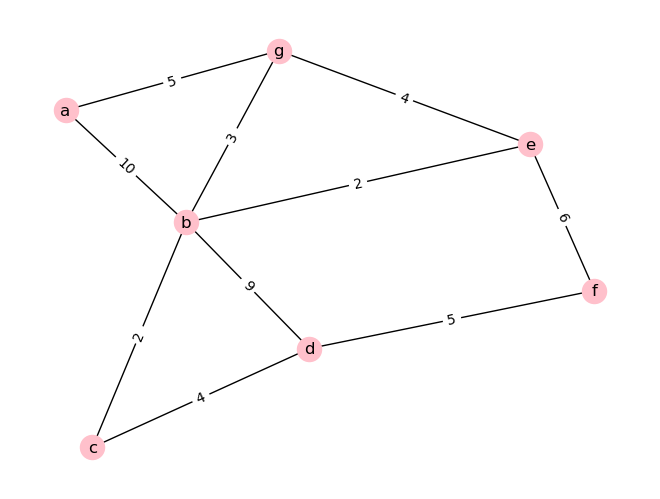

### Функция парсинга файла:

In [28]:
def parse(file_name):
    data = []
    merge_list = []

    # Считывание данных из файла
    with open(file_name, 'r', encoding='utf-8') as file:
        info = file.read()

    # Отделение подписей и данных
    for el in info.split('\n'):
        if '#' not in el:
            data.append(el)
            
    # Формирование итоговых данных
    start_edge: str = data[0][0]
    final_edge: str = data[0][3]
    all_edges: str = data[1]

    # Формиpование словаря смежности взвешенного графа
    data = data[2:]
    for el in data:
        merge_list.append(tuple(el.split(', ')))
    
    # Формирования графа в виде словаря
    dict_ = {}
    for el in merge_list:
        # print(dict_)
        # for ell in el:
        if el[0] in dict_:
            dict_[el[0]].append(tuple([int(el[2]), el[1]]))
        elif el[0] not in dict_:
            dict_[el[0]] = [tuple([int(el[2]), el[1]])]

        if el[1] in dict_:
            dict_[el[1]].append(tuple([int(el[2]), el[0]]))
        elif el[1] not in dict_:
            dict_[el[1]] = [tuple([int(el[2]), el[0]])]

    return start_edge, final_edge, dict_


if __name__ == '__main__':
    
    file_path = 'C:\\Users\\123\\Downloads\\test.txt'
    start, finish, graph = parse(file_path)
    print(f'Начальная точка графа (пути): {start}')
    print(f'Конечная точка графа (пути): {finish}')
    print(f'Граф, представленный ввиде списков смежности (словарь):\n {graph}')


Начальная точка графа (пути): a
Конечная точка графа (пути): d
Граф, представленный ввиде списков смежности (словарь):
 {'a': [(10, 'b'), (5, 'g')], 'b': [(10, 'a'), (2, 'c'), (9, 'd'), (2, 'e'), (3, 'g')], 'c': [(2, 'b'), (4, 'd')], 'd': [(9, 'b'), (4, 'c'), (5, 'f')], 'f': [(5, 'd'), (6, 'e')], 'e': [(6, 'f'), (2, 'b'), (4, 'g')], 'g': [(5, 'a'), (4, 'e'), (3, 'b')]}


In [29]:
# from parse_txt import parse
from heapq import *


def dijkstra(start_node, finish_node, graph_node):
    if type(graph_node) == list:
        graph_node = parse(graph_node.map(int()))[2]
    queue = []
    heappush(queue, (0, start_node))
    cost_visited = {start_node: 0}
    visited = {start_node: None}

    while queue:
        cur_cost, node = heappop(queue)
        if node == finish_node:
            break

        next_nodes = graph_node[node]
        for next_node in next_nodes:
            neigh_cost, neigh_node = next_node
            new_cost = cost_visited[node] + neigh_cost

            if neigh_node not in cost_visited or new_cost < cost_visited[neigh_node]:
                heappush(queue, (new_cost, neigh_node))
                cost_visited[neigh_node] = new_cost
                visited[neigh_node] = node

    return visited, cost_visited


if __name__ == '__main__':
    file_path = 'C:\\Users\\123\\Downloads\\test.txt'
    start, finish, graph = parse(file_path)
    path = f'{finish}'
    visited_nodes, cost_visited_nodes = dijkstra(start, finish, graph)
    cur_node = finish

    print(f'\nКратчайший маршрут от {start} до {finish}:')

    while cur_node != start:
        cur_node = visited_nodes[cur_node]
        path += f' >--- {cur_node} '
    path = path[::-1]
    print(path)
    print(f'Длина кратчайшего маршрута от {start} до {finish}: {cost_visited_nodes[finish]}')



Кратчайший маршрут от a до d:
 a --->  g --->  b --->  c ---> d
Длина кратчайшего маршрута от a до d: 14


## Решение задачи обходом в глубину




***__Обход графа в глубину (DFS)__*** – это алгоритм для обнаружения всех узлов в графе. 

Алгоритм посещает все вершины графа и ребра раз и только раз, и сохраняет информацию о том, какие вершины уже посещены. Алгоритм обхода графа в глубину без использования рекурсии:


In [30]:

def dfs_iterative(graph, start_vertex):
    stack = [start_vertex]
    visited = set()
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            stack.extend(graph[vertex] - visited)
    return visited

- graph - это представление графа в виде словаря, где ключи - это узлы, а значения - это множества соседей для каждого узла.
- start_vertex - это стартовый узел для обхода графа.

Этот алгоритм использует стек (list в Python), чтобы помнить, какие узлы нужно обойти на следующей итерации. Переменная visited используется для хранения информации о всех узлах, которые уже были посещены.

На каждой итерации алгоритм берет вершину vertex из стека (последний добавленный узел) и проверяет, был ли этот узел посещен ранее. Если этот узел не был посещен, то он добавляется в множество visited, а все его непосещенные соседи добавляются в стек stack с помощью команды `stack.extend(graph[vertex] - visited)`. Это означает, что алгоритм будет продолжать идти вглубь графа, пока есть непосещенные соседи текущего узла.

- Мы добавляем в стек `stack` все элементы из списка `graph[vertex]`, которые не входят в список `visited`. Это происходит с помощью метода `extend`, который добавляет все элементы из переданного ему списка в конец списка, на котором он был вызван.

- `graph[vertex] - visited` используется для получения разницы между списком `graph[vertex]` и списком `visited`. Это означает, что будет возвращен список элементов, которые есть в `graph[vertex]`, но которых нет в `visited`.

- Таким образом, строки кода добавят в стек `stack` все элементы, которые не были посещены и которые связаны с текущей вершиной `vertex` в графе `graph`.

Когда стек stack пуст, все узлы графа были посещены и множество visited содержит все узлы графа. Алгоритм возвращает это множество.

Этот алгоритм не использует рекурсию или очередь, а вместо этого использует стэк, чтобы запоминать необходимые узлы.


## Решение задачи обходом в ширину



Обхода графа в ширину без использования очереди и рекурсии:

In [6]:
def bfs(graph, start):
    visited = []  # список посещенных вершин
    stack = []  # стек для обхода графа в ширину
    stack.append(start)  # добавляем в стек стартовую вершину

    while stack:
        vertex = stack.pop(0)
        if vertex not in visited:
            visited.append(vertex)
            stack.extend([x for x in graph[vertex] if x not in visited])

    return visited

- Алгоритм обходит граф в ширину, начиная с указанной стартовой вершины, и использует список посещенных вершин и стек для хранения вершин, которые нужно посетить. 
- В цикле мы извлекаем вершину из стека и проверяем, была ли она посещена ранее. 
- Если вершина была посещена, мы пропускаем ее. 
- Если же вершина не была посещена, мы добавляем ее в список посещенных и добавляем в стек соседние вершины, которые еще не были посещены. 
- Таким образом, мы обходим все вершины графа из начальной точки в ширину.

## Код со встречи в Discord по курсовой

In [ ]:

## Код со встречи в Discord по курсовой

"""

            - Обход в глубину и ширину

            - Подсчет связанности графов

            - Выделение компонетиов связанности

            - Посмотреть словари

"""

# typle_test = [(a, b), (b, c), (c, d), (d,a)]
edges = []
vertex = []

with open('test.txt', 'r')  as file:
    text = file.readlines()

for el in text:
    vertex_a = el[0]
    vertex_b = el[1]
    vertex.append(vertex_a)
    vertex.append(vertex_b)
    edges.append((vertex_a, vertex_b))
dots = set(vertex)
print(f'Длина: {len(set(vertex))} \nТочки: {dots}')
print(f'Связи: {edges}')
# pos_a = []
# pos_b = []
# pos_c = []
# pos_d = []
# pos_f = []
def recur(dot_loc):
    if dot_loc not in set_1:
        set_1.add(dot_loc)
        p = 0


        for i in range(len(edges)):
            if dot_loc in edges[i]:
                p += 1
                vertex_1 = edges[i][0]
                vertex_2 = edges[i][1]
                if vertex_1 == dot_loc:
                    recur(vertex_2)
                elif vertex_2 == dot_loc:
                    recur(vertex_1)

        # print(p)

if __name__ == "__main__":
    set_1 = set()
    for dot in dots:
        recur(dot)
    print(f'Посещённые точки {set_1}')

## Обход графов в глубину (Конспект) 

## Матрица смежности 

Одним из способов хранения графов является матрица смежности.
- Матрица будет симметричной относительно главной диагонали в том случае , 
если граф неориентированный.
- Количество ребер в графе ВСЕГДА меньше квадрата вершина.
- Граф называется полным, если каждая вершина соединена со всеми остальными (практически не существуют).
- Разреженным граф считается, если ребер значительно меньше квадрата вершин.
- В основном будем использоватьсписки смежности.
V  корней из V  - для таких задач подходит матрица смежности (проблема в производительности)
Структура списков смежности:
- первый список - список динамических списков ()
- динамический список для каждой вершины
Алгоритм:
- Для полученного ребра (если не ориентированное) добавляем значение  попарно для каждой вершины в свой дин. список.

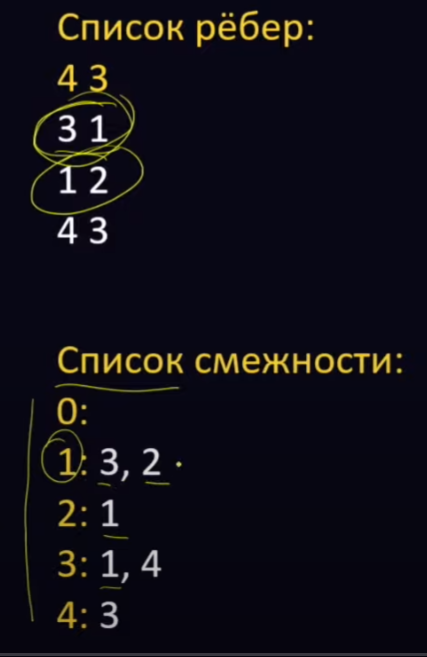

## Обход графов в глубину

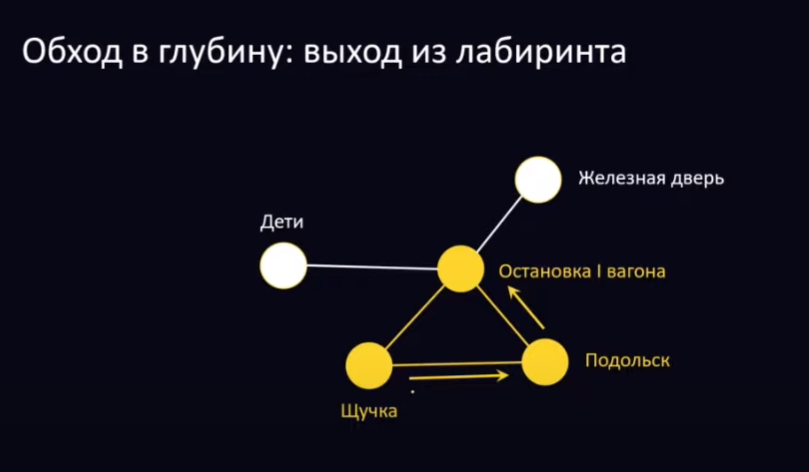

Алгорим:
- Выбираем направление и идем
- После прихода в новую вершину, указываем откуда пришли
- Если есть ребро к вершине , в которой еще не были - идем
- Если тупик или вершина ведет в вершину, в которой уже были - возвращаемся по отметкам, которые указывали при проходе до тупика

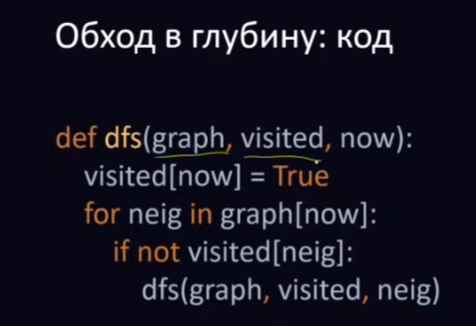

## Компоненты связанности

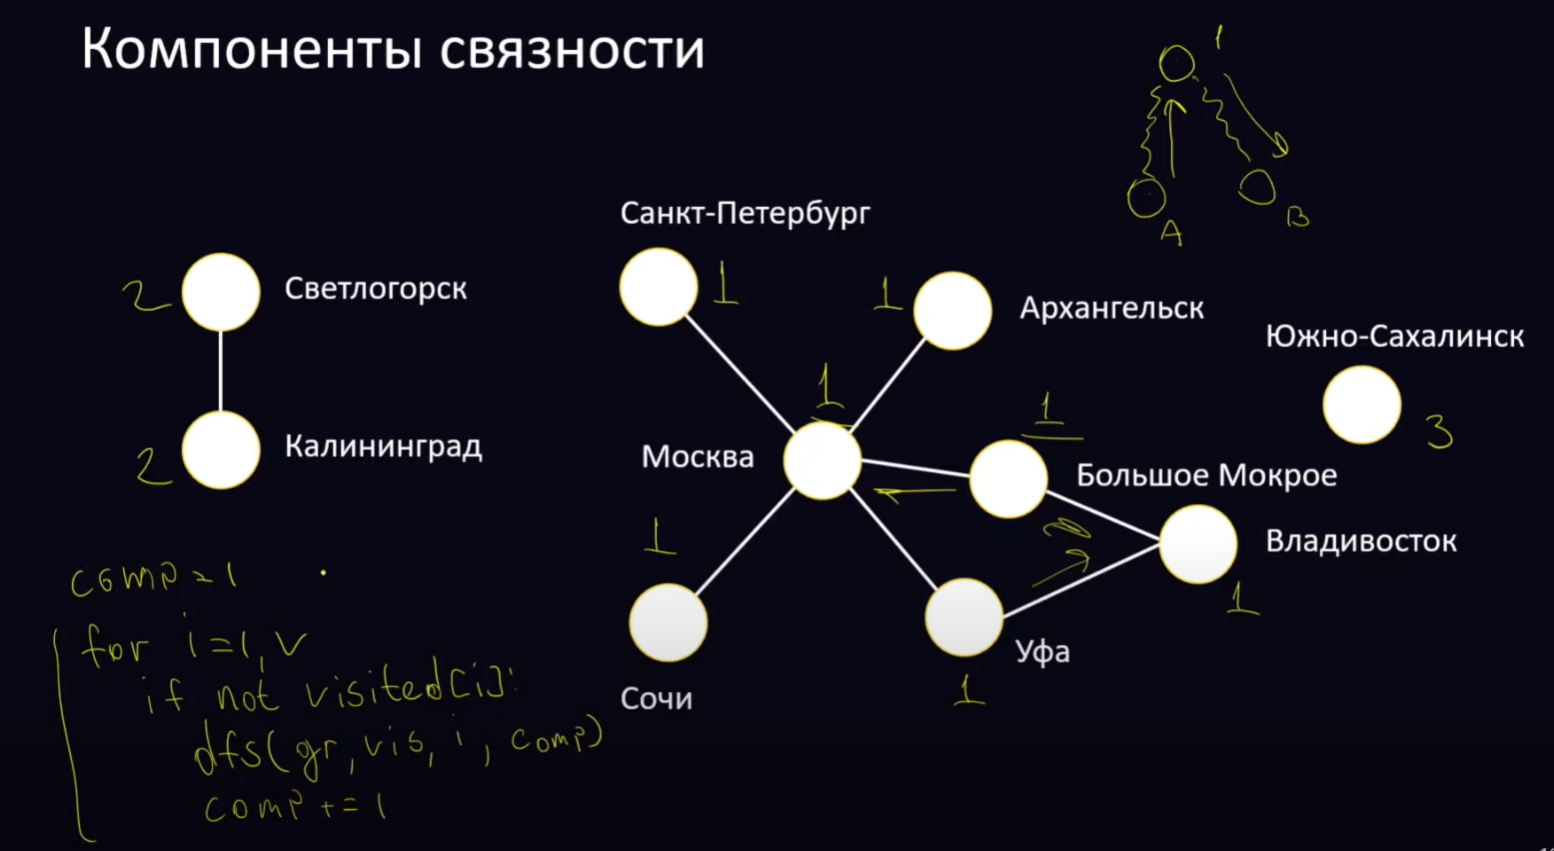

Алгоритм нахождения компонент связности:
- Реализуется функция обхода в глубину.
- Вводится дополнительный маркер в исходную функцию.
- Данный маркер показывает связанность вершин графа.
- Компонент меняется, если  у ново - рассматриваемой вершины нет связи с уже посещенными .
- компонента маркирует связанные части графа и показывает сколько независимо - связанных  вершин присутствует в графе.


## Циклы в графах

### Циклы бывают только в ориентированных графах.

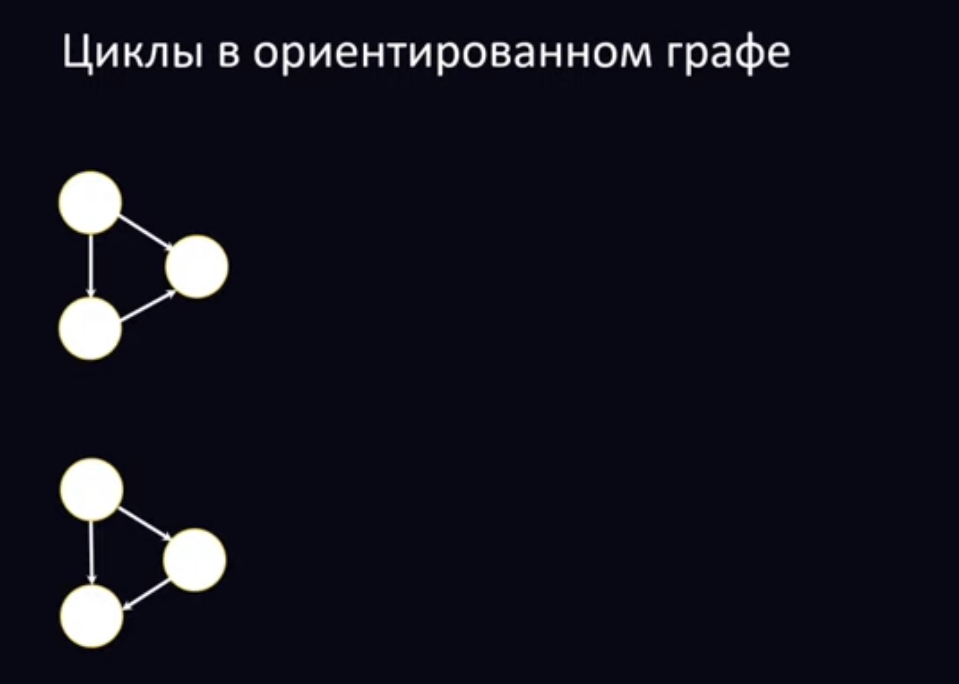

Если мы пришли и пометили вершину серым, а соседом для этой серой является серая вершина - в графе есть цикл.


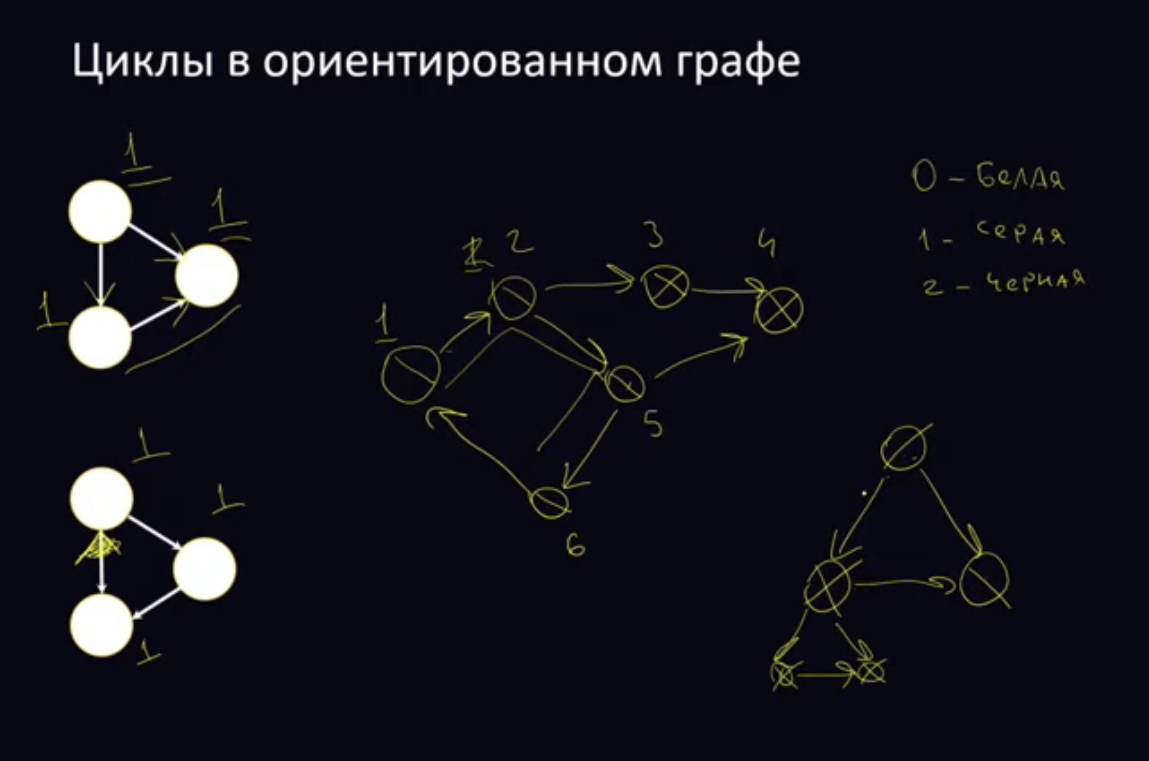

Важные уточнения:
- Одновременно не могут быть серыми вершины разных путей.
- Черные вершины показывают тупик в пути или отсутствие не тупиковых соседей.
- Белыми помечаются вершины, в которых мы еще не были. 
- Серые вершины - вершины в которых побывали, но у них есть не посещенные соседи.
- Черные вершины - тупиковые вершины или их соседи уже посещены.


Раскраска в два цвета позволят проверит граф на двудольный ли.
Двудольный граф - все вершины можно разложить по двум долям, а ребра будут только между вершинами из разных долей.

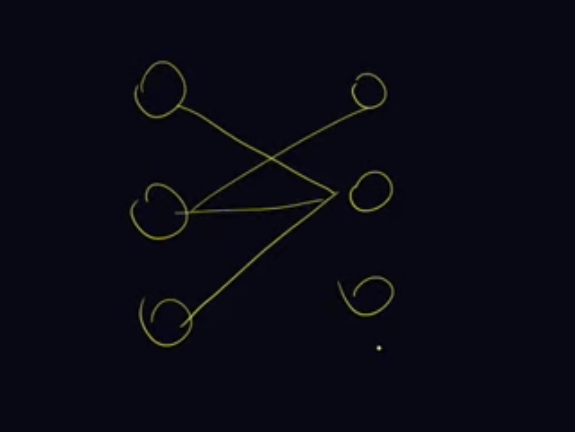

Алгоритм проверки на двудольнольность:
- Выбираем первую вершину и запускаем обход в глубину для нее
- Помечаем текущую вершину первым цветом
- Проверяем такой ли цвет у всех соседей выбранной вершины
- Если у всех соседей цвета такие же как у рассматриваемой = плохо
- Если цвета соседей и рассматриваемой разные, то хорошо
- Если у соседей нет цвета, то идем в это ребро и метим его другим цветом по отношению к прошлой вершине, из которой пришли
- Для двудольного графа не должно быть  у рассматриваемой вершины соседей с таким же цветом!!

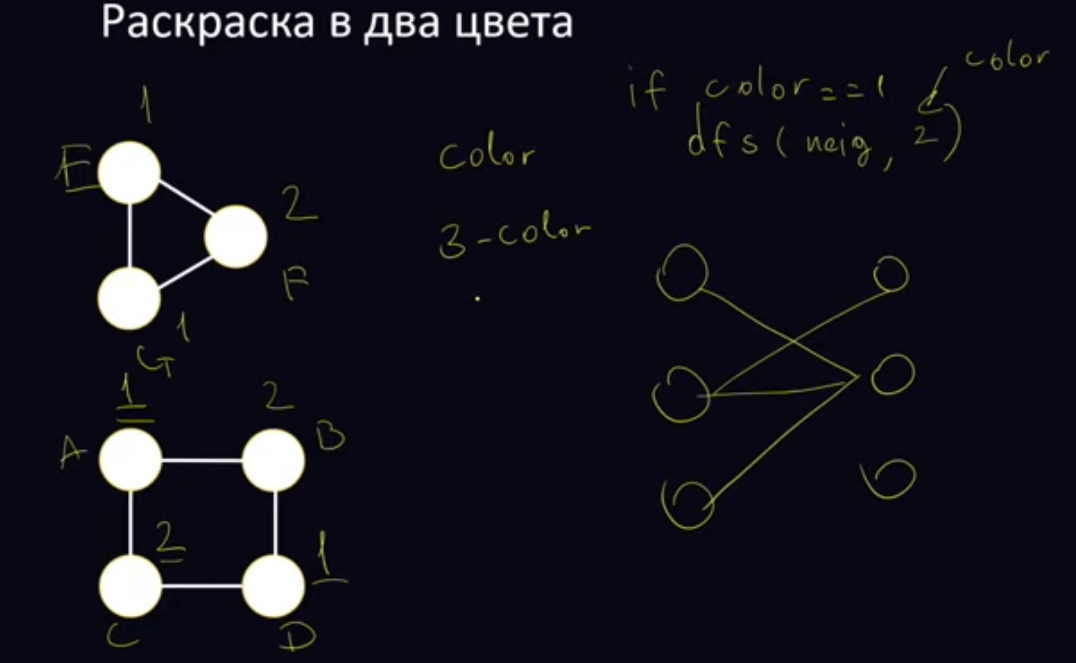

Для всех двудольных графов справедливо утверждение, что в них НЕТ циклов, что следует из смыла двудольности графа. Для цикла необходимо нечетное кол-во ребер, что обзывает иметь ребра между вершинами одной доли, что изначально невозможно.